This is the implementation of a license plate detection project. In this notebook we aim to illustrate detail all part that we have mentioned in the presentation.


# 1. Data set



* We have collected manually 280 images of vehicles from many types, angles and distance. One image contains only one license plate. 
* Size: 640x640 pixels
* Type: jpg file

# Display the collected data

Training Images


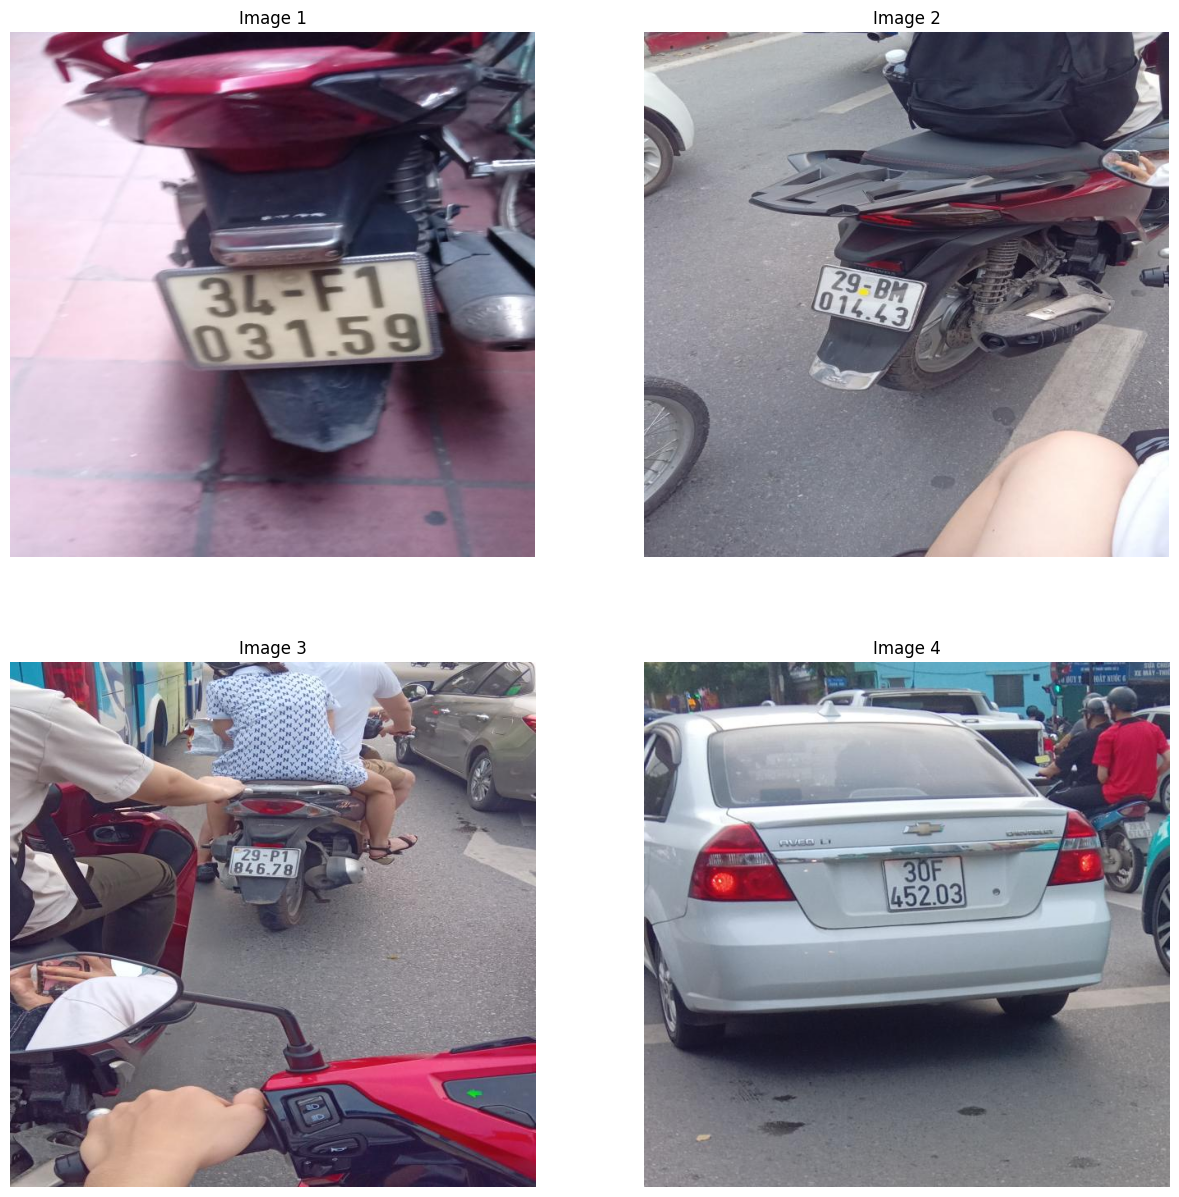

In [7]:
train_img1 = cv2.imread(r"C:\Users\Van\Downloads\LicensePlate\data\train\images\20240421_165201_jpg.rf.3588856eb0ead5b6dae2c1e3b30dd520.jpg")
train_img2 = cv2.imread(r"C:\Users\Van\Downloads\LicensePlate\data\train\images\20240421_165528_jpg.rf.93c2ce3f52cf65b0b114dd406a466c3c.jpg")
train_img3 = cv2.imread(r"C:\Users\Van\Downloads\LicensePlate\data\train\images\20240421_165531_jpg.rf.adac468a9d0cc63c02b40d29cd59fb4e.jpg")
train_img4 = cv2.imread(r"C:\Users\Van\Downloads\LicensePlate\data\train\images\20240421_165541_jpg.rf.0508ec8b26b5c5b119cdf0f2dff6759f.jpg")

fig = plt.figure(figsize = (15,15))
rows = 2
columns = 2


print("Training Images")

fig.add_subplot(rows, columns, 1)
# get b,g,r
b,g,r = cv2.split(train_img1)       
train_img1 = cv2.merge([r,g,b])
plt.imshow(train_img1)
plt.axis("off")
plt.title("Image 1")

fig.add_subplot(rows, columns, 2)
b,g,r = cv2.split(train_img2)      
train_img2 = cv2.merge([r,g,b])
plt.imshow(train_img2)
plt.axis("off")
plt.title("Image 2")

fig.add_subplot(rows, columns, 3)
b,g,r = cv2.split(train_img3)      
train_img3 = cv2.merge([r,g,b])
plt.imshow(train_img3)
plt.axis("off")
plt.title("Image 3")

fig.add_subplot(rows, columns, 4)
b,g,r = cv2.split(train_img4)      
train_img4 = cv2.merge([r,g,b])
plt.imshow(train_img4)
plt.axis("off")
plt.title("Image 4")

plt.show()

# fig.add_subplot(rows, columns, 2)
# plt.imshow(test_img)
# plt.axis("off")
# plt.title("Test Image")




# 2. Preprocessing Data

We using **Roboflow**, a tool developed to use for label the dataset, since the dataset must be labeled in a correct format to be trained by Yolov8. Here is an example of a label for an image.

In [8]:
f = open(r"C:\Users\Van\Downloads\LicensePlate\data\train\labels\20240421_165201_jpg.rf.3588856eb0ead5b6dae2c1e3b30dd520.txt", "r")
print("Example of the image label")
print(f.read())
f.close()
#from left to right: class, x_center, y_center, width, height

Example of the image label
0 0.54921875 0.5328125 0.55390625 0.228125


# 3. Bulding Dataset

* Spliting data: 70% training, 20% validation, 10% testing
* Organize the folders in to correct format, with a big data folder and subfolders inside.




# 4. Implementing

Import necessary library


In [2]:
import os
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from os import listdir
from ultralytics import YOLO

# Phase 1: Object Detection

**Workflow** 

Step 1: Training the model with YoloV8 and 100 epochs.

* Epoch = one complete pass of the training dataset through the algorithm


* The numbers of epochs recommended from ultralytics is 300 epochs for 1500 images. Due to the limit of time and cpu, we train our data with 100 and still get an accepted result.

Step 2: Model evaluation: evaluate base on Precision, Recall and mAPs

Step 3: Testing with the test set 





# Training the model

In [3]:
model = YOLO("yolov8n.pt")

results = model.train(data=os.path.join(r'C:\Users\Van\Downloads\LicensePlate\data', "data.yaml"), epochs = 100)

100%|██████████| 6.23M/6.23M [00:12<00:00, 503kB/s]


New https://pypi.org/project/ultralytics/8.2.27 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.2  Python-3.10.0 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Van\Downloads\LicensePlate\data\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

train: Scanning C:\Users\Van\Downloads\LicensePlate\data\train\labels... 442 images, 2 backgrounds, 0 corrupt: 100%|██████████| 442/442 [00:00<00:00, 488.42it/s]

train: New cache created: C:\Users\Van\Downloads\LicensePlate\data\train\labels.cache



val: Scanning C:\Users\Van\Downloads\LicensePlate\data\valid\labels... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<00:00, 393.10it/s]

val: New cache created: C:\Users\Van\Downloads\LicensePlate\data\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G     0.6837      2.221      0.963         15        640: 100%|██████████| 28/28 [04:17<00:00,  9.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.88s/it]

                   all         55         55          1      0.637      0.978      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.7119      1.386     0.9253         12        640: 100%|██████████| 28/28 [04:32<00:00,  9.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.46s/it]

                   all         55         55      0.763        0.6      0.746      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.7374       1.28     0.9614         14        640: 100%|██████████| 28/28 [05:04<00:00, 10.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.07s/it]

                   all         55         55      0.889      0.725      0.872       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G     0.7188      1.108      0.942         22        640: 100%|██████████| 28/28 [04:51<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.12s/it]

                   all         55         55      0.769      0.582      0.747       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       0.73     0.9811     0.9544         19        640: 100%|██████████| 28/28 [03:58<00:00,  8.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.95s/it]

                   all         55         55      0.863      0.916      0.941      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.7102     0.8817     0.9505         11        640: 100%|██████████| 28/28 [03:28<00:00,  7.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]

                   all         55         55      0.842      0.818      0.931      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.6655     0.7827     0.9168         22        640: 100%|██████████| 28/28 [03:54<00:00,  8.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.15s/it]

                   all         55         55      0.942      0.945       0.98      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      0.635     0.7221     0.9201         14        640: 100%|██████████| 28/28 [04:30<00:00,  9.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.90s/it]

                   all         55         55      0.996          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.6242     0.6826      0.913         20        640: 100%|██████████| 28/28 [04:55<00:00, 10.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.30s/it]

                   all         55         55      0.982          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.6101       0.62     0.9133         17        640: 100%|██████████| 28/28 [03:33<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.43s/it]

                   all         55         55      0.979          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.6118      0.595     0.9165         25        640: 100%|██████████| 28/28 [03:37<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]

                   all         55         55      0.978          1      0.993      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.5879     0.5849     0.9166         13        640: 100%|██████████| 28/28 [03:47<00:00,  8.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]

                   all         55         55      0.994          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.5997     0.5601     0.9228         19        640: 100%|██████████| 28/28 [04:37<00:00,  9.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.19s/it]

                   all         55         55      0.998          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.5813     0.5439     0.9243         15        640: 100%|██████████| 28/28 [03:56<00:00,  8.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.97s/it]

                   all         55         55      0.994          1      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.5595     0.5253     0.9126         15        640: 100%|██████████| 28/28 [04:03<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.91s/it]

                   all         55         55      0.966          1      0.993      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.5642     0.5205     0.9084         21        640: 100%|██████████| 28/28 [04:12<00:00,  9.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.02s/it]

                   all         55         55      0.982          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.5575     0.5141     0.9281         18        640: 100%|██████████| 28/28 [03:33<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.79s/it]

                   all         55         55      0.998          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.5469      0.485     0.8875         14        640: 100%|██████████| 28/28 [02:53<00:00,  6.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]

                   all         55         55      0.978          1      0.991       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.5286     0.4835     0.8836         20        640: 100%|██████████| 28/28 [03:00<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.31s/it]

                   all         55         55      0.979          1      0.992      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.5261     0.4793     0.8898         16        640: 100%|██████████| 28/28 [03:56<00:00,  8.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.999          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.5574     0.4684     0.8864         21        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.998          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.5411     0.4411     0.9012         12        640: 100%|██████████| 28/28 [02:49<00:00,  6.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         55         55      0.998          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.5271     0.4375     0.8784         15        640: 100%|██████████| 28/28 [02:55<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.19s/it]

                   all         55         55          1      0.999      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      0.514     0.4429     0.8839         20        640: 100%|██████████| 28/28 [04:39<00:00,  9.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.23s/it]

                   all         55         55      0.998          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.5206     0.4329     0.8878         28        640: 100%|██████████| 28/28 [05:20<00:00, 11.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.61s/it]

                   all         55         55      0.996          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.4957      0.412     0.8778         13        640: 100%|██████████| 28/28 [05:19<00:00, 11.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.48s/it]

                   all         55         55      0.993      0.982      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.4815     0.4106     0.8772         18        640: 100%|██████████| 28/28 [04:57<00:00, 10.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.20s/it]

                   all         55         55      0.995          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.5147     0.4233     0.8849         18        640: 100%|██████████| 28/28 [05:08<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.56s/it]

                   all         55         55      0.998          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.4856     0.4136     0.8939         15        640: 100%|██████████| 28/28 [05:06<00:00, 10.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.86s/it]

                   all         55         55       0.98          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.4669     0.3911     0.8655         15        640: 100%|██████████| 28/28 [04:54<00:00, 10.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.87s/it]

                   all         55         55      0.997          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.4925     0.4134     0.8765         17        640: 100%|██████████| 28/28 [04:02<00:00,  8.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.97s/it]

                   all         55         55      0.998          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      0.501     0.4127     0.8776         19        640: 100%|██████████| 28/28 [03:08<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]

                   all         55         55      0.998          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.4906     0.3832      0.877         22        640: 100%|██████████| 28/28 [03:10<00:00,  6.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         55         55      0.998          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.4528     0.3775     0.8644         13        640: 100%|██████████| 28/28 [03:08<00:00,  6.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.85s/it]

                   all         55         55      0.999          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.4571     0.3727     0.8834          8        640: 100%|██████████| 28/28 [03:06<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]

                   all         55         55      0.999          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.4433     0.3683     0.8679         14        640: 100%|██████████| 28/28 [03:07<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.93s/it]

                   all         55         55      0.982          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.4254     0.3696     0.8617         17        640: 100%|██████████| 28/28 [03:08<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.68s/it]

                   all         55         55      0.999          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.4255     0.3513     0.8728         12        640: 100%|██████████| 28/28 [03:09<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]

                   all         55         55      0.999          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.4292     0.3504     0.8764         15        640: 100%|██████████| 28/28 [03:07<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]

                   all         55         55      0.999          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.4235     0.3445     0.8636         22        640: 100%|██████████| 28/28 [03:08<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.91s/it]

                   all         55         55      0.999          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.4184      0.353     0.8639         10        640: 100%|██████████| 28/28 [03:07<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.82s/it]

                   all         55         55      0.999          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.4343     0.3461     0.8672         21        640: 100%|██████████| 28/28 [03:07<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.87s/it]

                   all         55         55      0.999          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.4282     0.3552     0.8634         19        640: 100%|██████████| 28/28 [03:09<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.91s/it]

                   all         55         55      0.999          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      0.423      0.361     0.8633         15        640: 100%|██████████| 28/28 [03:06<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.06s/it]

                   all         55         55      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.4133       0.35       0.86         17        640: 100%|██████████| 28/28 [03:08<00:00,  6.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.83s/it]

                   all         55         55      0.999          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.4322     0.3508     0.8692         11        640: 100%|██████████| 28/28 [03:08<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.92s/it]

                   all         55         55      0.999          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.4259     0.3376      0.864         18        640: 100%|██████████| 28/28 [03:07<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         55         55      0.999          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.4084     0.3299     0.8524         14        640: 100%|██████████| 28/28 [03:07<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]

                   all         55         55      0.999          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.3945     0.3307     0.8523         19        640: 100%|██████████| 28/28 [03:07<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.24s/it]

                   all         55         55      0.981          1      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.4005     0.3308     0.8645         16        640: 100%|██████████| 28/28 [03:07<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.72s/it]

                   all         55         55      0.999          1      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.4093      0.344     0.8647         16        640: 100%|██████████| 28/28 [02:55<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.96s/it]

                   all         55         55      0.999          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.4068      0.324     0.8575         15        640: 100%|██████████| 28/28 [02:54<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.62s/it]

                   all         55         55      0.999          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.3969     0.3171      0.855         18        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]

                   all         55         55      0.982          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.3925      0.328     0.8586         22        640: 100%|██████████| 28/28 [02:55<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         55         55      0.999          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      0.384     0.3281      0.847         14        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.62s/it]

                   all         55         55      0.981          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.3756     0.3056     0.8497         19        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]

                   all         55         55      0.999          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.3696      0.301     0.8476         13        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.66s/it]

                   all         55         55      0.999          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.3817      0.305     0.8636         18        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.999          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.3689     0.3024     0.8465         13        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.999          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.3628     0.3003     0.8441         15        640: 100%|██████████| 28/28 [02:52<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         55         55      0.999          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.3645      0.296      0.857         19        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.63s/it]

                   all         55         55      0.999          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.3709     0.2944     0.8477         11        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.59s/it]

                   all         55         55      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.3822     0.2841      0.842         15        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.70s/it]

                   all         55         55      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.3697      0.287     0.8474         12        640: 100%|██████████| 28/28 [02:54<00:00,  6.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.34s/it]

                   all         55         55      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.3547     0.2821      0.845         16        640: 100%|██████████| 28/28 [02:52<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         55         55      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.3417     0.2803     0.8537         21        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.59s/it]

                   all         55         55      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.3514     0.2727     0.8497         25        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         55         55      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      0.352     0.2832     0.8511         23        640: 100%|██████████| 28/28 [02:53<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         55         55      0.999          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.3422     0.2805     0.8407         19        640: 100%|██████████| 28/28 [02:54<00:00,  6.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.64s/it]

                   all         55         55      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.3255     0.2723     0.8439         20        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         55         55      0.999          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.3313     0.2645     0.8524         21        640: 100%|██████████| 28/28 [02:52<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.70s/it]

                   all         55         55      0.999          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.3634     0.2792     0.8519         15        640: 100%|██████████| 28/28 [02:54<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.999          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.3388     0.2727     0.8468         19        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]

                   all         55         55      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.3289     0.2696     0.8515         13        640: 100%|██████████| 28/28 [02:53<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]

                   all         55         55      0.997          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.3211     0.2581     0.8338         18        640: 100%|██████████| 28/28 [02:52<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.63s/it]

                   all         55         55      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.3278     0.2635     0.8413         13        640: 100%|██████████| 28/28 [02:54<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]

                   all         55         55      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.3306     0.2648      0.841         24        640: 100%|██████████| 28/28 [02:53<00:00,  6.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.68s/it]

                   all         55         55      0.999          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.3134     0.2506       0.83         24        640: 100%|██████████| 28/28 [02:53<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]

                   all         55         55      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.3246      0.252     0.8474         16        640: 100%|██████████| 28/28 [02:52<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         55         55      0.999          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.3336     0.2594     0.8323         16        640: 100%|██████████| 28/28 [02:52<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.63s/it]

                   all         55         55      0.999          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.3038     0.2408     0.8446         17        640: 100%|██████████| 28/28 [02:53<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.71s/it]

                   all         55         55      0.999          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.3159     0.2636     0.8433         10        640: 100%|██████████| 28/28 [02:53<00:00,  6.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.71s/it]

                   all         55         55      0.999          1      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.3126     0.2494      0.826         20        640: 100%|██████████| 28/28 [02:53<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.68s/it]

                   all         55         55      0.999          1      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.2999     0.2416     0.8315         18        640: 100%|██████████| 28/28 [02:54<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.74s/it]

                   all         55         55      0.998          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.3157     0.2478     0.8271         12        640: 100%|██████████| 28/28 [02:52<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.68s/it]

                   all         55         55      0.998          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.2888     0.2319     0.8338         19        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.62s/it]

                   all         55         55      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.2856     0.2363     0.8226         17        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.61s/it]

                   all         55         55      0.999          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.2979     0.2394     0.8347         14        640: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]

                   all         55         55      0.999          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.2913     0.2404     0.8355         18        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]

                   all         55         55      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.2712     0.2243     0.8223         15        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         55         55      0.999          1      0.995      0.972


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.2339     0.2024      0.791         10        640: 100%|██████████| 28/28 [02:51<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.02s/it]

                   all         55         55      0.999          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.2306     0.1864     0.7799         10        640: 100%|██████████| 28/28 [02:50<00:00,  6.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         55         55      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.2315     0.1896      0.774         10        640: 100%|██████████| 28/28 [02:52<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.68s/it]

                   all         55         55      0.999          1      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.2203     0.1829     0.7824         10        640: 100%|██████████| 28/28 [02:52<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.65s/it]

                   all         55         55      0.999          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.2175      0.186     0.7812          9        640: 100%|██████████| 28/28 [05:20<00:00, 11.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.76s/it]

                   all         55         55      0.999          1      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.2177     0.1828      0.791         10        640: 100%|██████████| 28/28 [05:26<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.39s/it]

                   all         55         55      0.999          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.2146     0.1757     0.7803         10        640: 100%|██████████| 28/28 [05:36<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.45s/it]

                   all         55         55      0.999          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.2124     0.1738     0.7782         10        640: 100%|██████████| 28/28 [05:31<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.83s/it]

                   all         55         55      0.999          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      0.203     0.1689     0.7663         10        640: 100%|██████████| 28/28 [05:12<00:00, 11.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.94s/it]

                   all         55         55      0.999          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.1978     0.1692     0.7707         10        640: 100%|██████████| 28/28 [05:09<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.47s/it]

                   all         55         55      0.999          1      0.995      0.982



100 epochs completed in 6.141 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.2  Python-3.10.0 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.42s/it]


                   all         55         55      0.999          1      0.995      0.983
Speed: 5.1ms preprocess, 236.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train


# Model evaluation

* Result

In [4]:
model = YOLO(r'C:\Users\Van\Downloads\LicensePlate\runs\detect\train\weights\best.pt')
model_result = model.val(data=r'C:\Users\Van\Downloads\LicensePlate\data\data.yaml')


Ultralytics YOLOv8.2.2  Python-3.10.0 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\Van\Downloads\LicensePlate\data\valid\labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


                   all         55         55      0.999          1      0.995      0.983
Speed: 1.7ms preprocess, 102.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val


* **Precision**: ratio of correctly classified as license plate over the numbers of license plate

Precision = TP/(TP + FP)

where:

TP - True Positive: numbers of license plate image have been properly classify

FP - False Positive: numbers of image classified as license plate although they are not

* **Recall**: ratio of correctly classified as license plate (TP) over total numbers of actual license plate. **Recall can tell the ability of the model to identify all instances of objects in the image**.

Recall = TP/(TP+FN)

where:

FN - False Negative: numbers of license plate missclassified although they are license plate


* **mAP50**: Mean average precision calculated at an intersection over union (IoU) threshold of 0.50. It's a measure of the model's accuracy considering only the "easy" detections.


* **mAP50-95**: The average of the mean average precision calculated at varying IoU thresholds, ranging from 0.50 to 0.95. It gives a comprehensive view of the model's performance across different levels of detection difficulty.




# Testing with the test set

In [5]:
def predict_license(best_point, path):
    model.predict(path, save=True, save_txt=True, save_conf=True, imgsz=320)
    print(model.metrics)


if __name__=='__main__':
    predict_license(best_point=r'C:\Users\Van\Downloads\LicensePlate\runs\detect\train\weights\best.pt', path=r'C:\Users\Van\Downloads\LicensePlate\data\test\images')
    


image 1/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-101-_jpg.rf.073ca6f3b103a92a03312c02ace8ffe6.jpg: 320x320 1 license, 184.2ms
image 2/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-128-_jpg.rf.58f48c2966cd3c92cf544307e0db8b01.jpg: 320x320 1 license, 64.2ms
image 3/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-134-_jpg.rf.e13234c3a8c0aa9ce6993646d1c9e5d7.jpg: 320x320 1 license, 106.0ms
image 4/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-145-_jpg.rf.4a598a2ec06aa534ff17e1a3a97f70a1.jpg: 320x320 1 license, 145.0ms
image 5/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-152-_jpg.rf.36f61b74c6548e827f92d60fa93842c7.jpg: 320x320 1 license, 51.3ms
image 6/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-154-_jpg.rf.dd1c4b4962f2ad52e1ab1bd04d1c40e3.jpg: 320x320 1 license, 113.4ms
image 7/55 C:\Users\Van\Downloads\LicensePlate\data\test\images\img-155-_jpg.rf.b8c3bbb0d77760e56da87584b75e81ec.jpg: 320x320 1 lic

# Phase 2: OCR

**Work flow**

Step 1: Using image processing techniques to enhance the quality

Step 2: Using OCR technique to recognize the characters on the license plate

Step 3: Evaluating


# Extract license plate from input image

In [3]:
PROJECT_PATH = "runs/detect"
PROJECT_NAME = "inference"

def extract_plate(img):
	plate_img = img
	license_plate_detector = YOLO(r'C:\Users\Van\Downloads\LicensePlate\runs\detect\train\weights\best.pt')
	result = license_plate_detector(plate_img, save=True, save_crop=True, project=PROJECT_PATH, name=PROJECT_NAME, exist_ok=True)
	return result

In [72]:
image_folder = f"data/valid/images"
file_list = os.listdir(image_folder)

for file_name in file_list:
    # Construct the full file path
    file_path = os.path.join(image_folder, file_name)
    image = cv2.imread(file_path)
    plate = extract_plate(file_path)   


image 1/1 c:\Users\Van\Downloads\LicensePlate\data\valid\images\img-106-_jpg.rf.8140bb188c9d0c75cc15e3eb5e450cfd.jpg: 640x640 1 license, 170.3ms
Speed: 11.1ms preprocess, 170.3ms inference, 19.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\inference

image 1/1 c:\Users\Van\Downloads\LicensePlate\data\valid\images\img-114-_jpg.rf.844b26f67769a9559d1336cf3eab179b.jpg: 640x640 1 license, 140.3ms
Speed: 3.5ms preprocess, 140.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\inference

image 1/1 c:\Users\Van\Downloads\LicensePlate\data\valid\images\img-119-_jpg.rf.aff876b44872f75256af8621658995c0.jpg: 640x640 1 license, 132.5ms
Speed: 0.0ms preprocess, 132.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\inference

image 1/1 c:\Users\Van\Downloads\LicensePlate\data\valid\images\img-126-_jpg.rf.eaa1bbfd62c590650273bd16eabbc826.jpg: 640x640 1 license, 114.2ms
Spe

# Image Processing and EasyOCR

* An example of a crop image

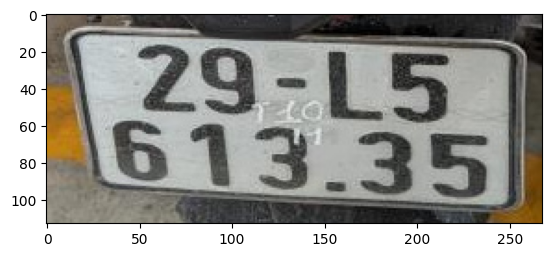

In [45]:
#plot image
img1 = cv2.imread(r"C:\Users\Van\Downloads\LicensePlate\runs\detect\inference\crops\license\img-106-_jpg.rf.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [ ]:
import jiwer

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-L5 61335
Character Error Rate: 0.08
Accuracy: 0.92


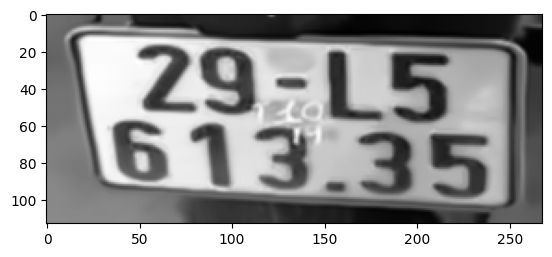

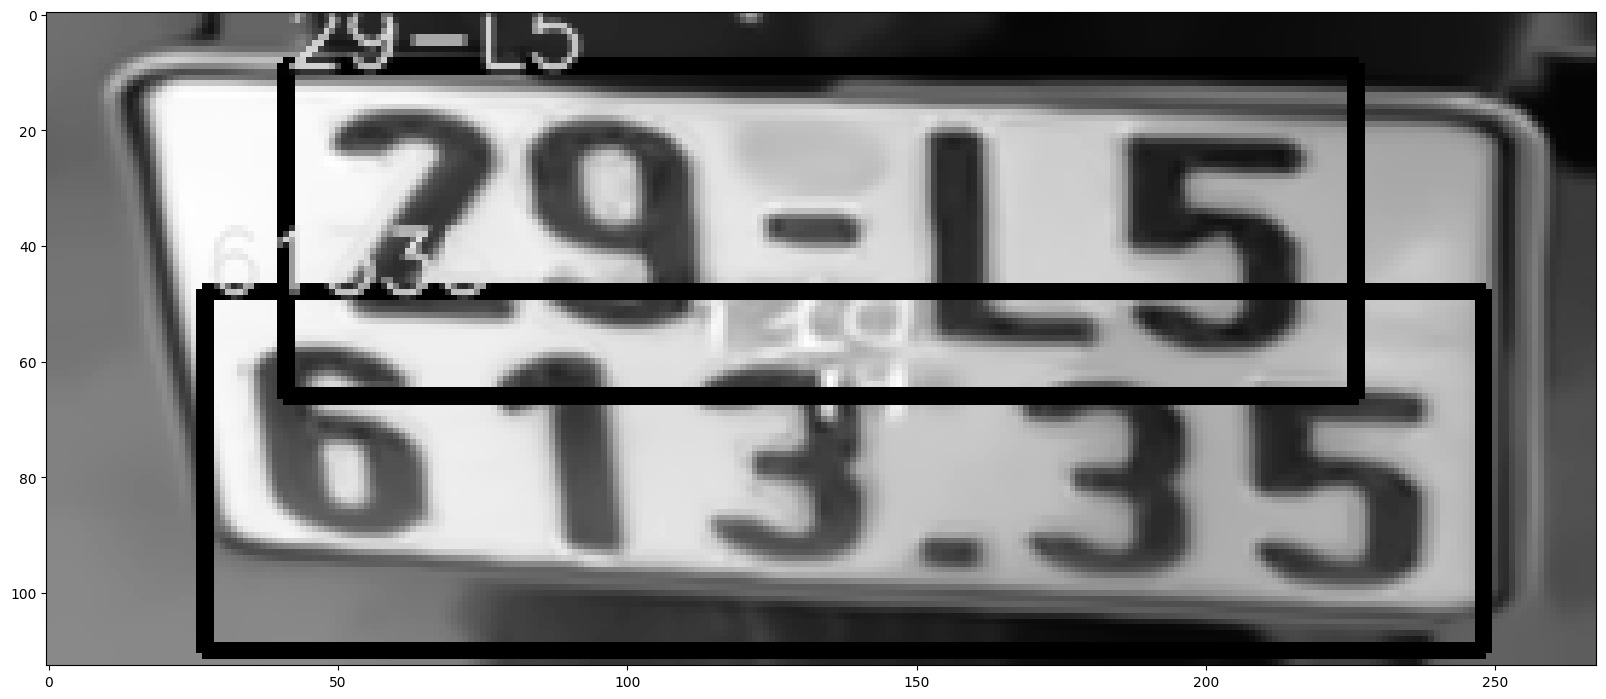

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-AB 020 01
Character Error Rate: 0.08
Accuracy: 0.92


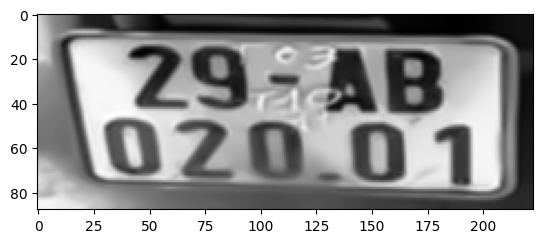

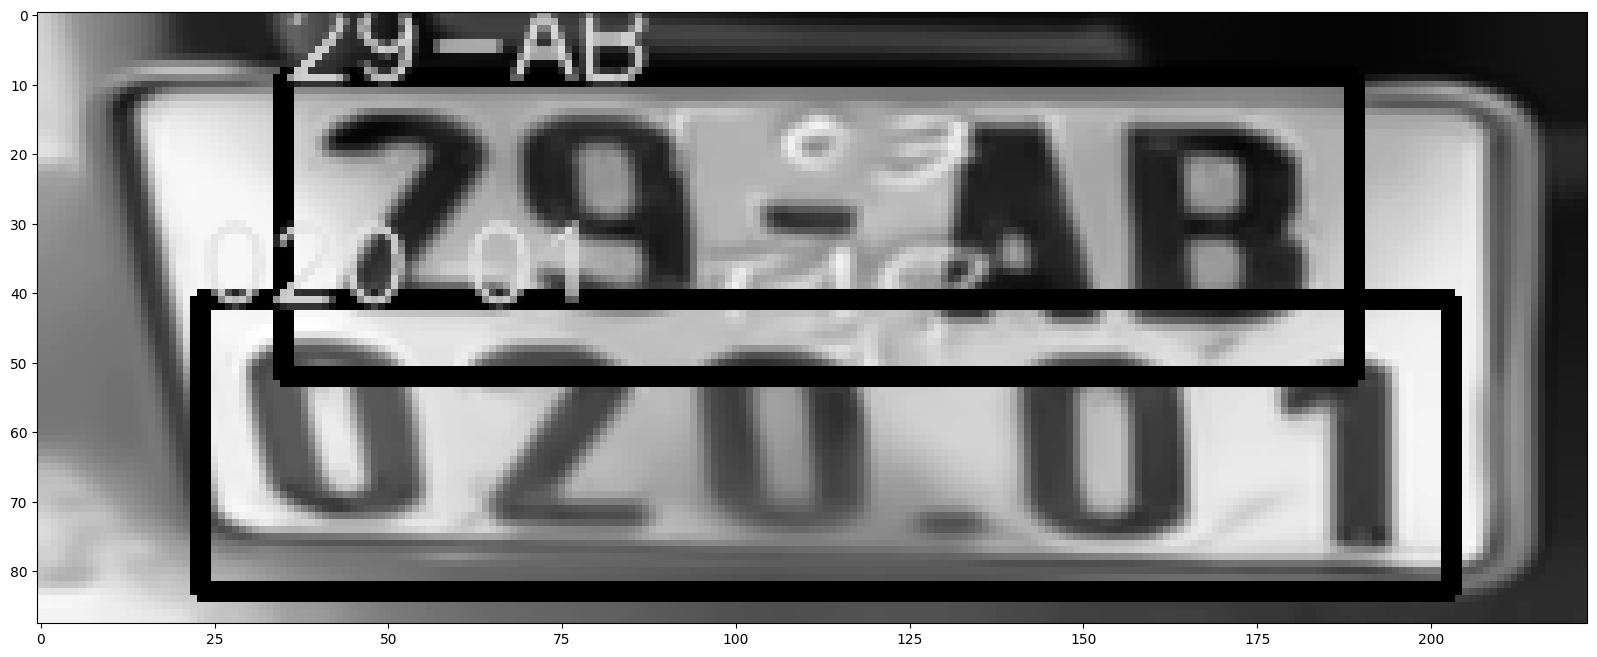

Using CPU. Note: This module is much faster with a GPU.


License plate number: 23-N1 062.42
Character Error Rate: 0.08
Accuracy: 0.92


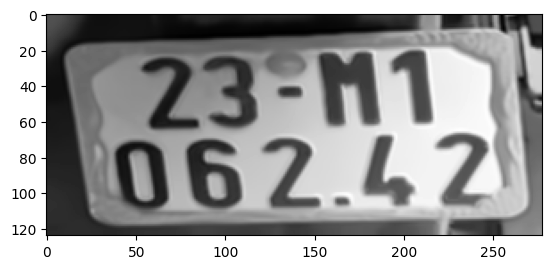

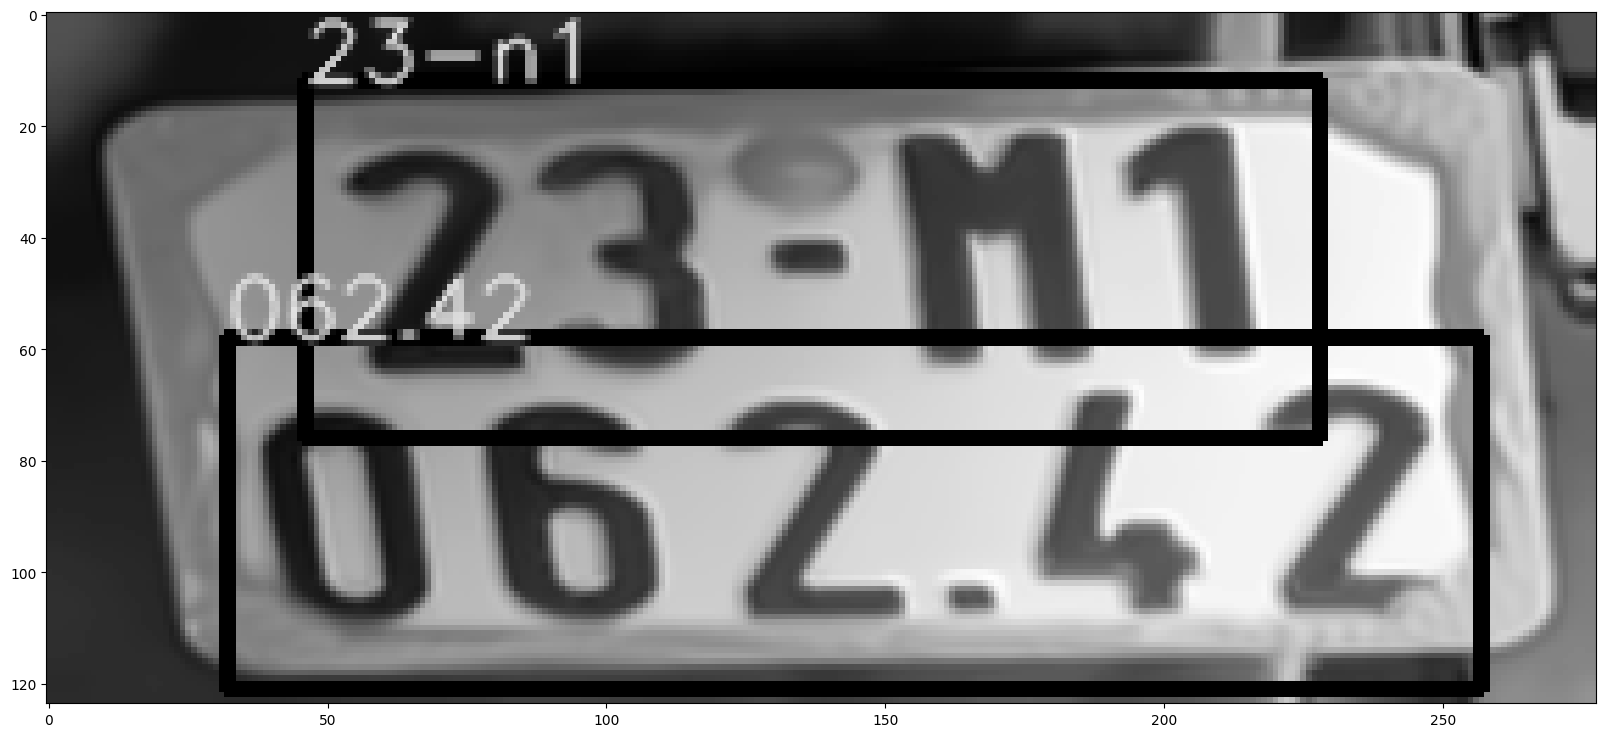

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30-FZ 3499
Character Error Rate: 0.10
Accuracy: 0.90


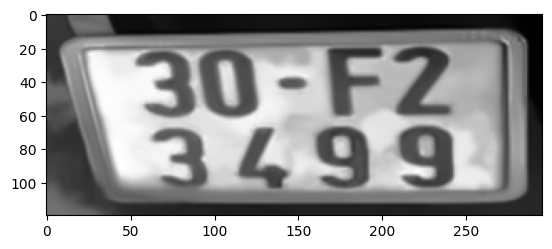

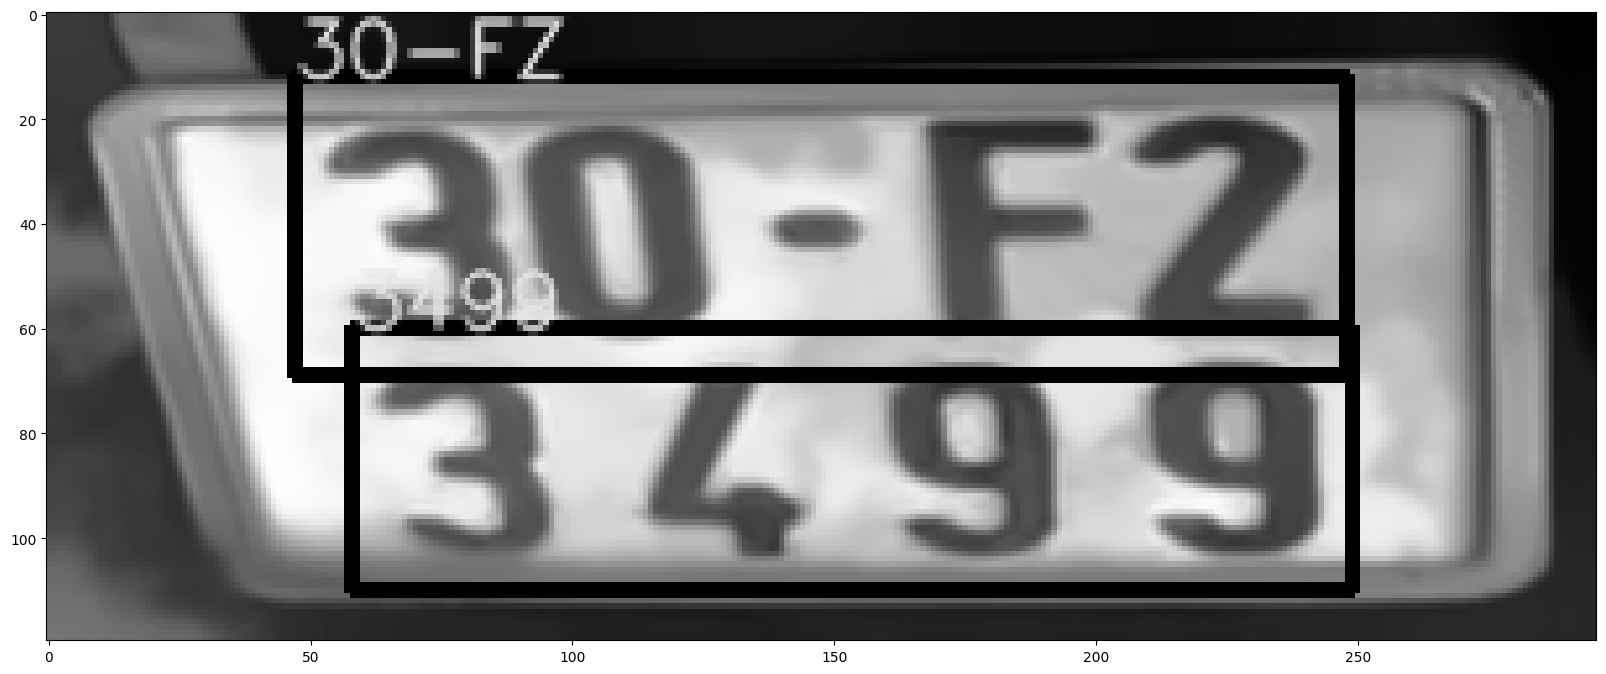

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-EZ 627.23
Character Error Rate: 0.08
Accuracy: 0.92


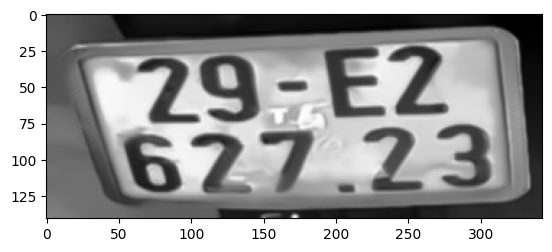

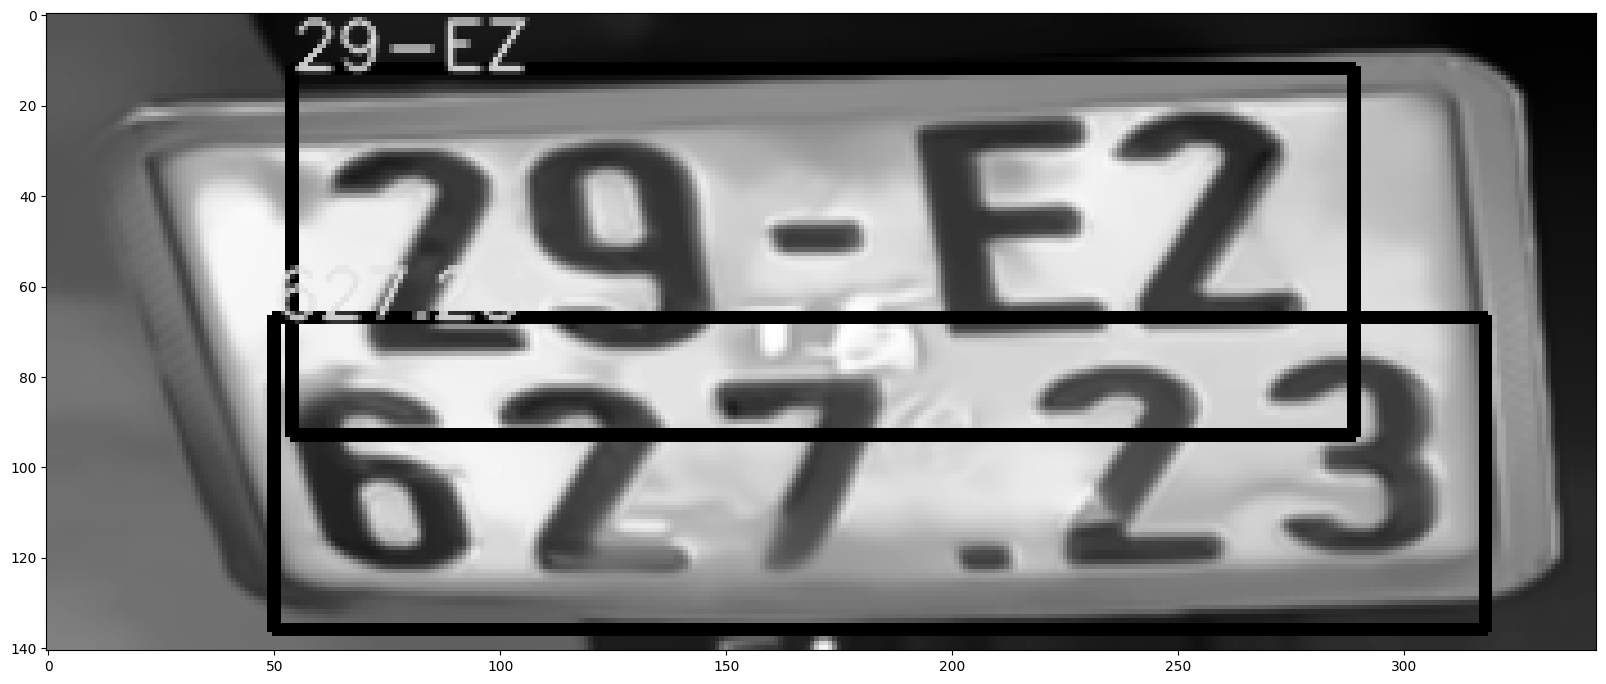

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-L5_ 382,57
Character Error Rate: 0.17
Accuracy: 0.83


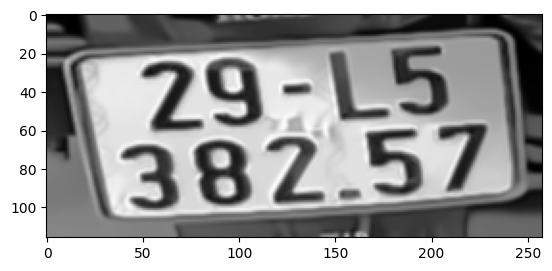

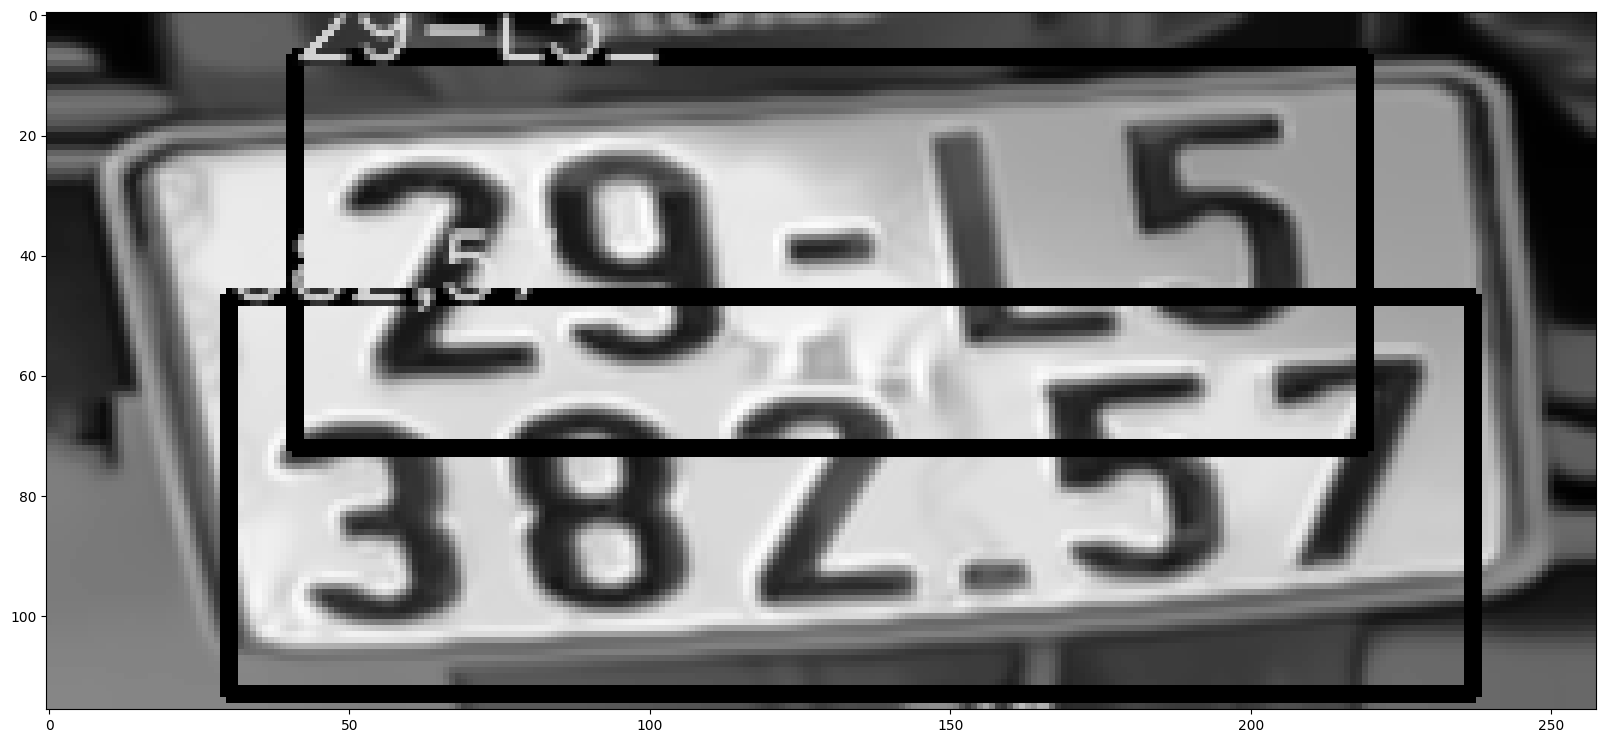

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-EZ 673.90
Character Error Rate: 0.08
Accuracy: 0.92


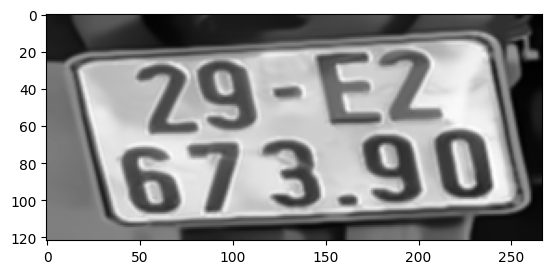

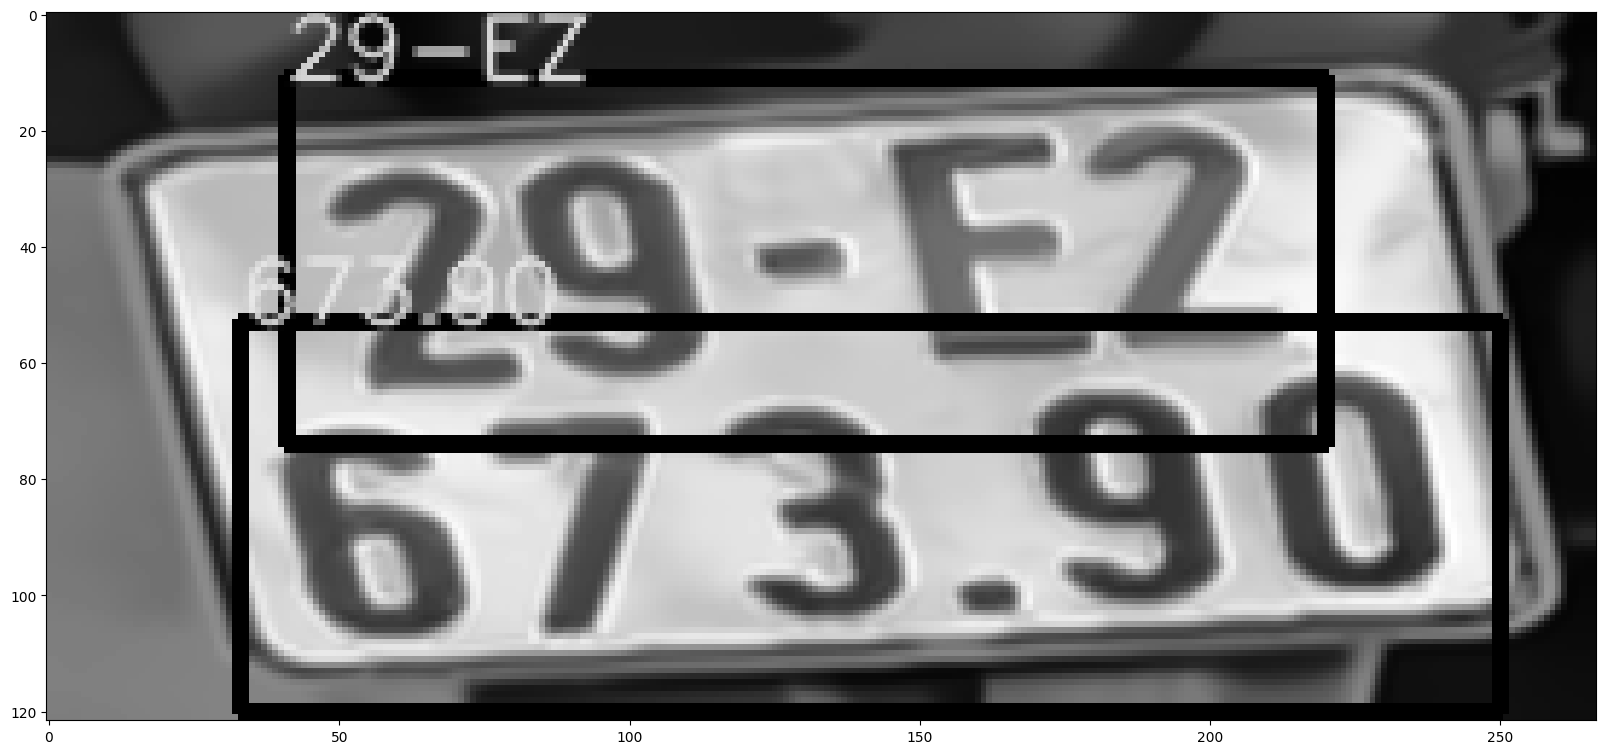

Using CPU. Note: This module is much faster with a GPU.


License plate number: 34-BL 387 0L
Character Error Rate: 0.25
Accuracy: 0.75


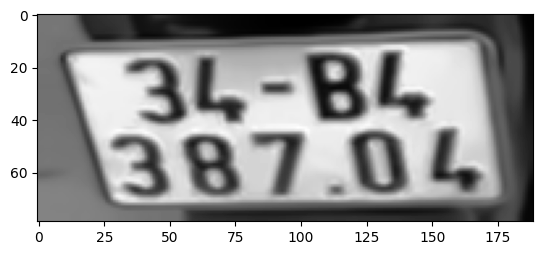

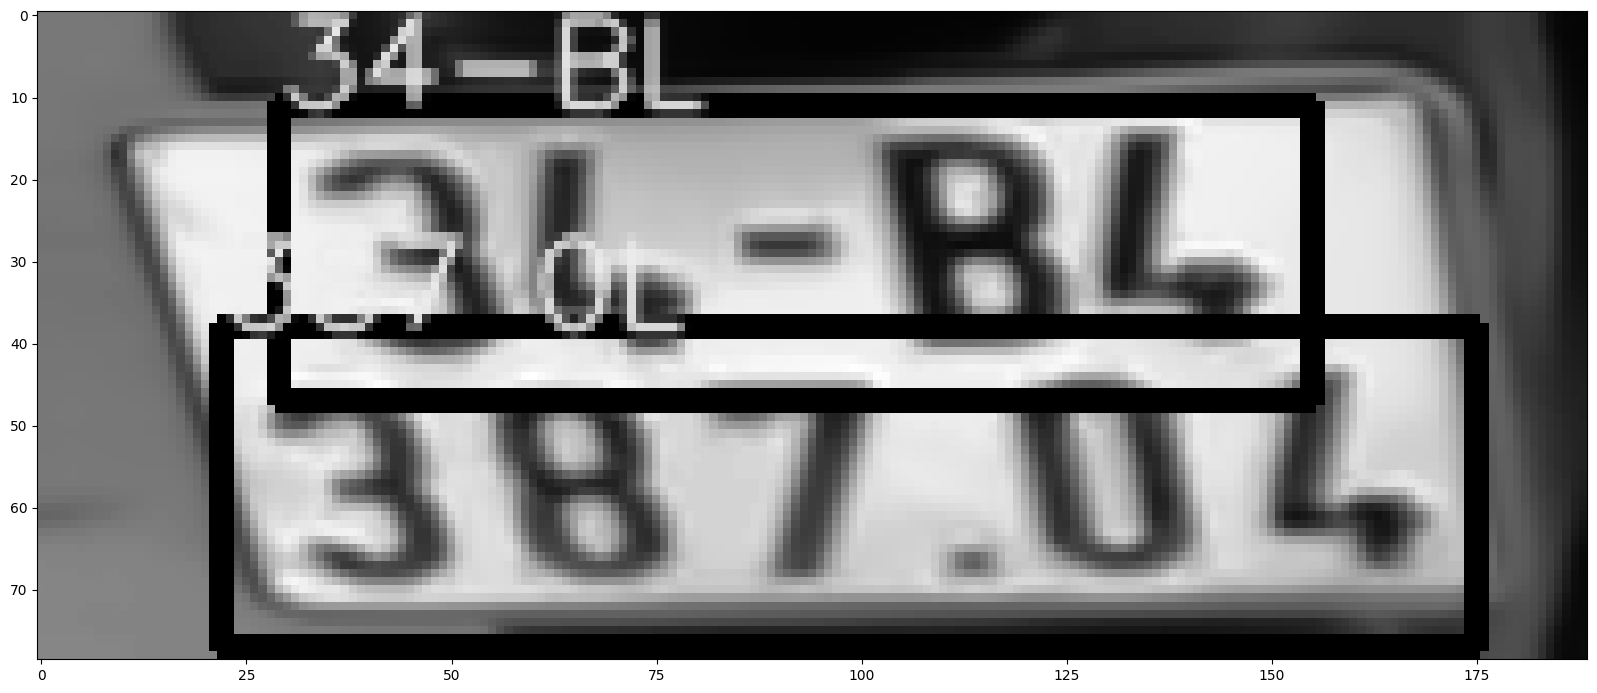

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0A 981.30
Character Error Rate: 0.20
Accuracy: 0.80


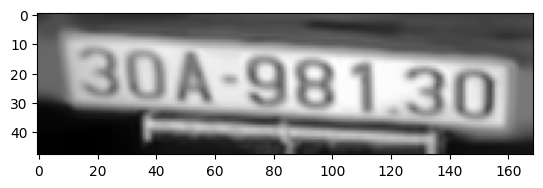

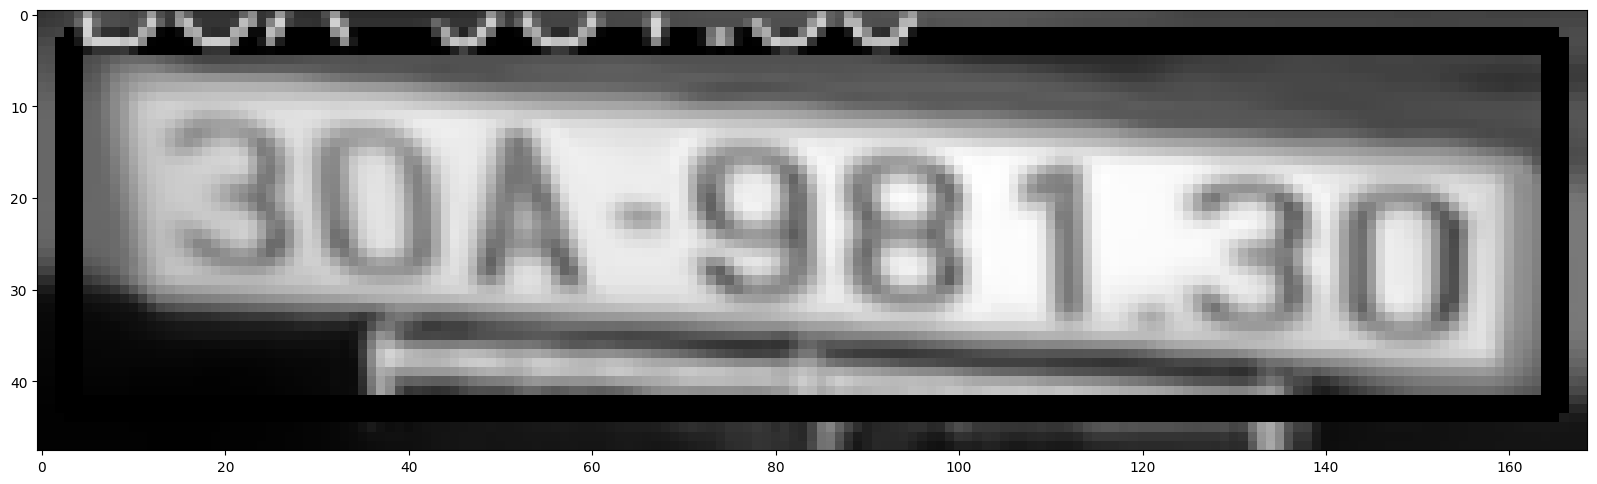

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30K.20922
Character Error Rate: 0.20
Accuracy: 0.80


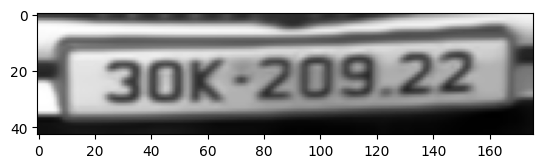

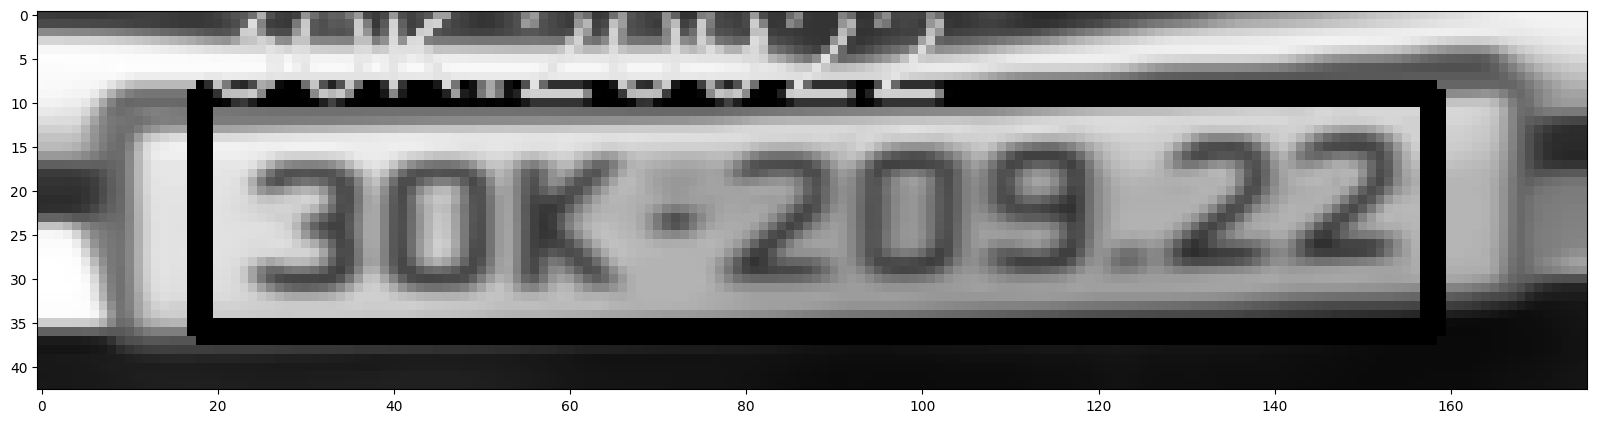

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0K 15262
Character Error Rate: 0.20
Accuracy: 0.80


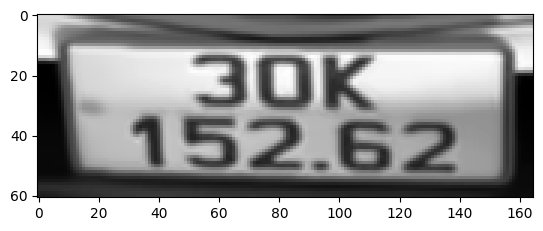

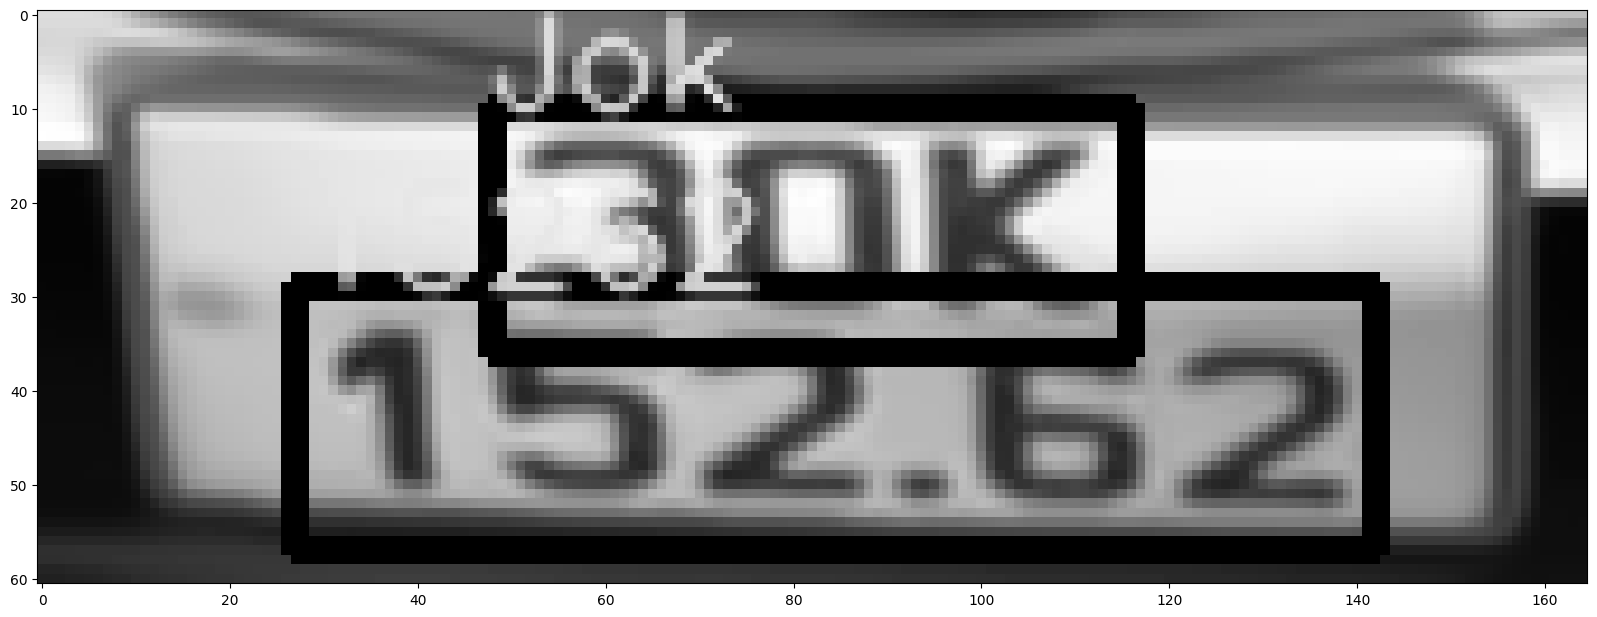

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0F-987.25]
Character Error Rate: 0.20
Accuracy: 0.80


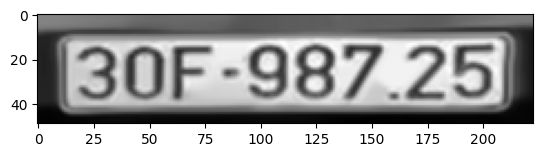

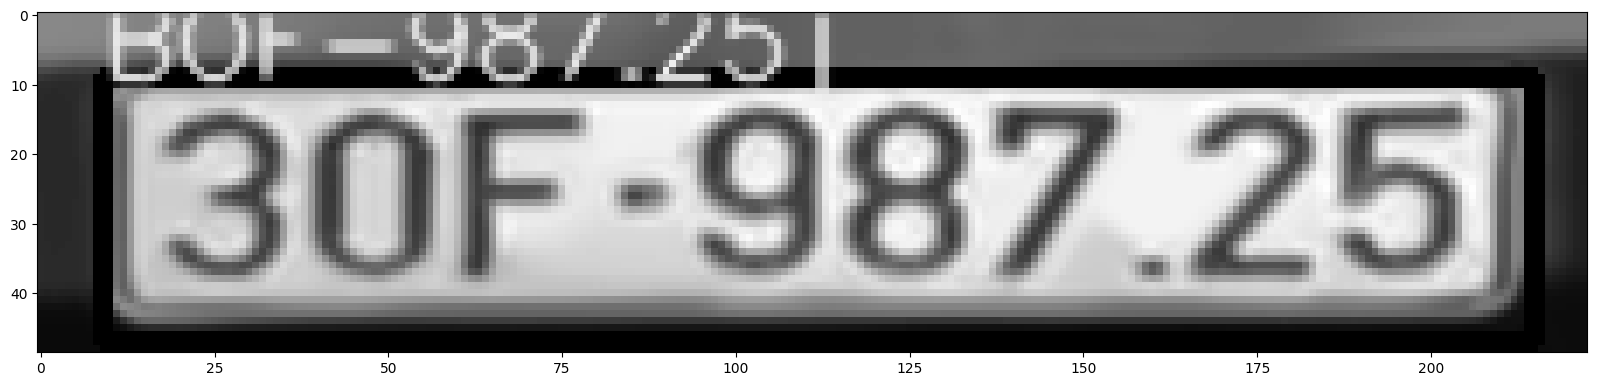

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0F-369.35
Character Error Rate: 0.10
Accuracy: 0.90


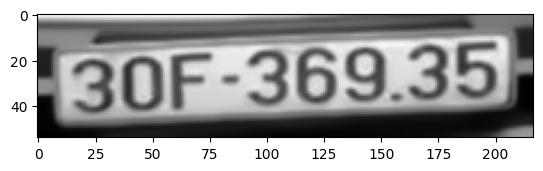

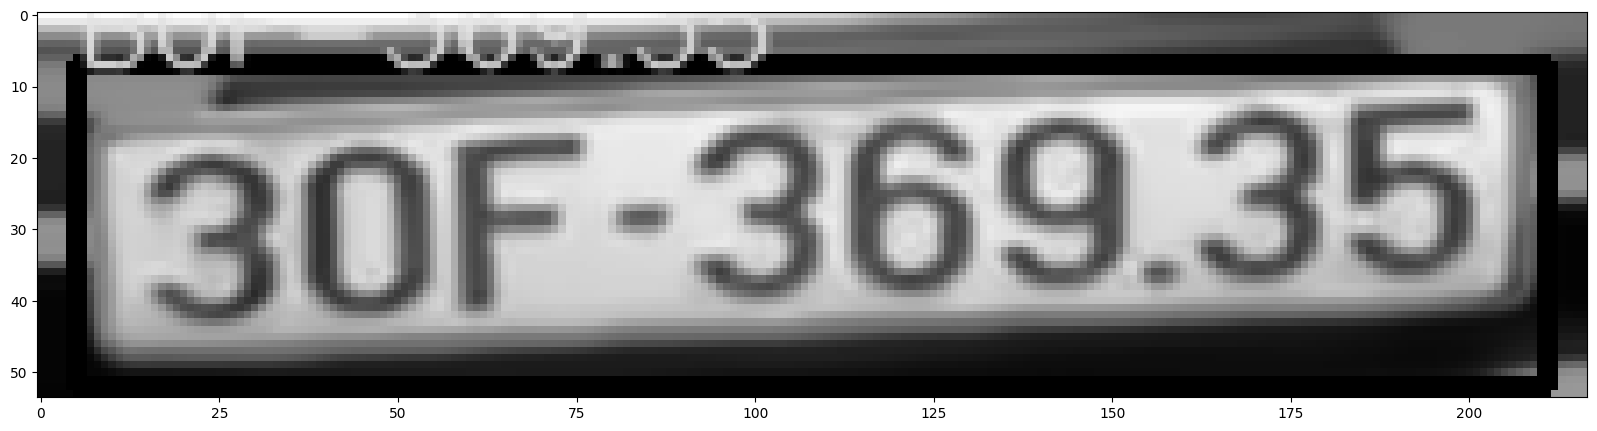

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-S6 036  1Z
Character Error Rate: 0.25
Accuracy: 0.75


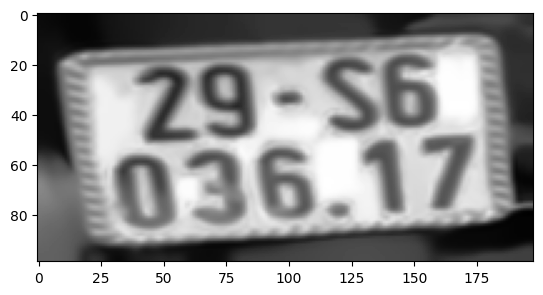

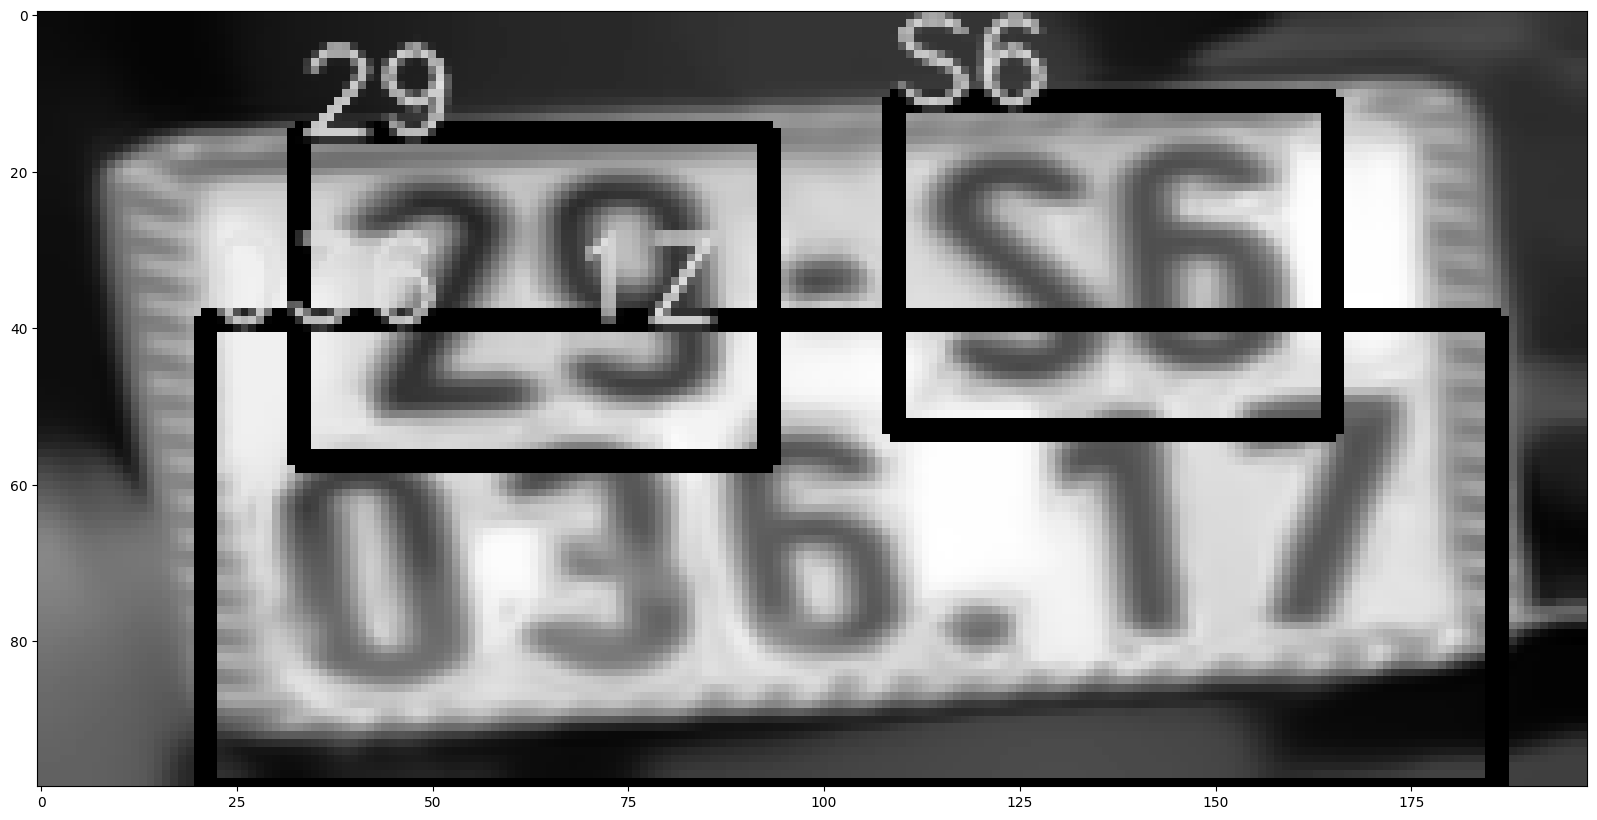

Using CPU. Note: This module is much faster with a GPU.


License plate number: 304 475.05
Character Error Rate: 0.10
Accuracy: 0.90


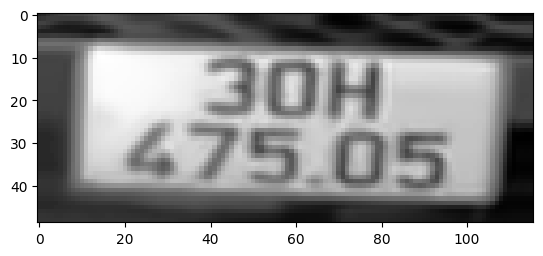

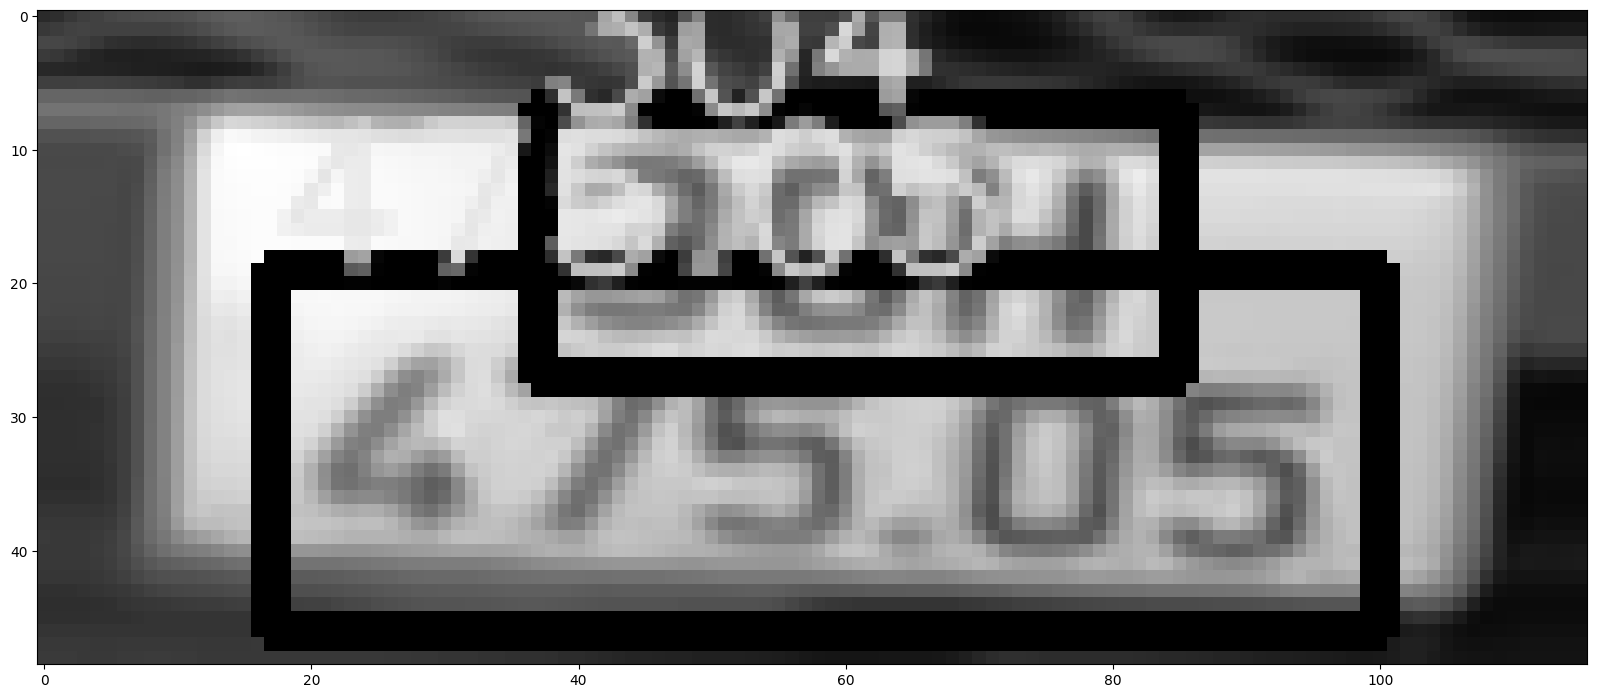

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0E-465.222
Character Error Rate: 0.30
Accuracy: 0.70


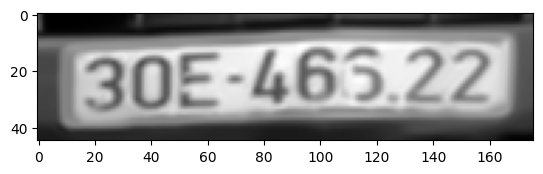

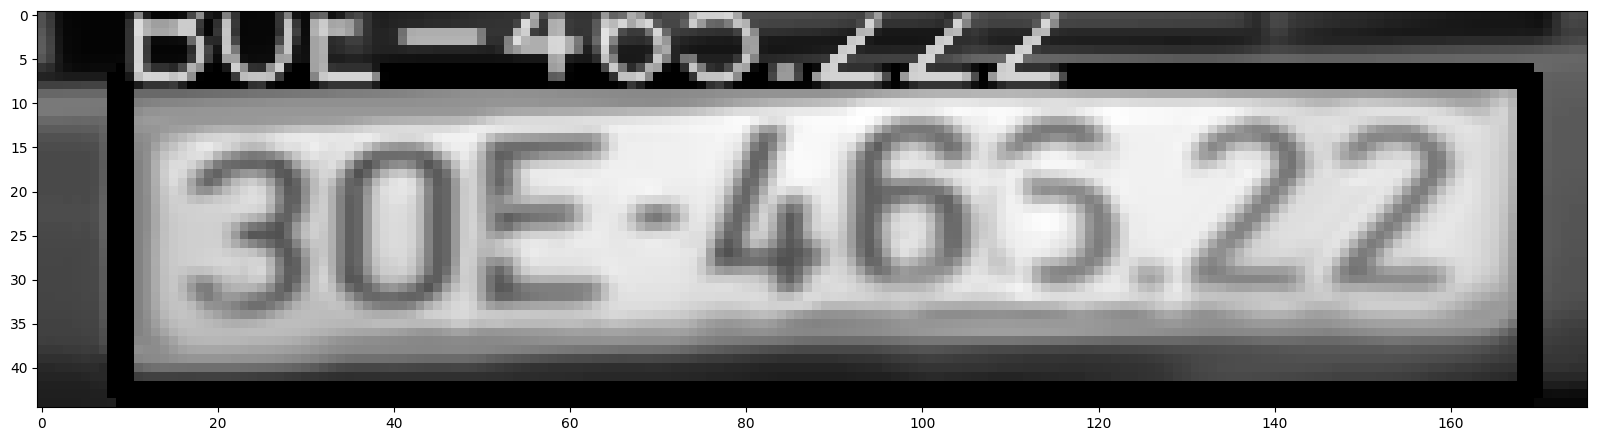

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0F-057.36]
Character Error Rate: 0.20
Accuracy: 0.80


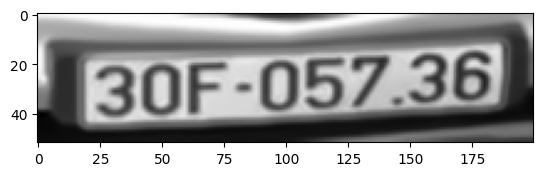

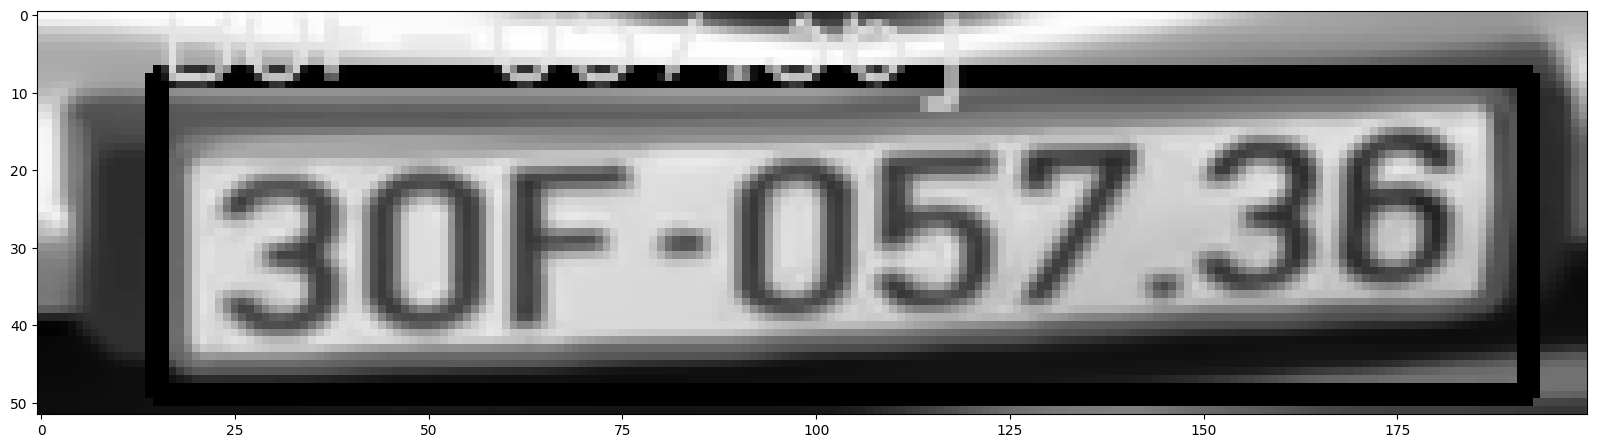

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 645.85
Character Error Rate: 0.10
Accuracy: 0.90


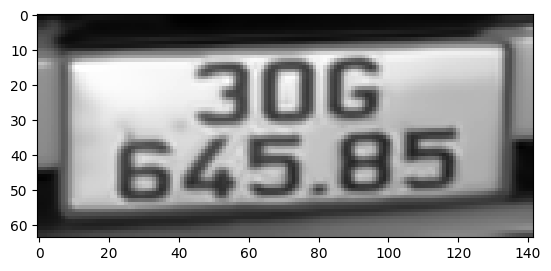

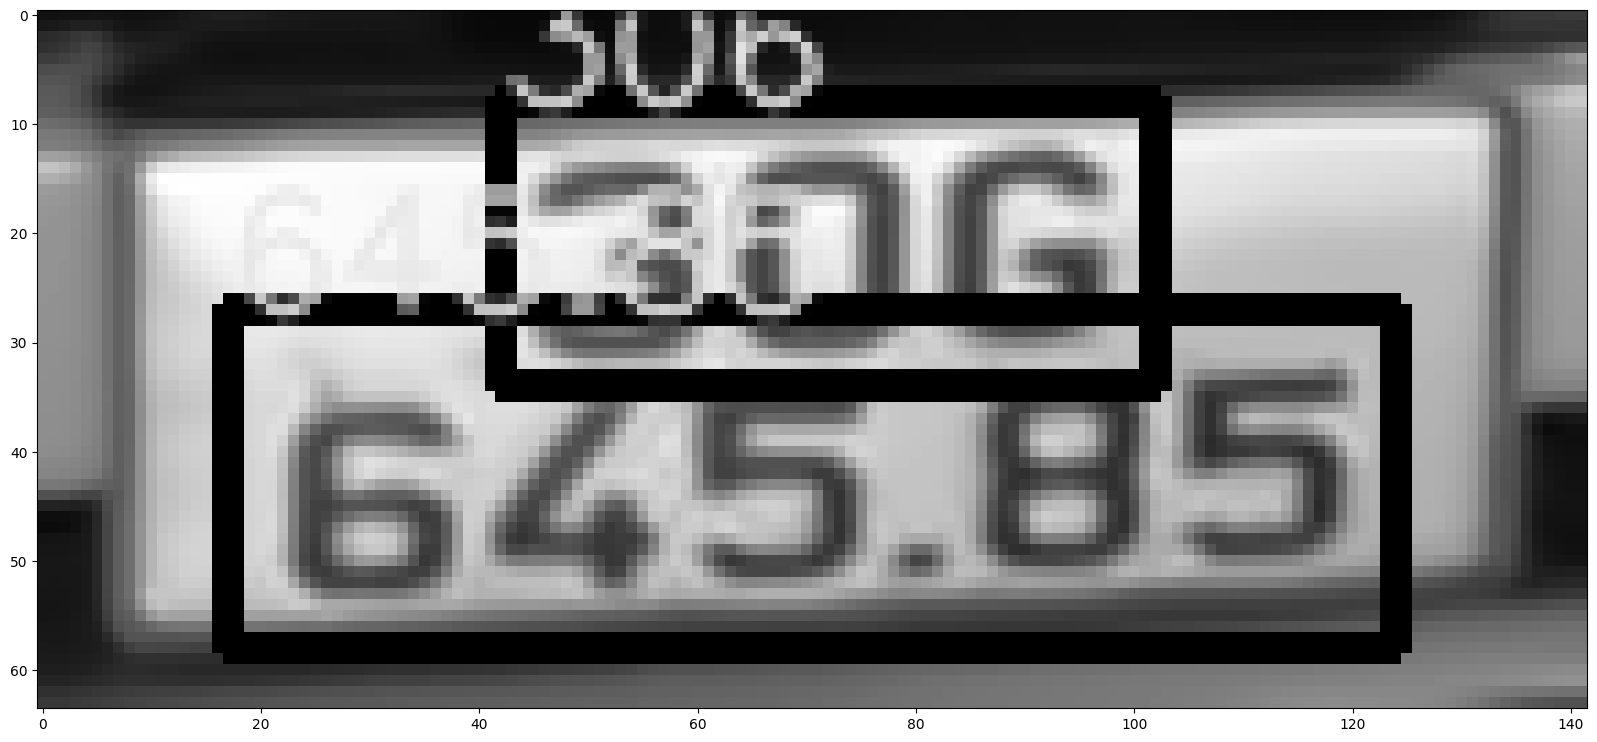

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 505.41
Character Error Rate: 0.10
Accuracy: 0.90


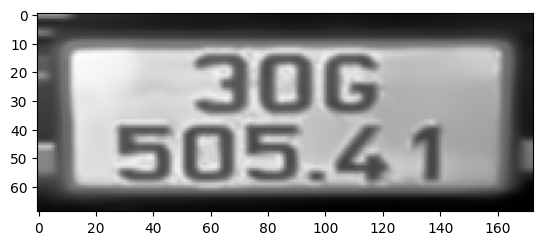

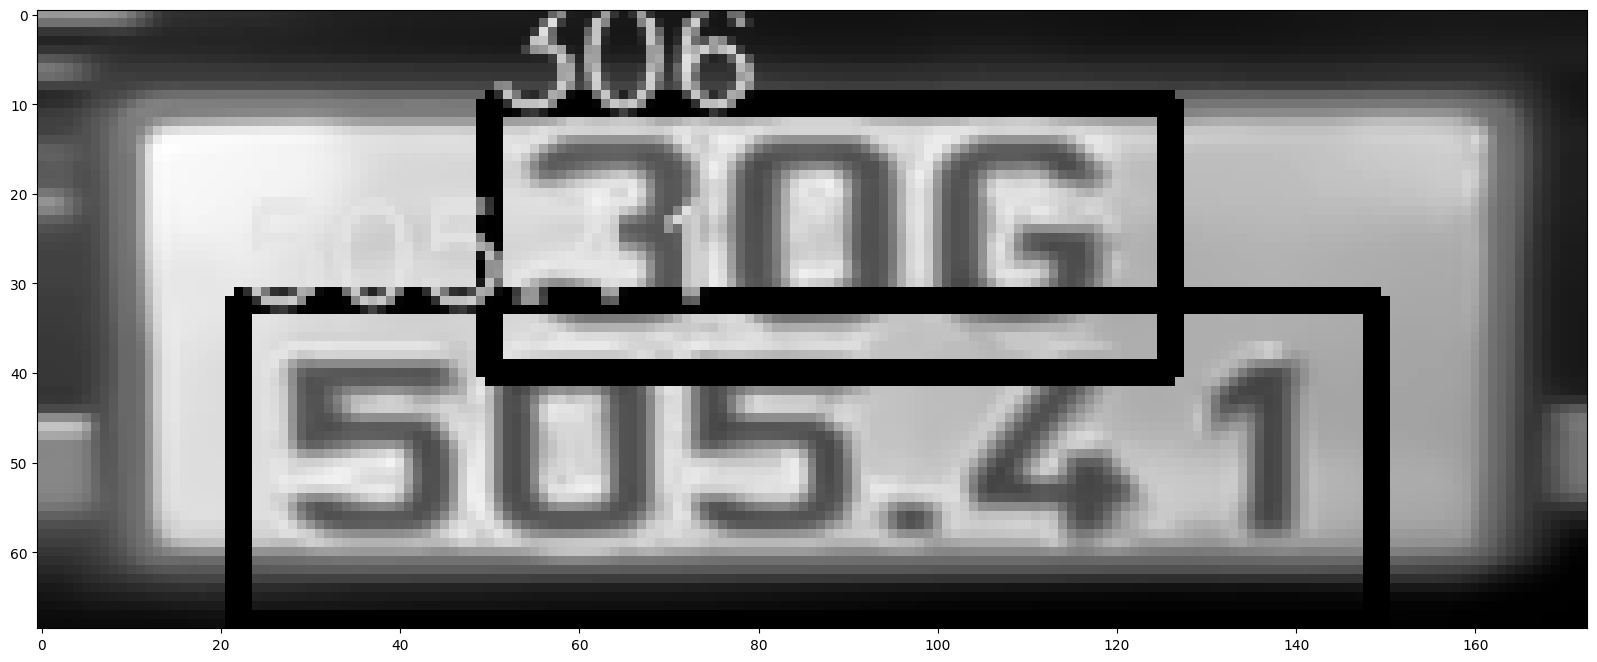

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0F.722.28
Character Error Rate: 0.20
Accuracy: 0.80


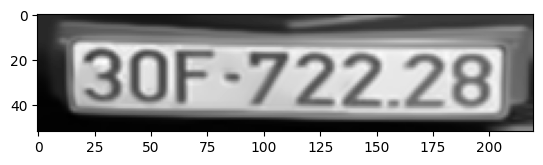

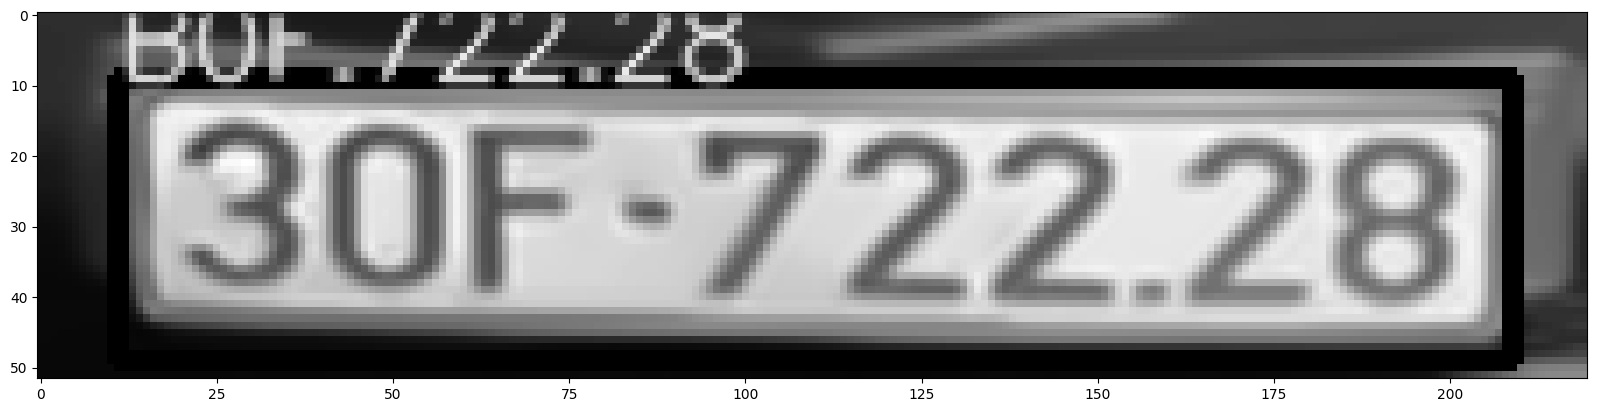

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30H 692.30
Character Error Rate: 0.10
Accuracy: 0.90


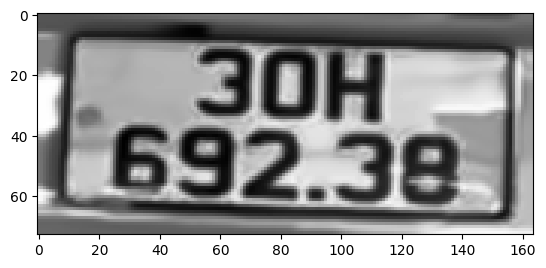

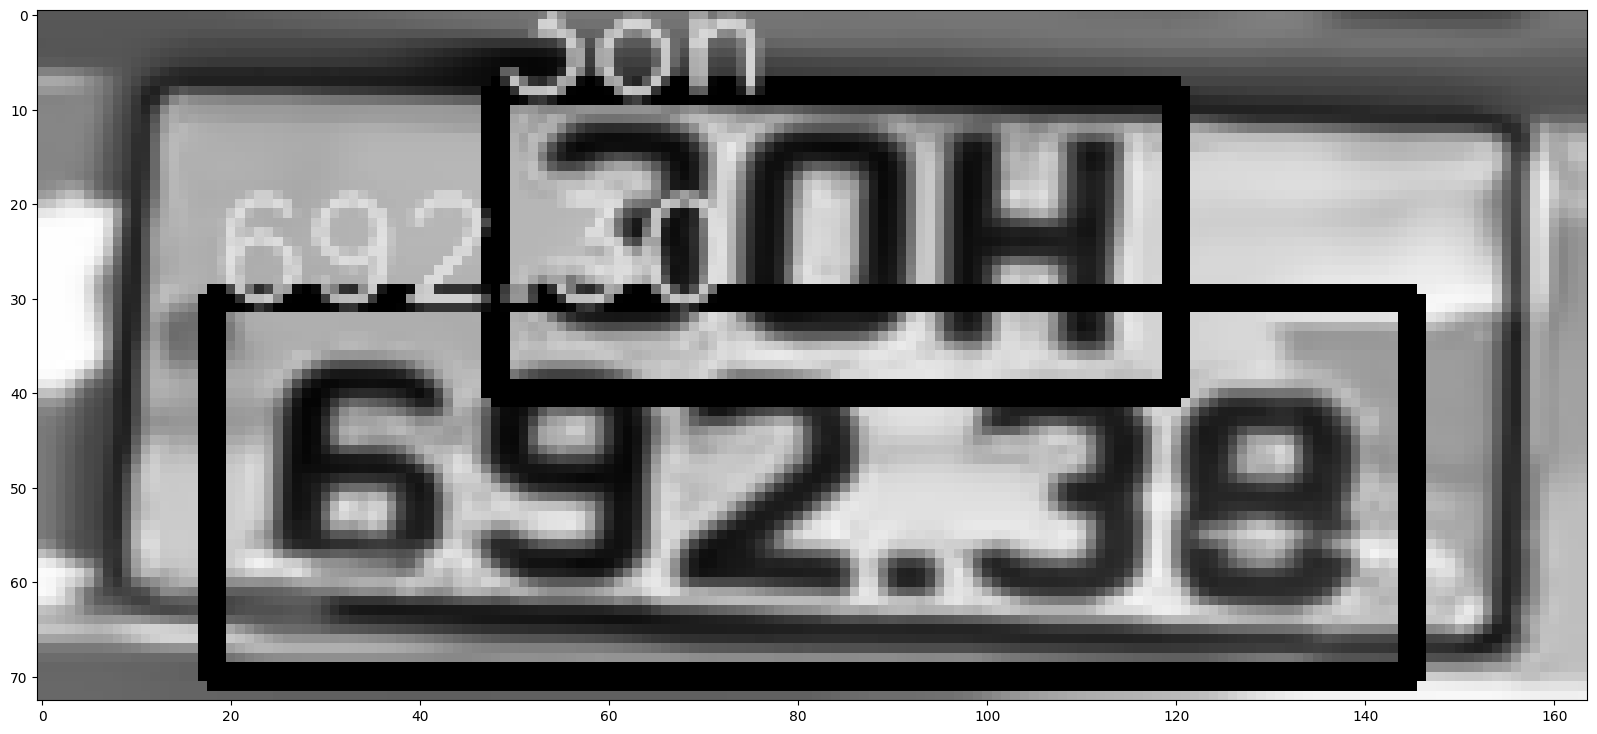

Using CPU. Note: This module is much faster with a GPU.


License plate number: [894-146.26]
Character Error Rate: 0.30
Accuracy: 0.70


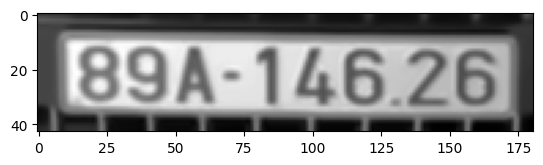

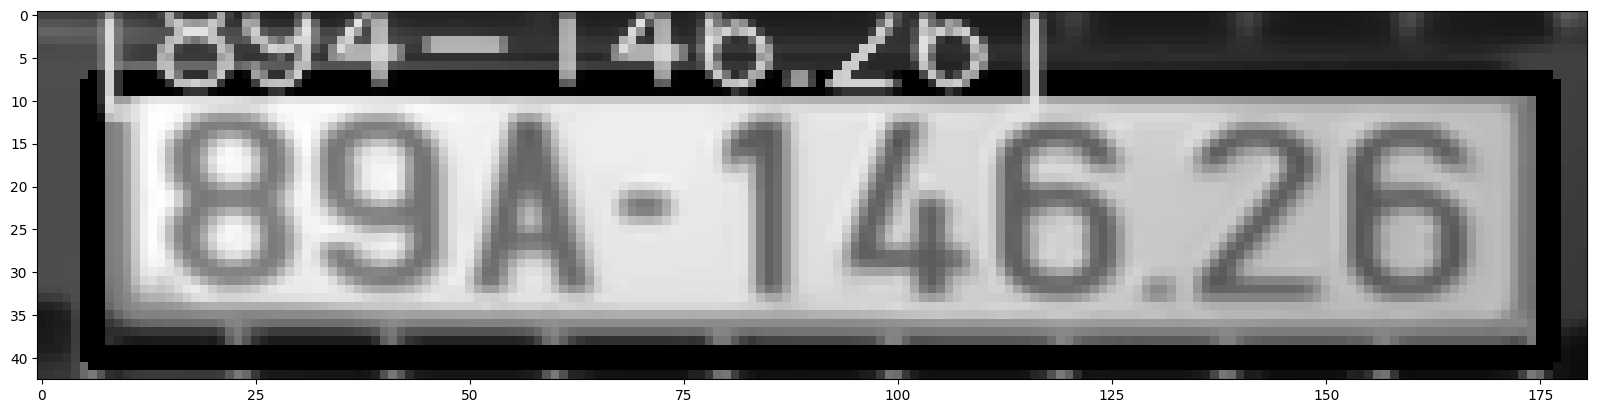

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 12936
Character Error Rate: 0.20
Accuracy: 0.80


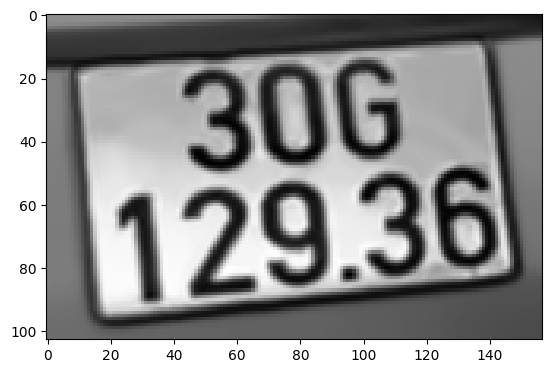

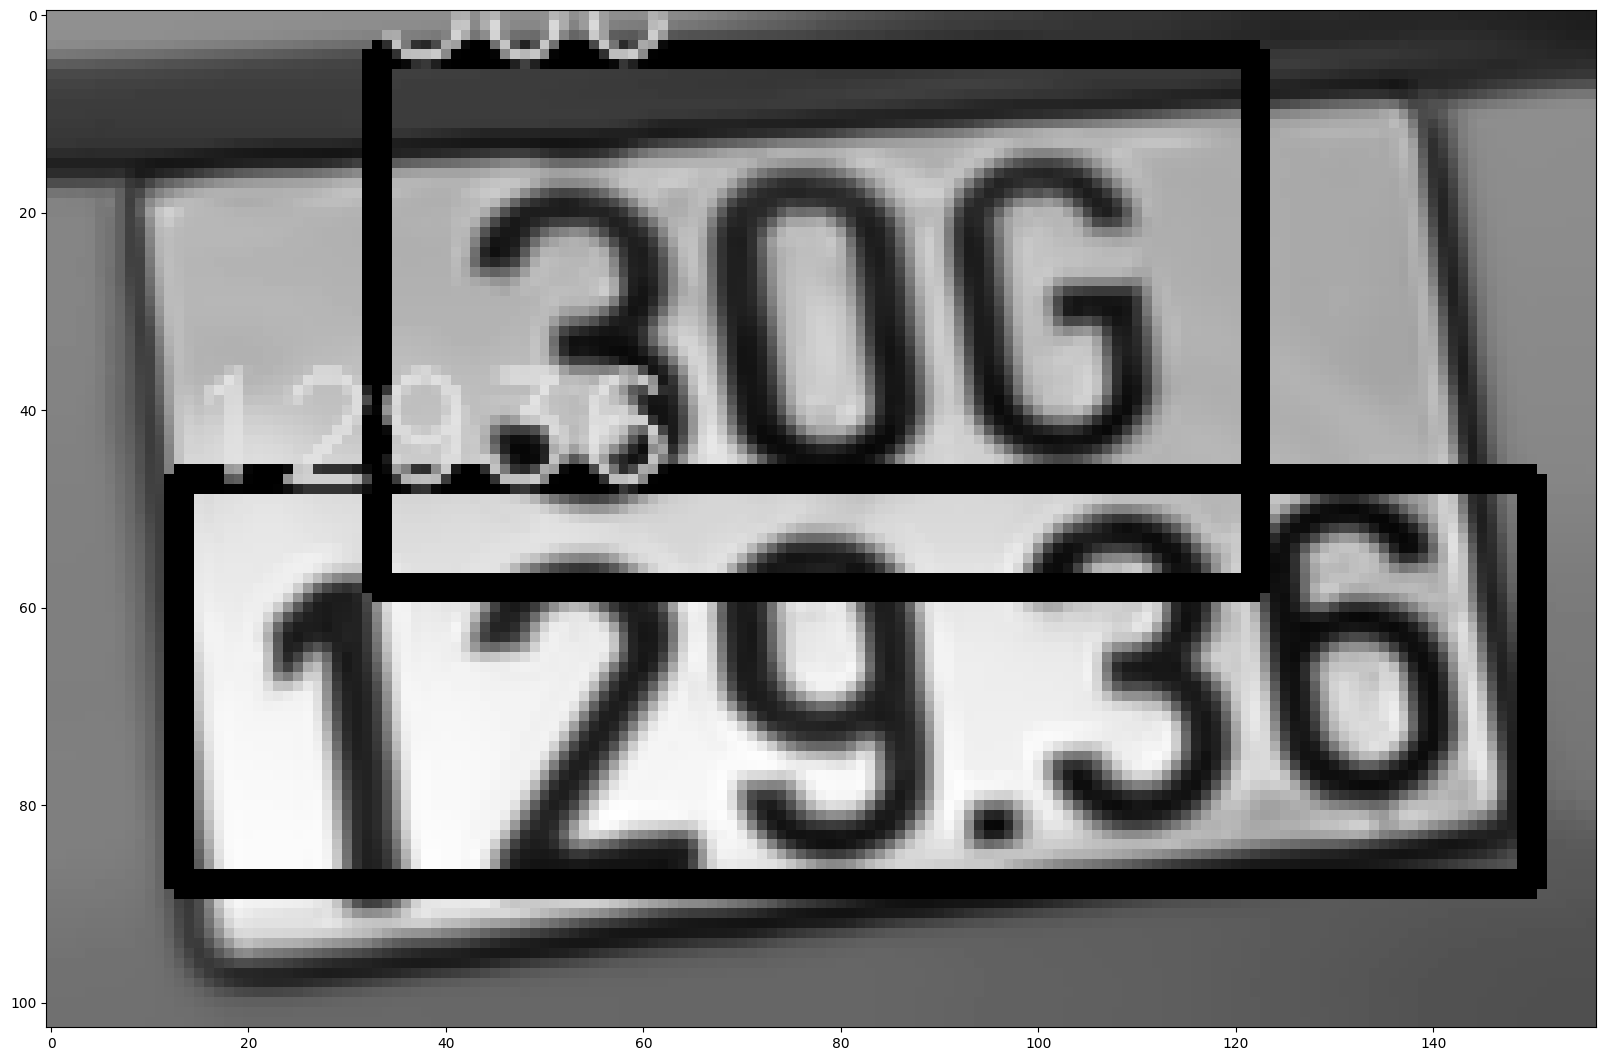

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0H-791.774
Character Error Rate: 0.20
Accuracy: 0.80


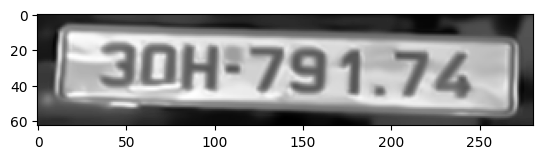

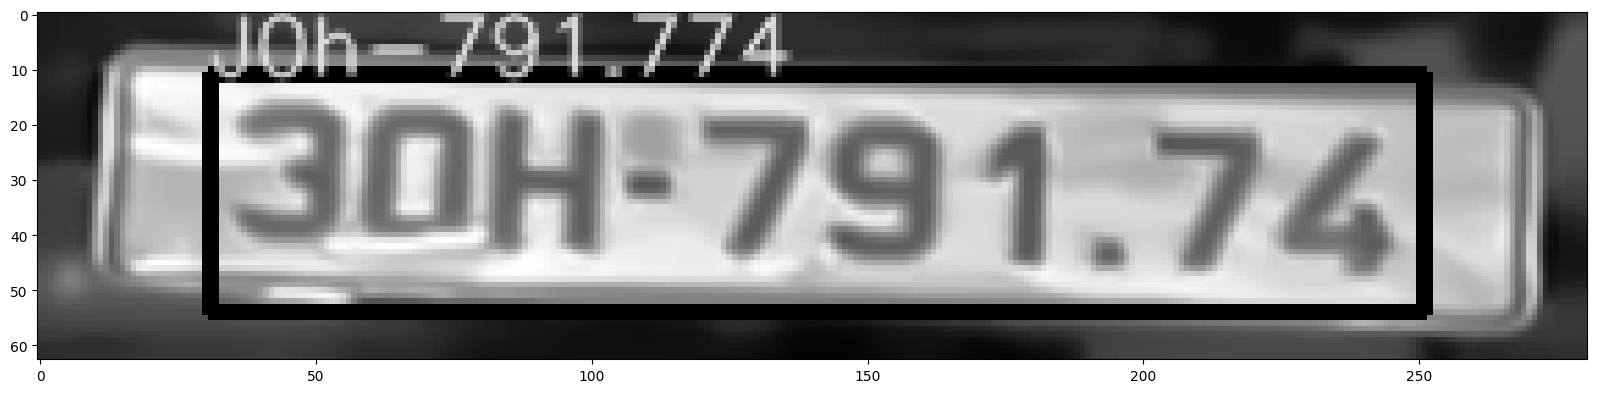

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30F 42856 
Character Error Rate: 0.10
Accuracy: 0.90


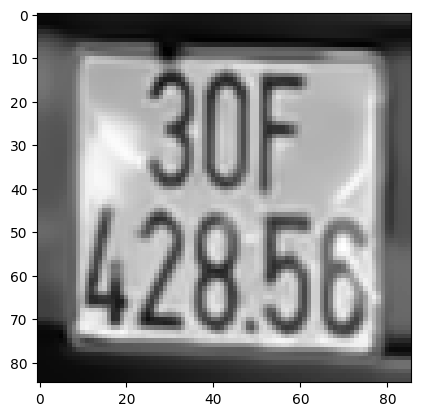

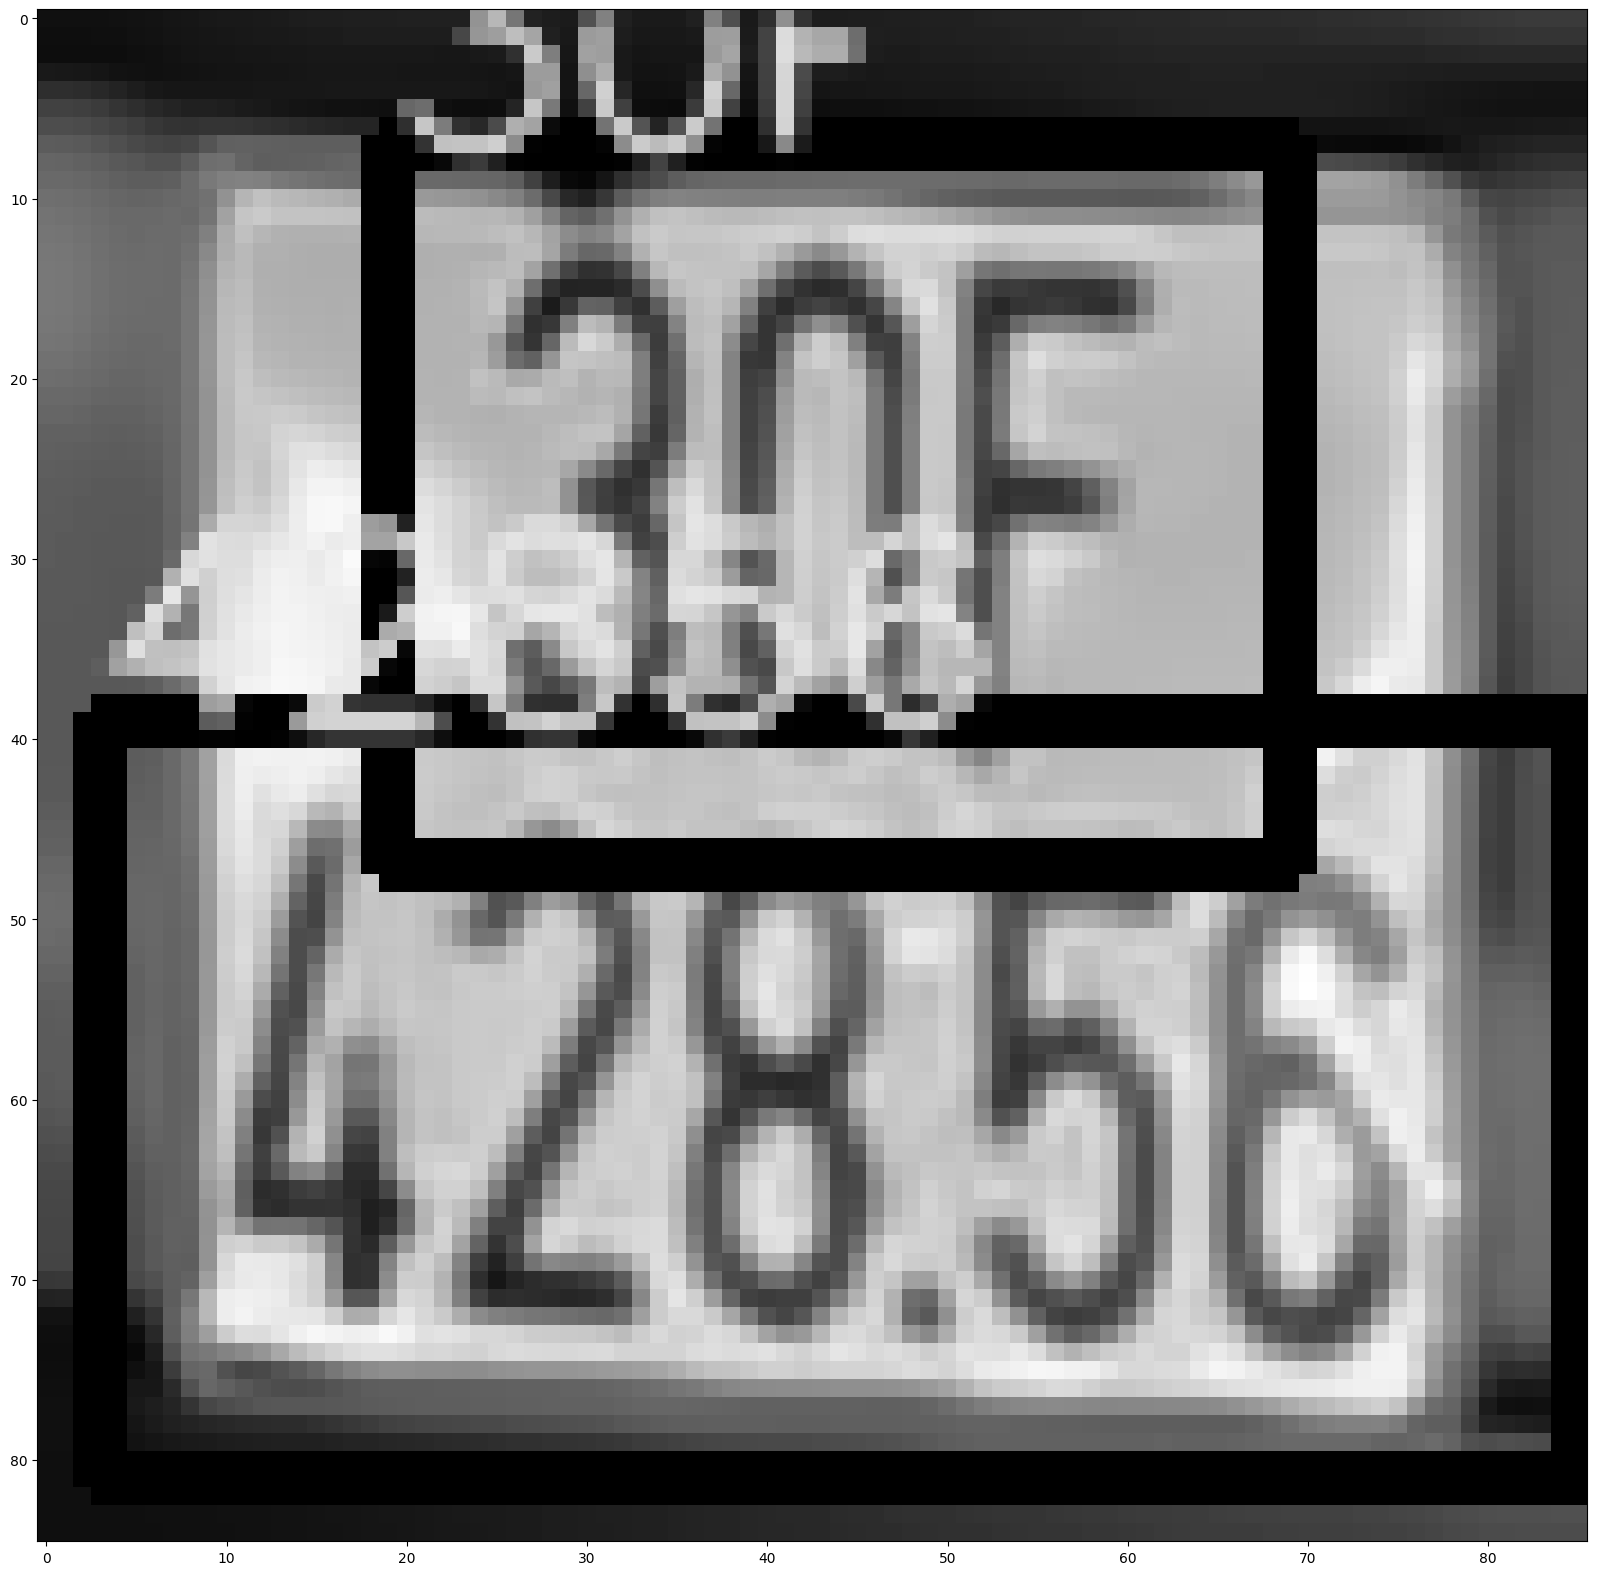

Using CPU. Note: This module is much faster with a GPU.


License plate number: 20439486
Character Error Rate: 0.40
Accuracy: 0.60


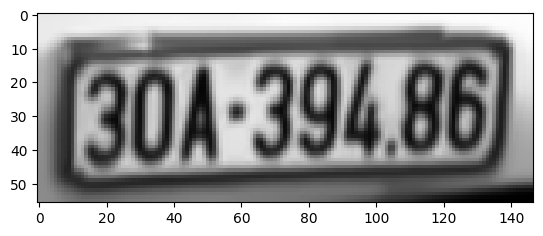

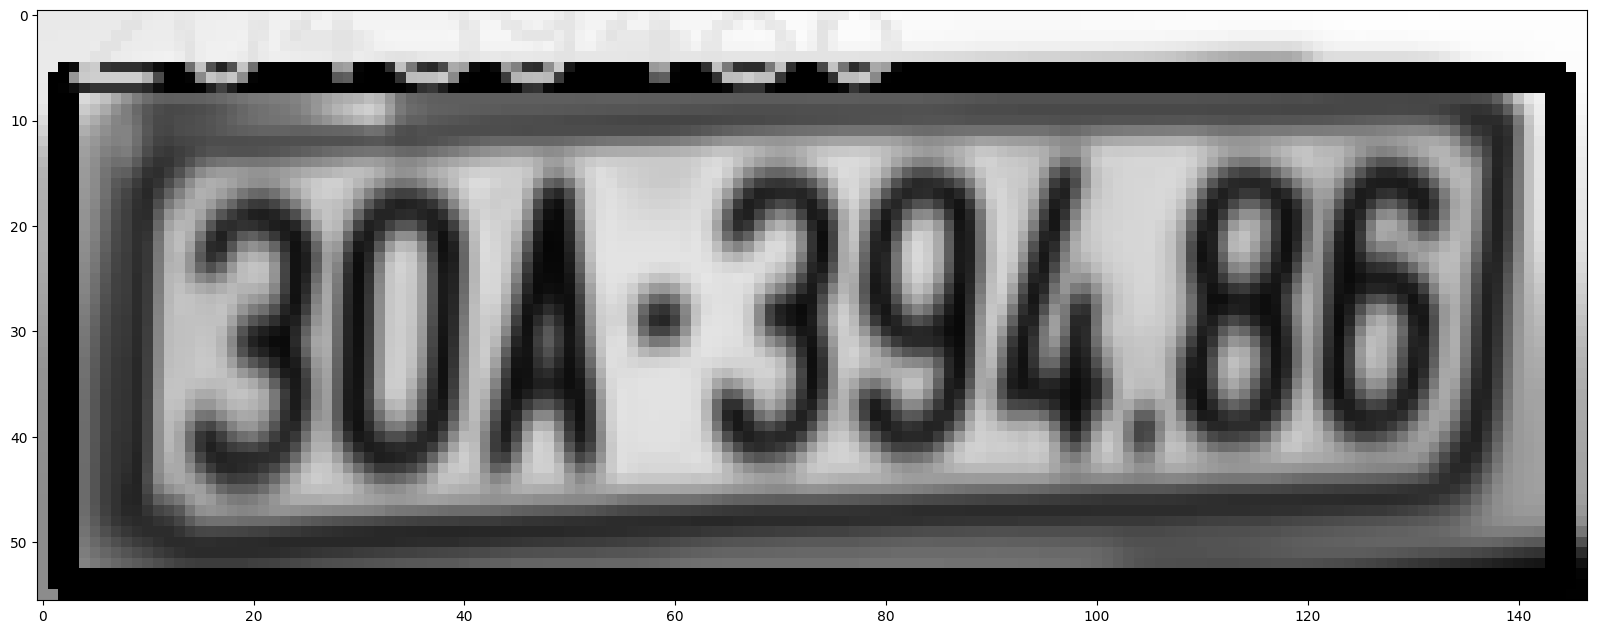

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 791.83
Character Error Rate: 0.10
Accuracy: 0.90


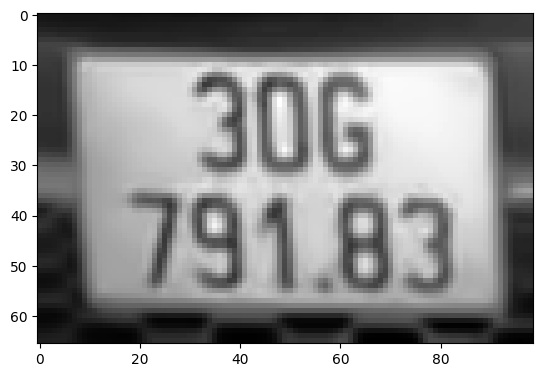

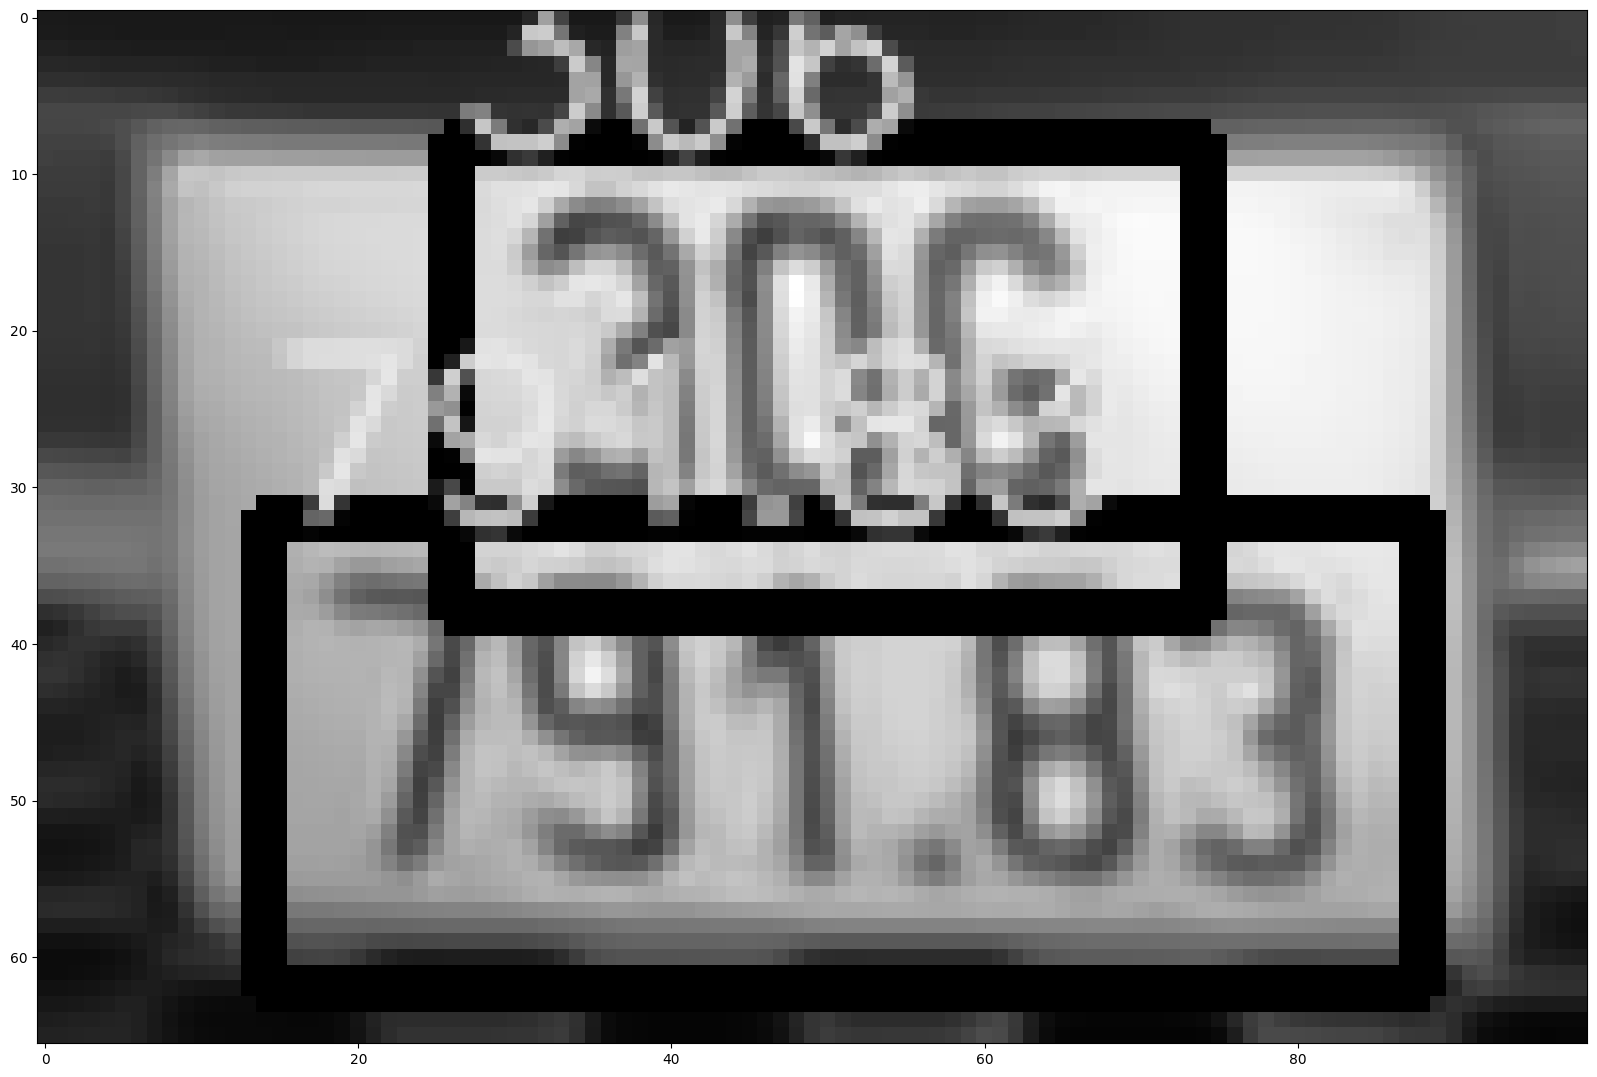

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30A 52385
Character Error Rate: 0.10
Accuracy: 0.90


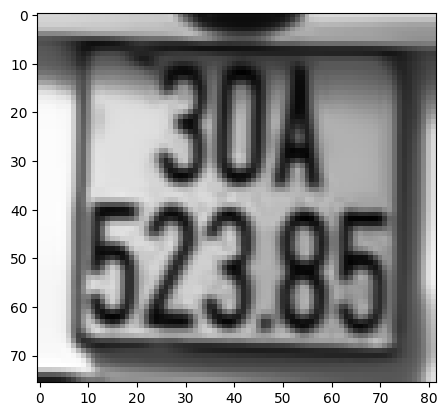

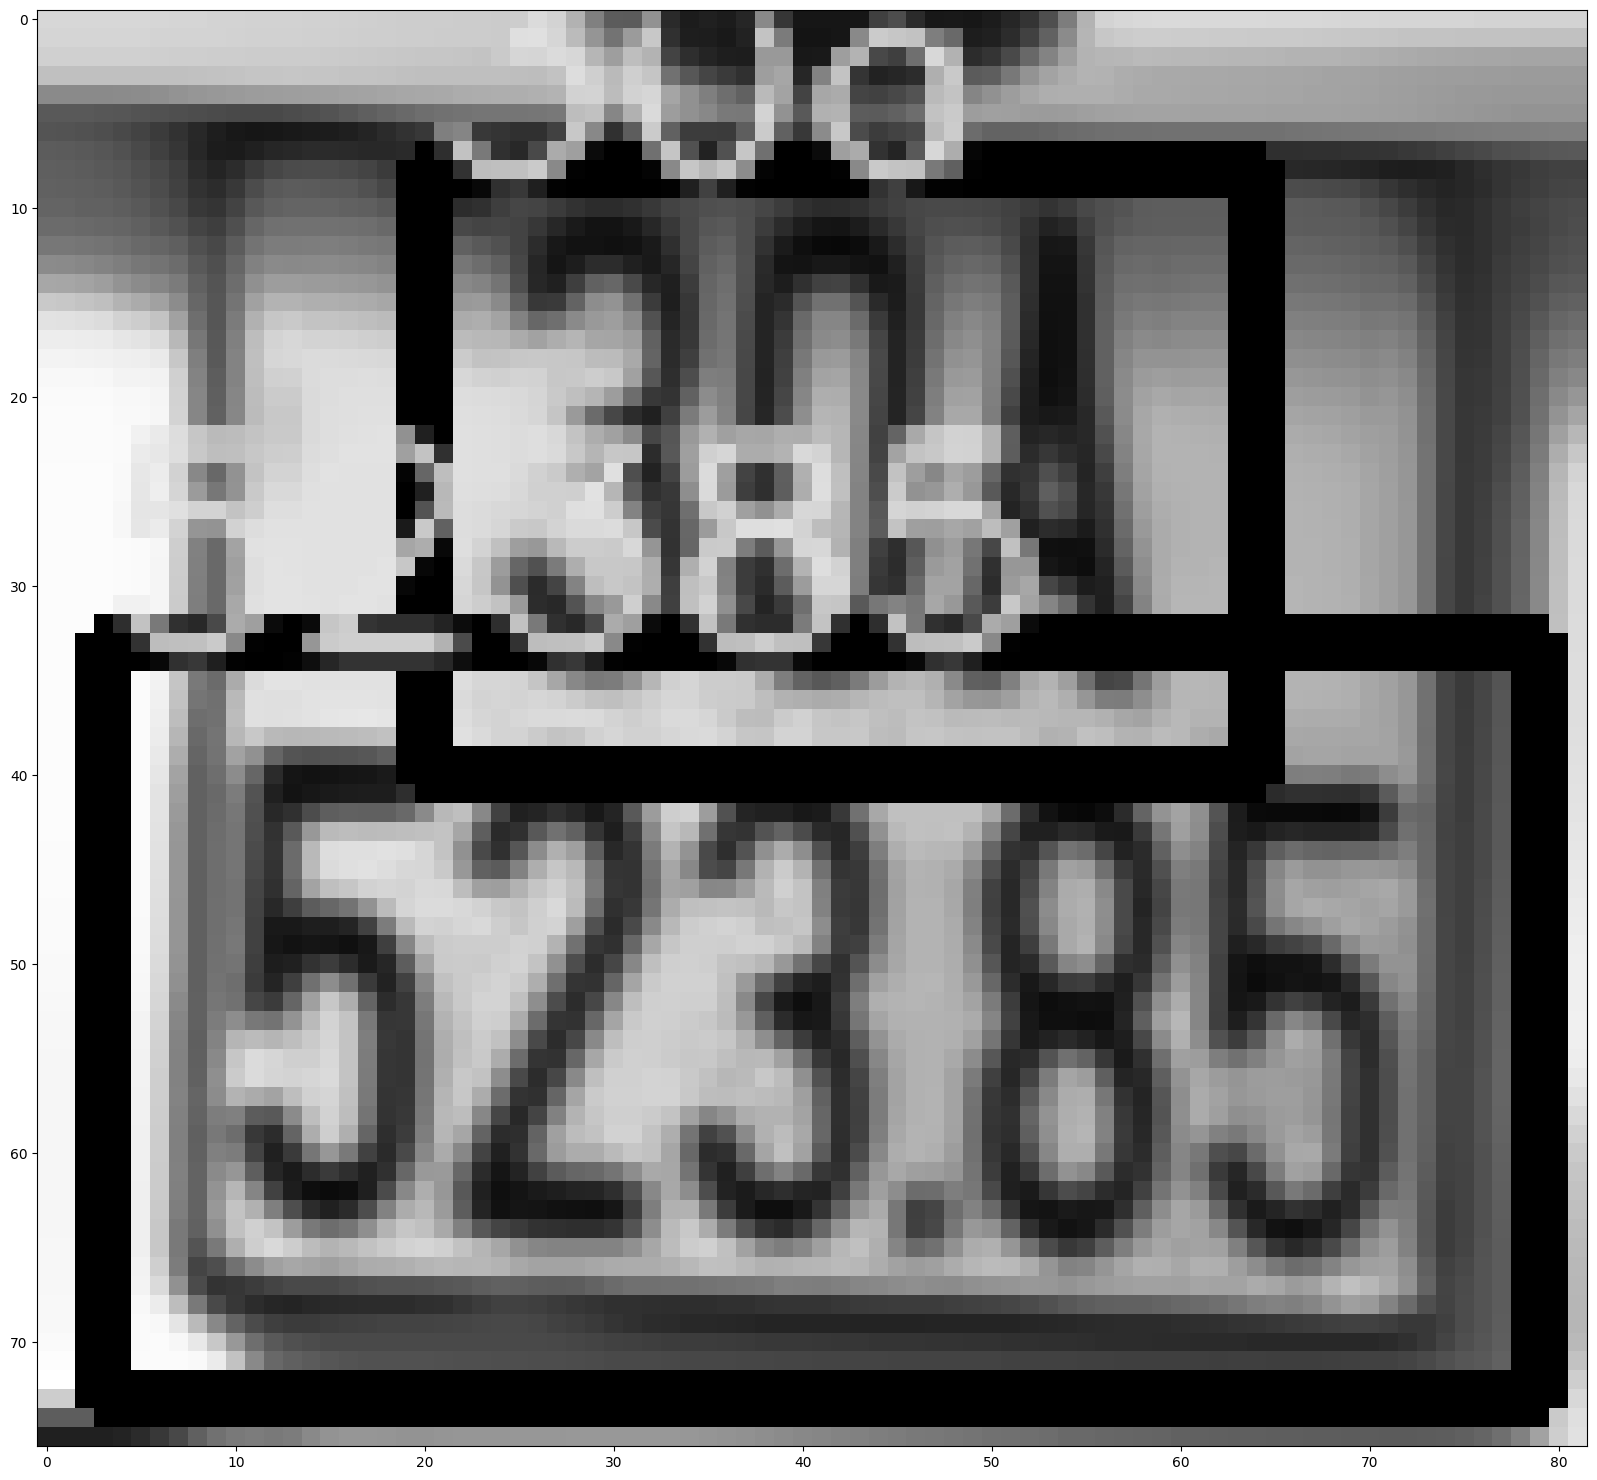

Using CPU. Note: This module is much faster with a GPU.


License plate number: 291 26717 
Character Error Rate: 0.30
Accuracy: 0.70


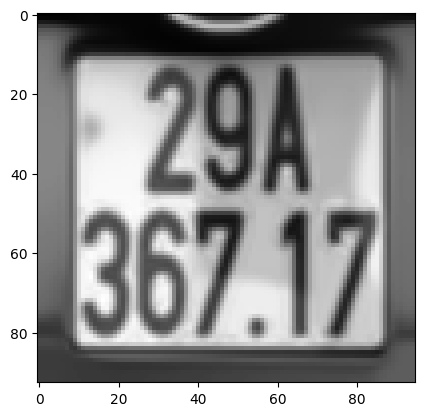

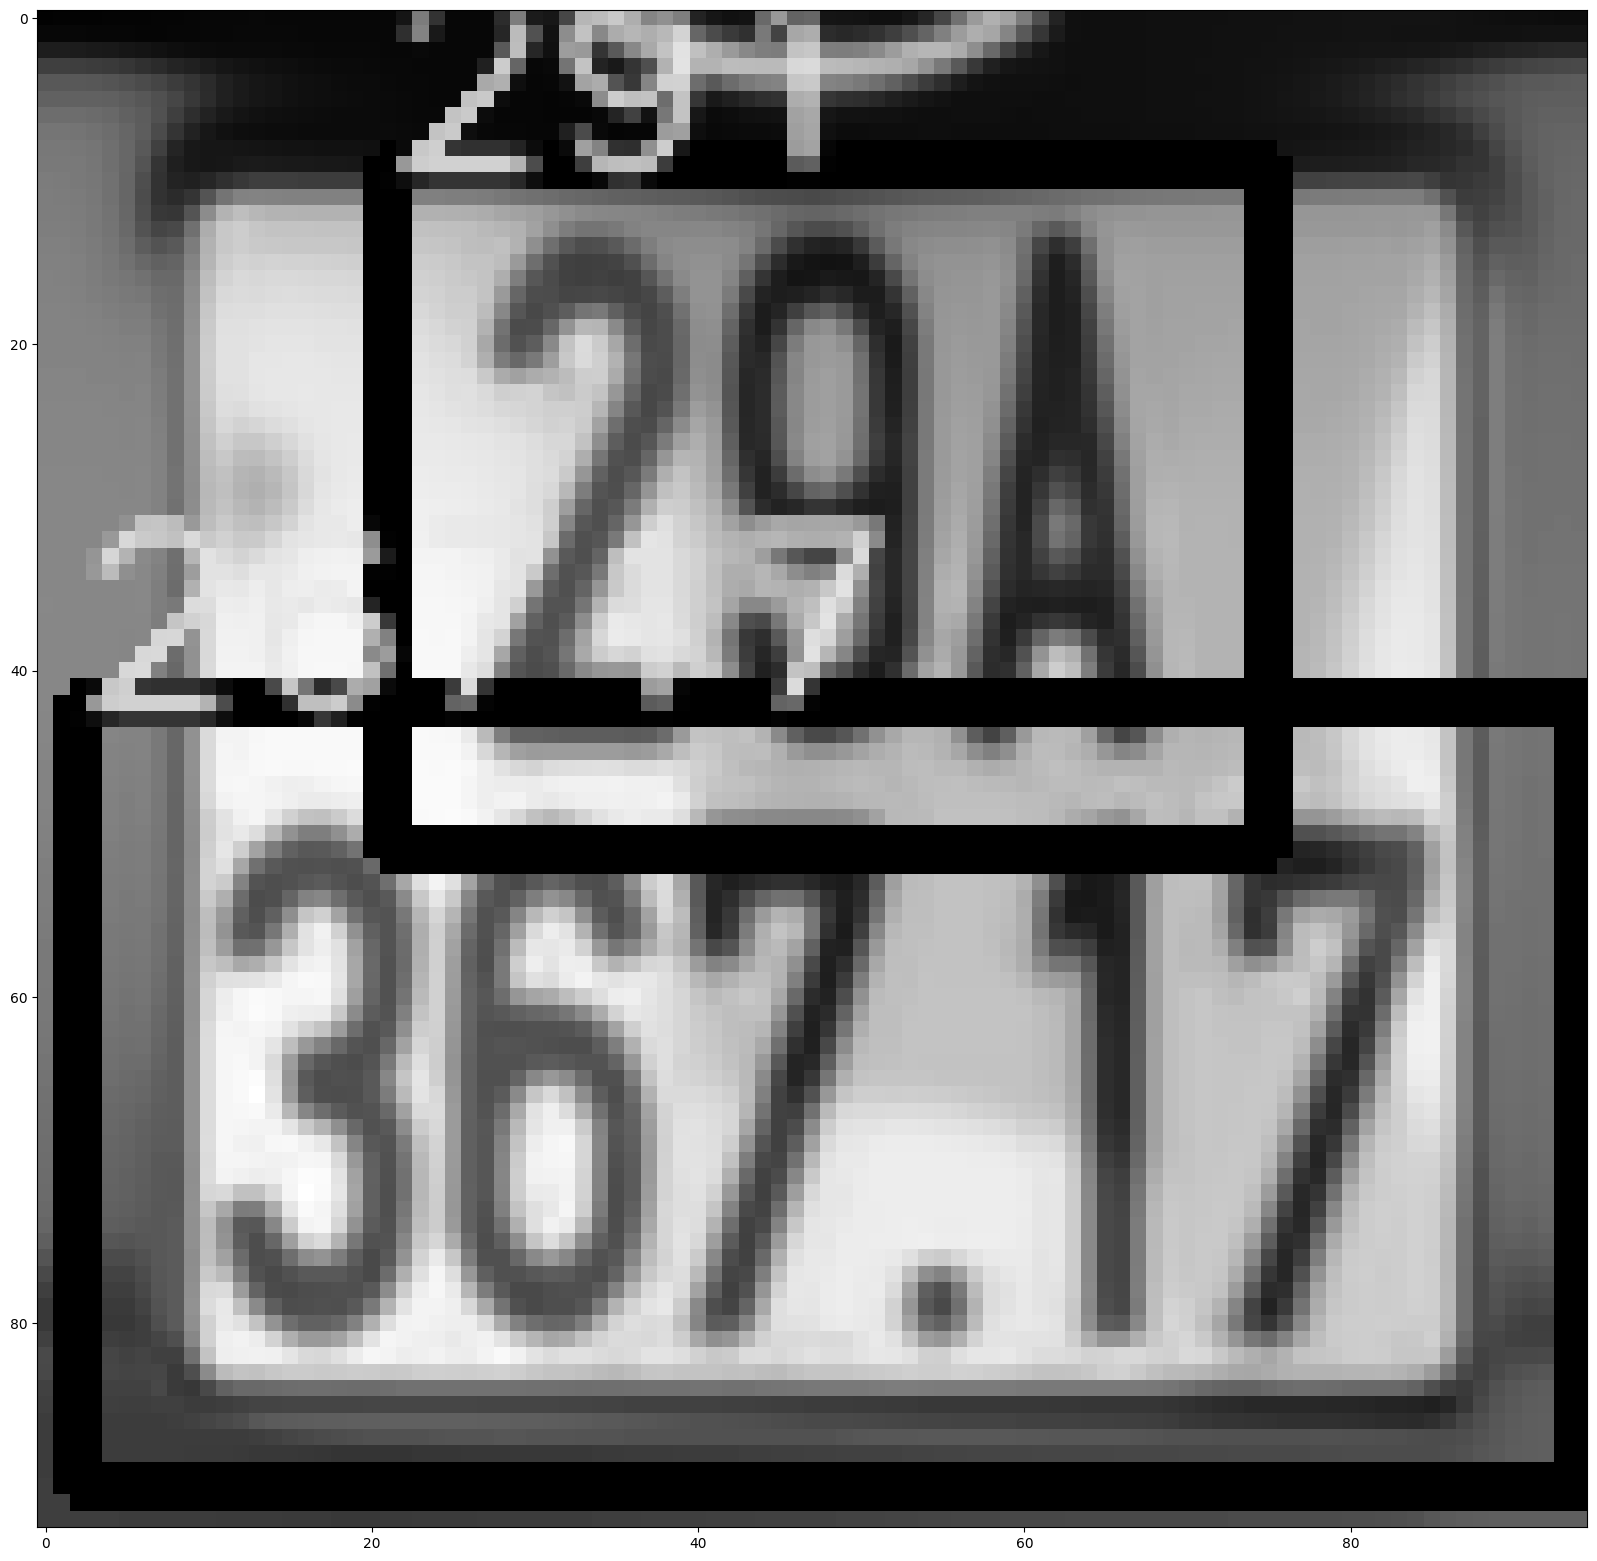

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30F 281.18
Character Error Rate: 0.00
Accuracy: 1.00


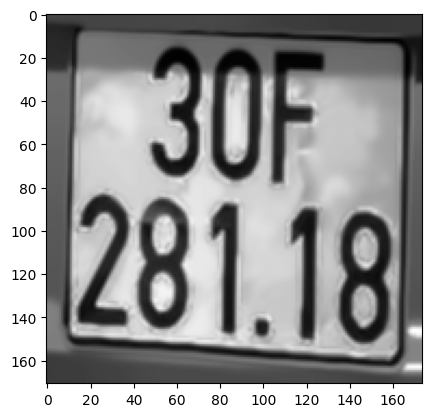

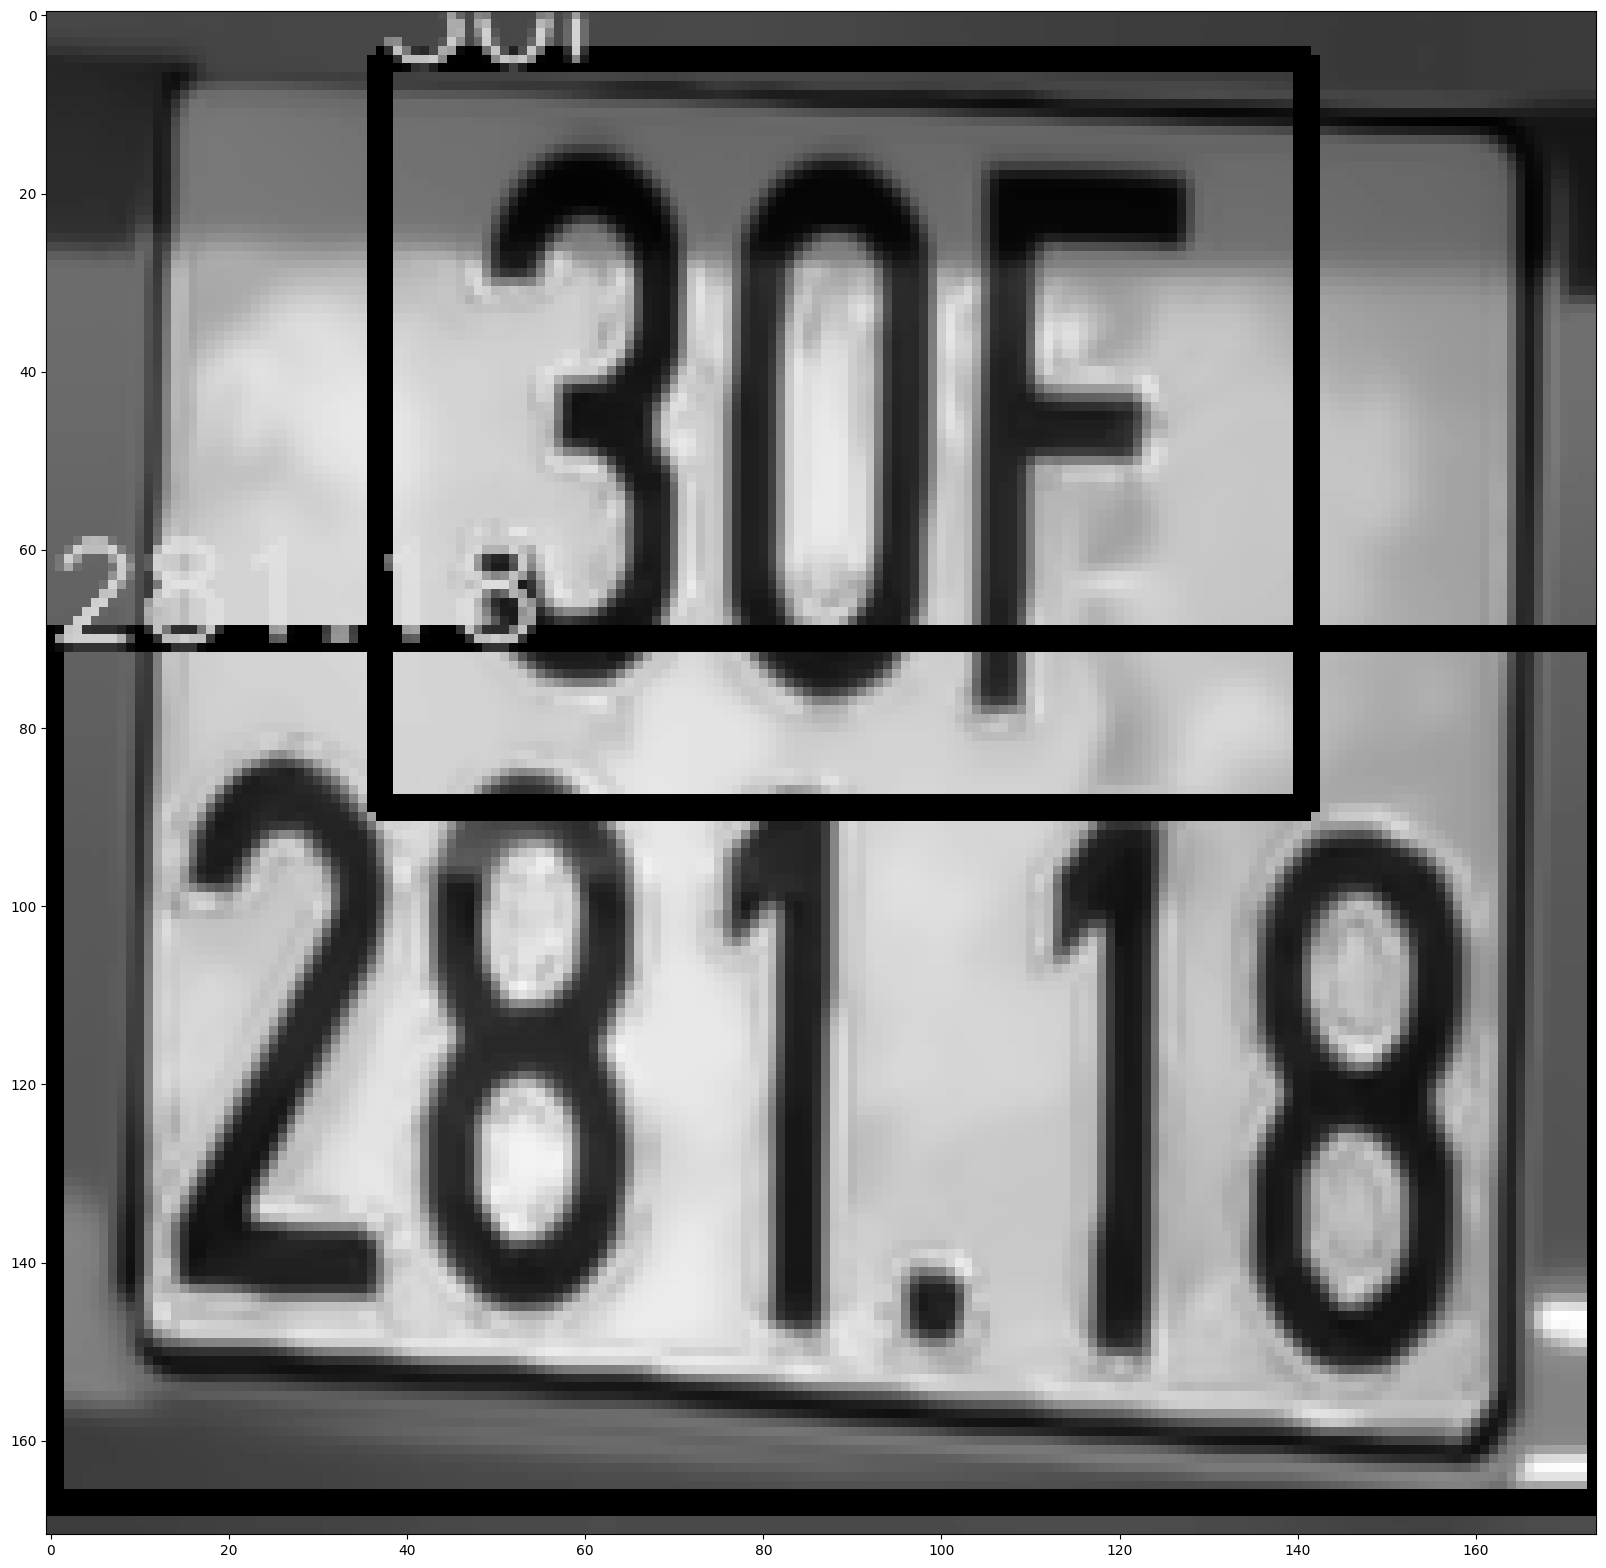

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29A 015.19
Character Error Rate: 0.00
Accuracy: 1.00


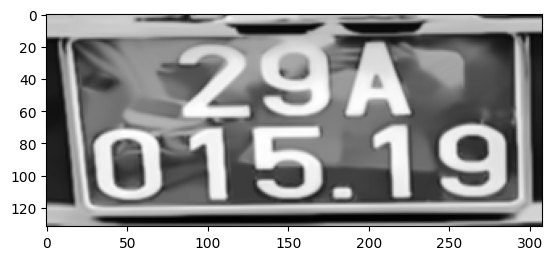

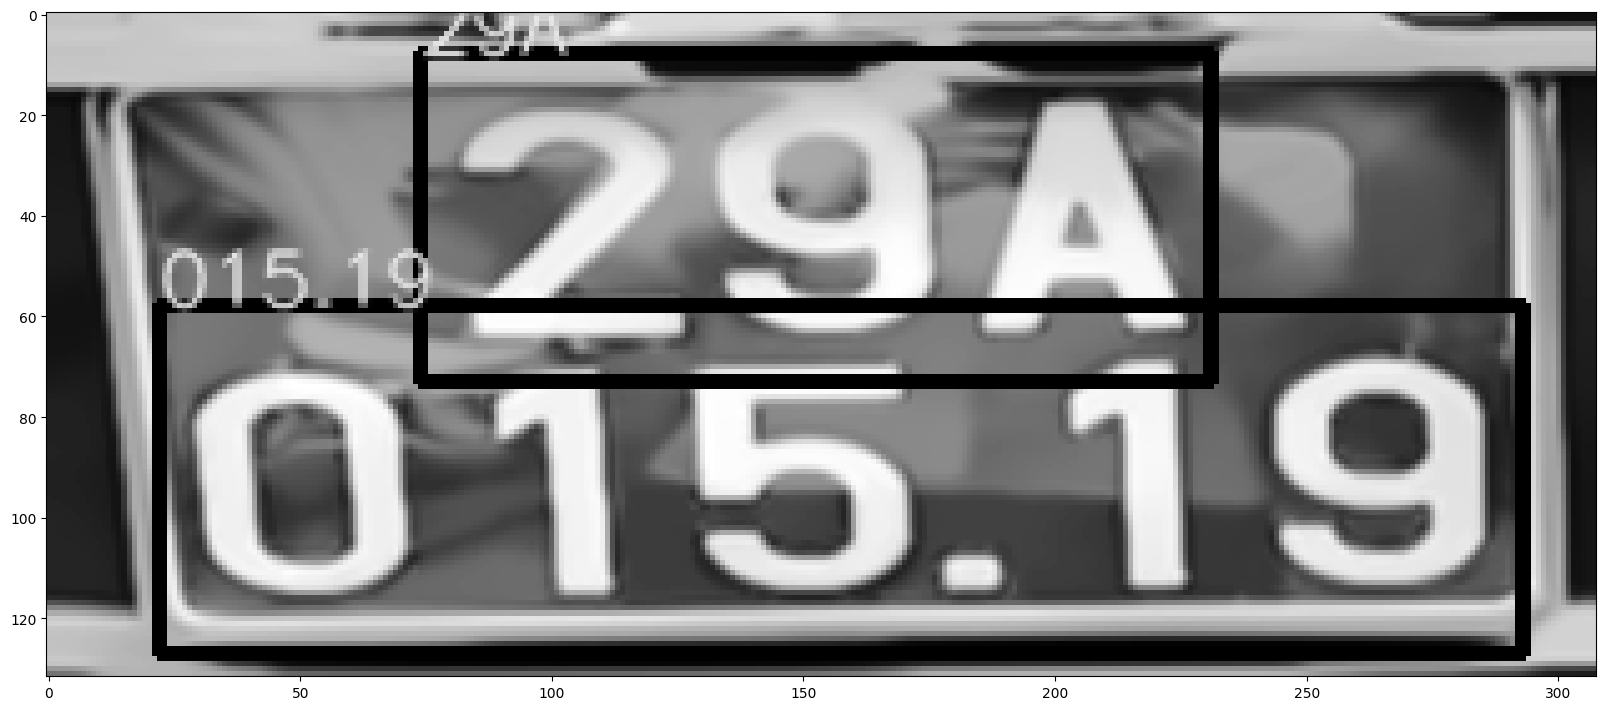

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 125.82
Character Error Rate: 0.10
Accuracy: 0.90


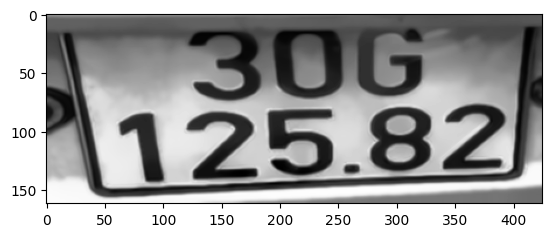

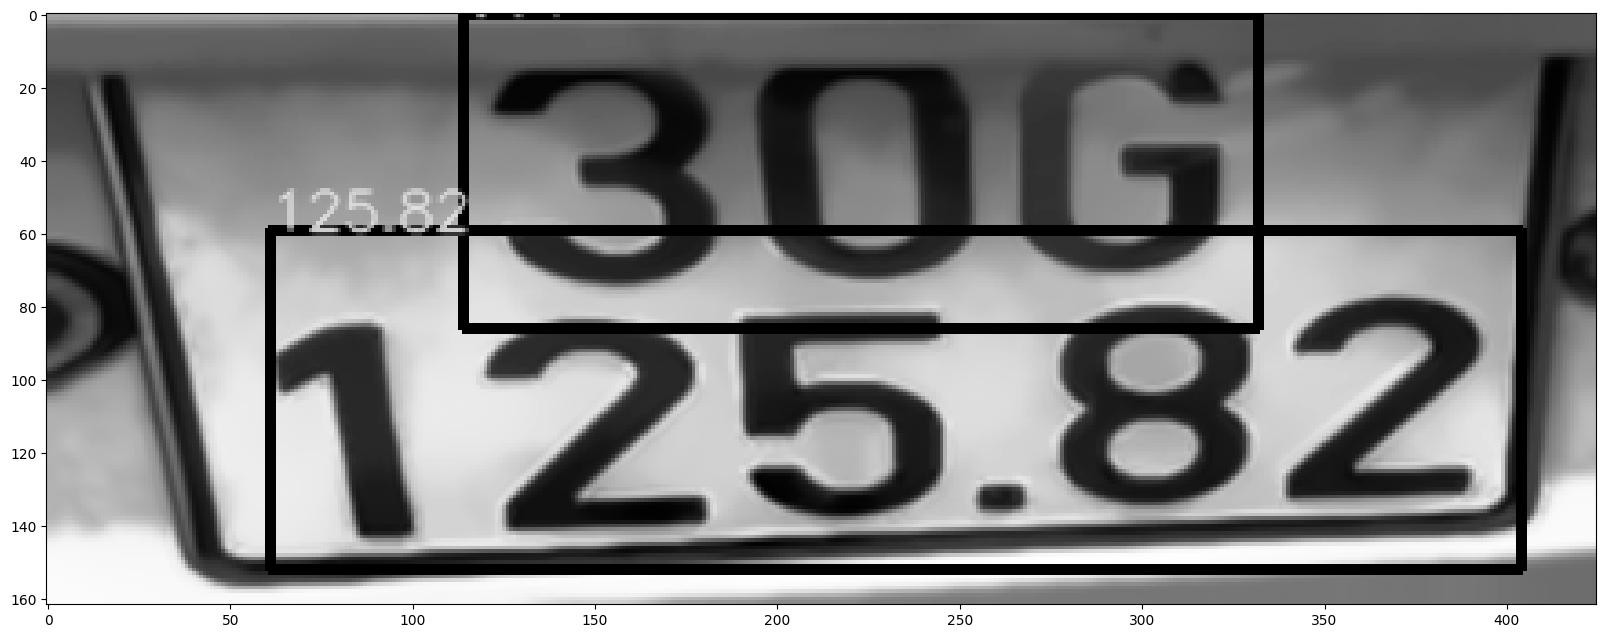

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0.478.75
Character Error Rate: 0.30
Accuracy: 0.70


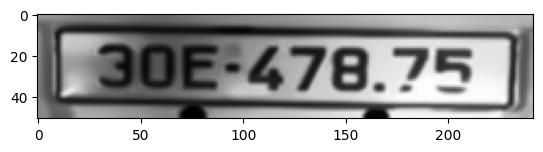

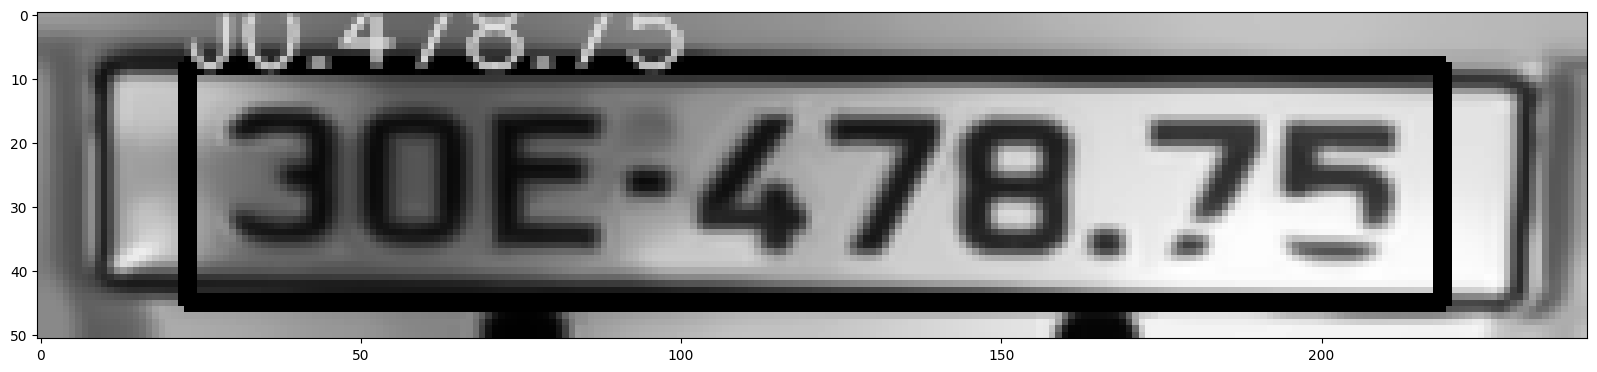

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0K 48B.16
Character Error Rate: 0.20
Accuracy: 0.80


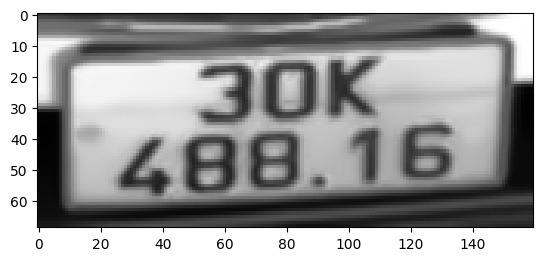

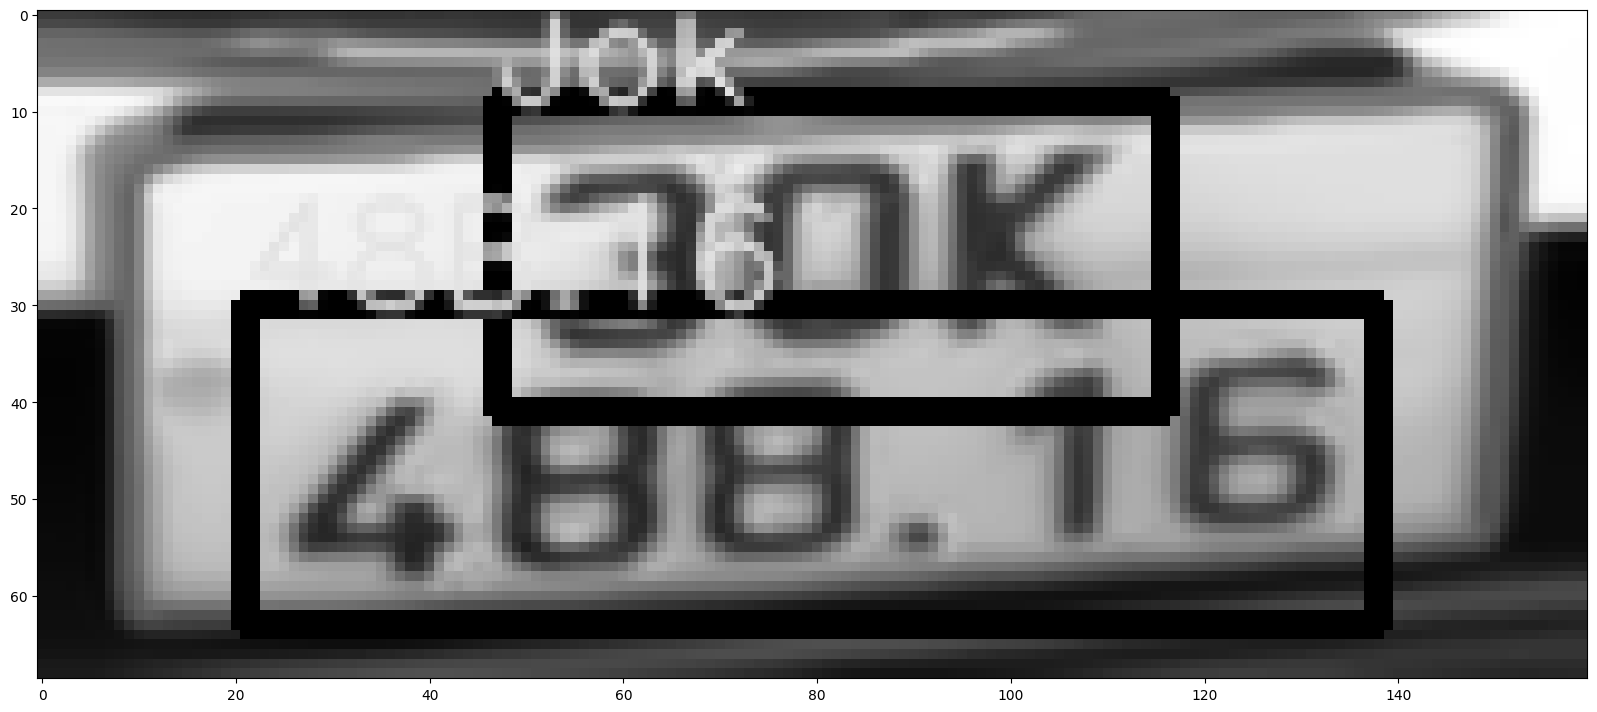

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30K-006.06
Character Error Rate: 0.00
Accuracy: 1.00


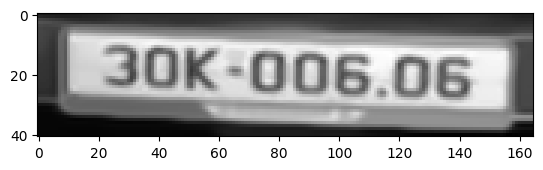

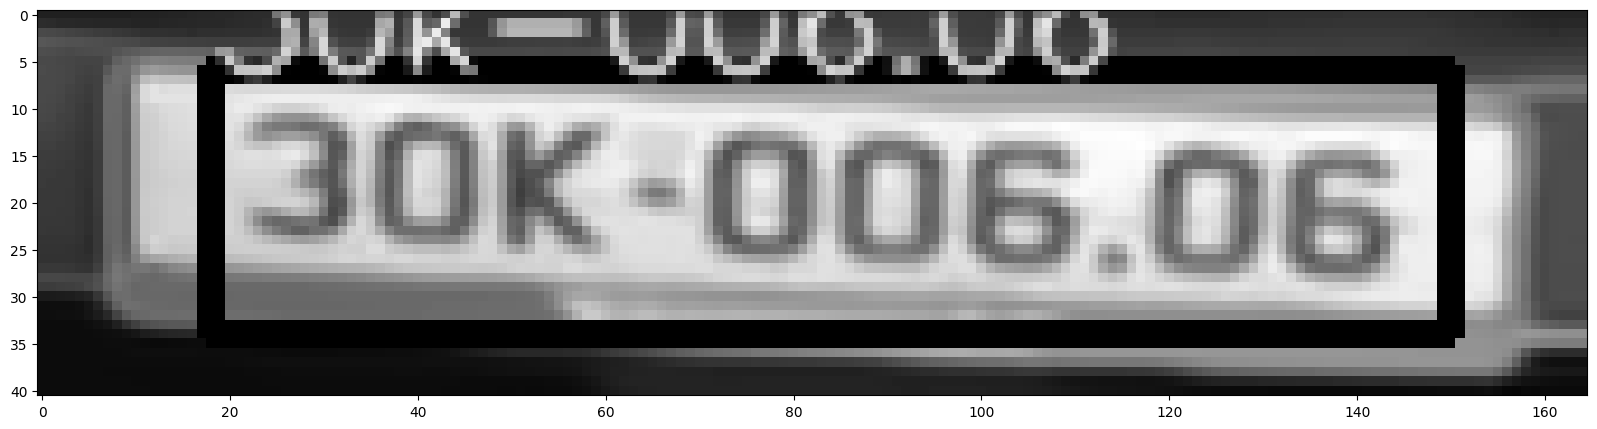

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30G 997,34
Character Error Rate: 0.20
Accuracy: 0.80


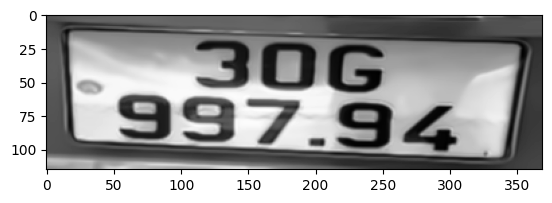

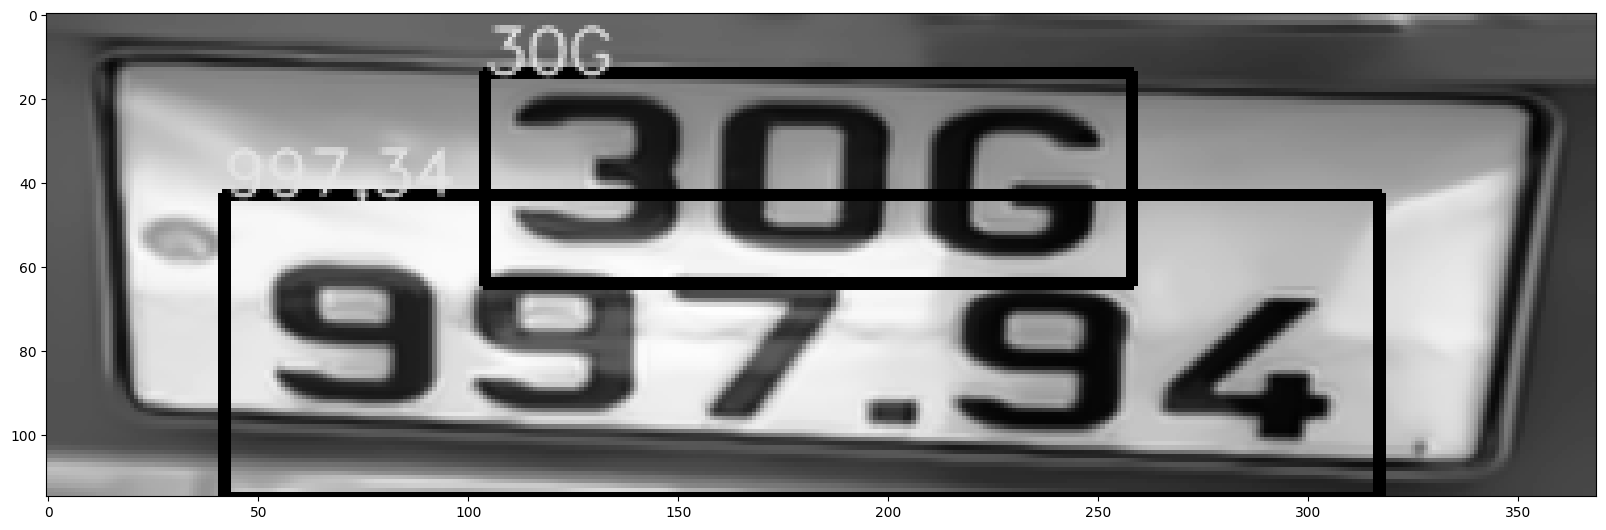

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0K 04.69
Character Error Rate: 0.20
Accuracy: 0.80


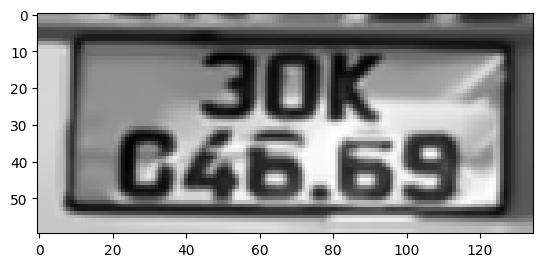

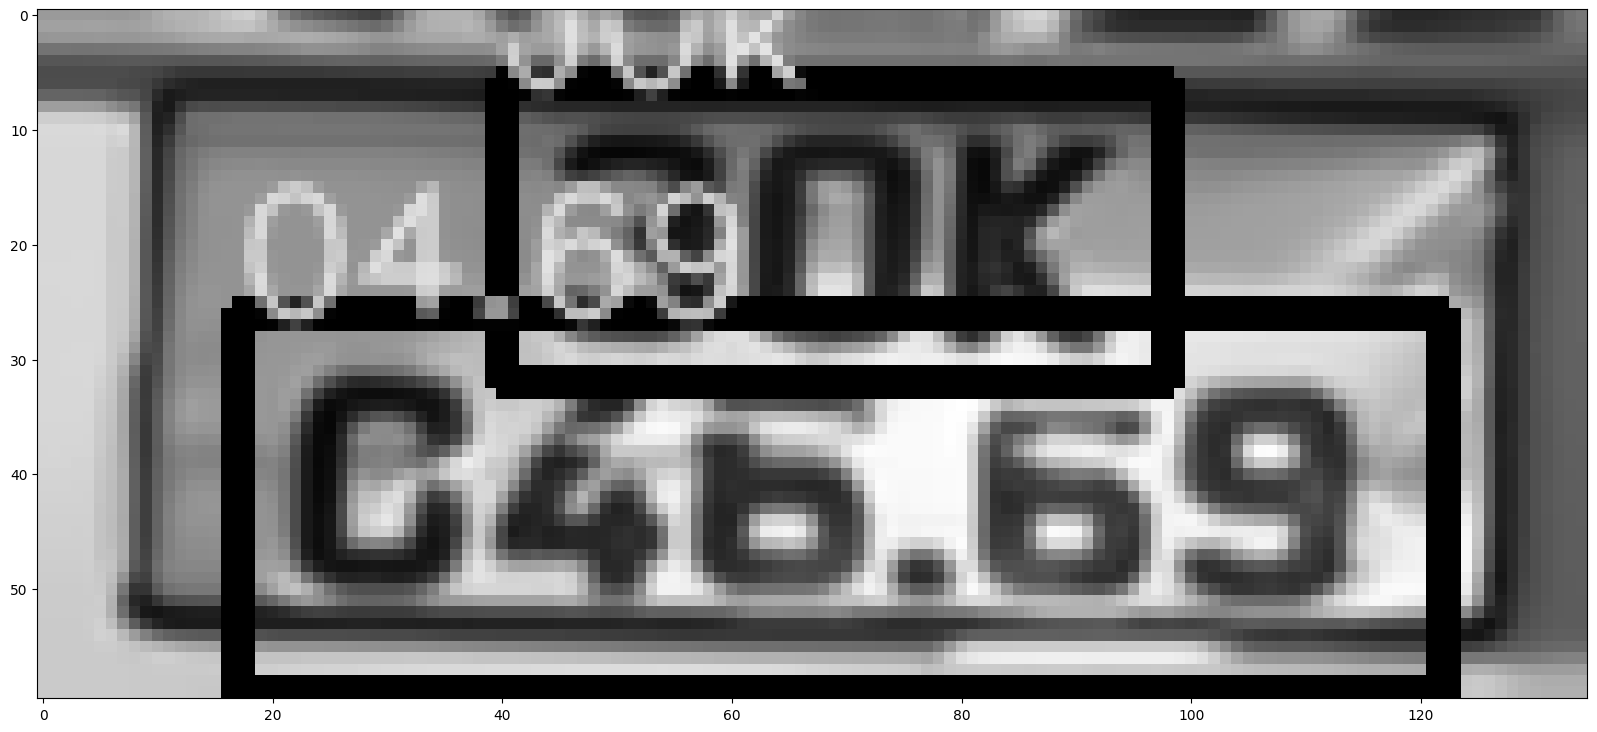

Using CPU. Note: This module is much faster with a GPU.


License plate number: B0F:930,02
Character Error Rate: 0.30
Accuracy: 0.70


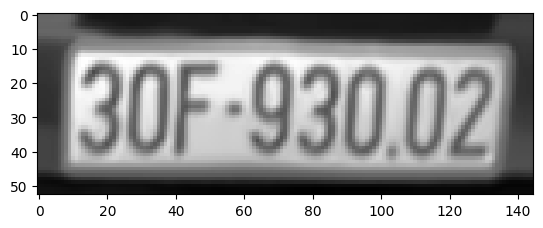

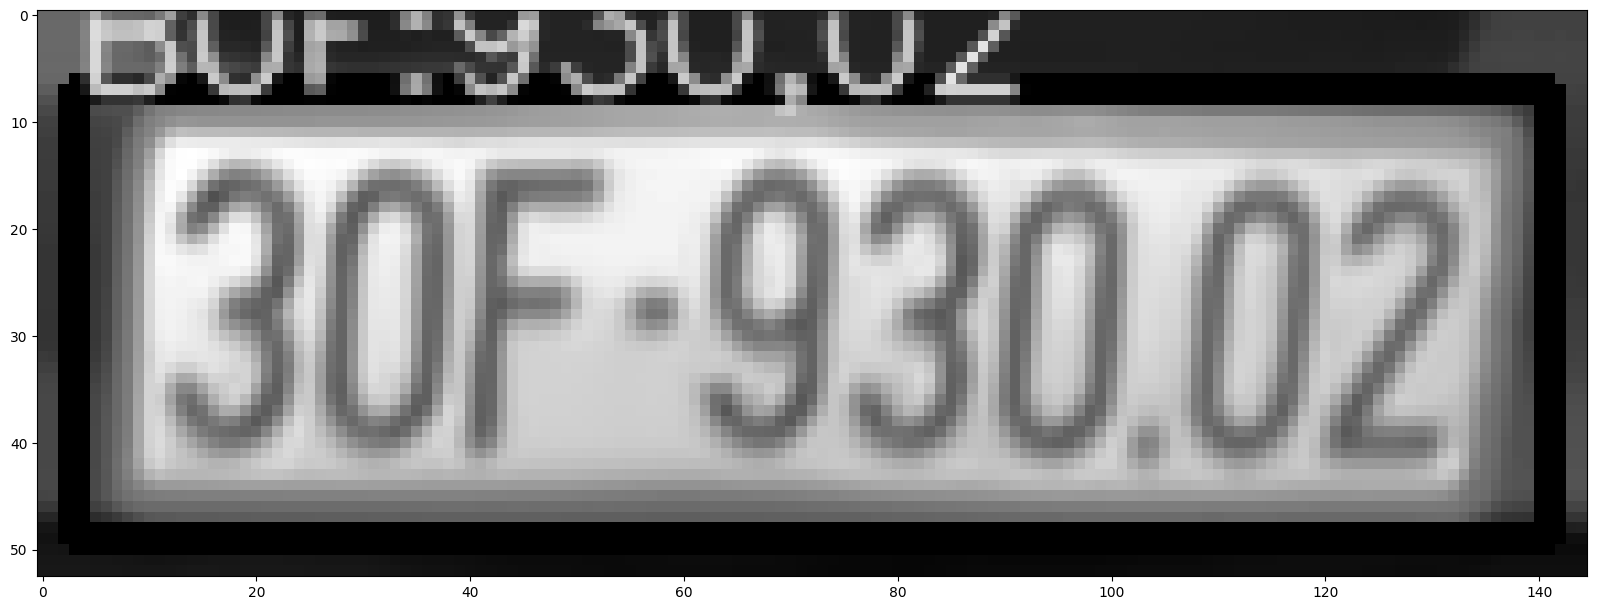

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30G-665.22
Character Error Rate: 0.00
Accuracy: 1.00


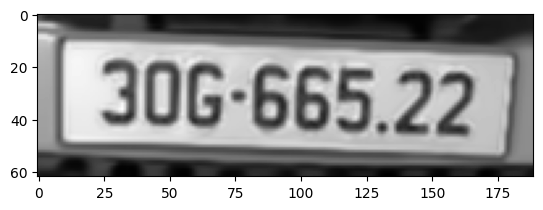

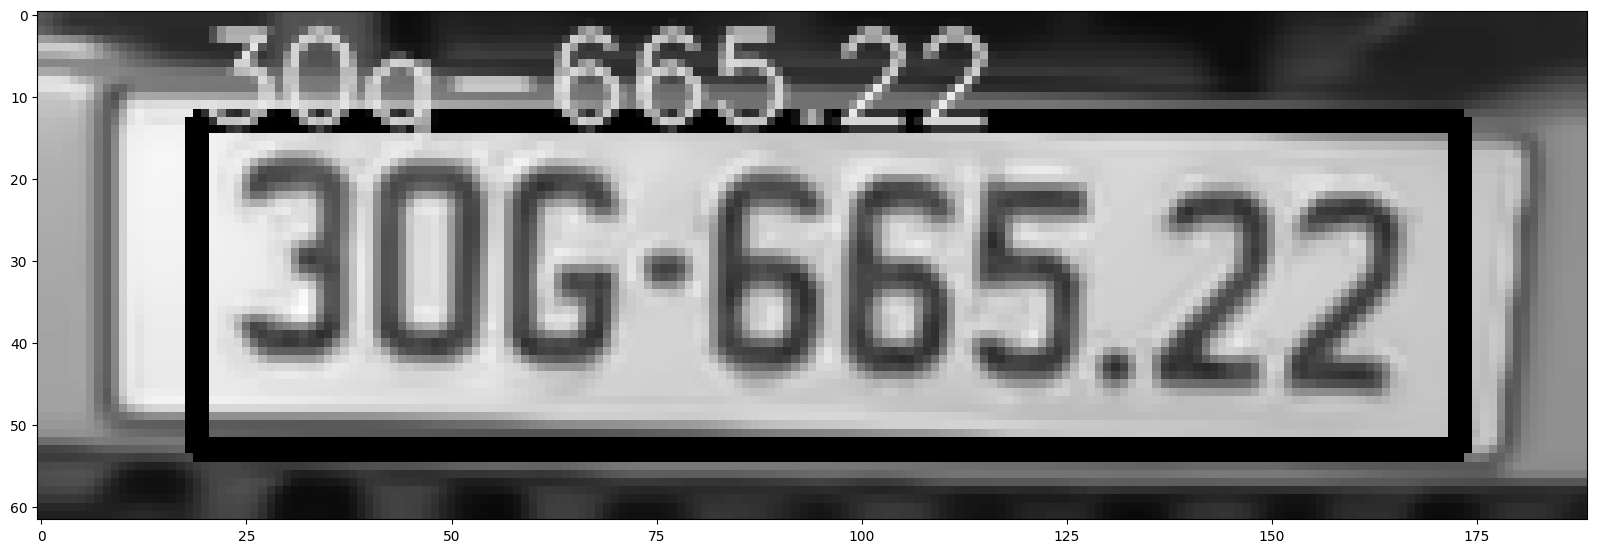

Using CPU. Note: This module is much faster with a GPU.


License plate number: 306 24354
Character Error Rate: 0.20
Accuracy: 0.80


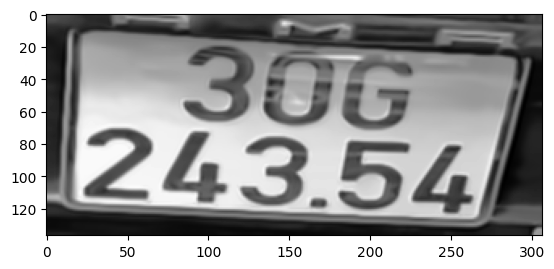

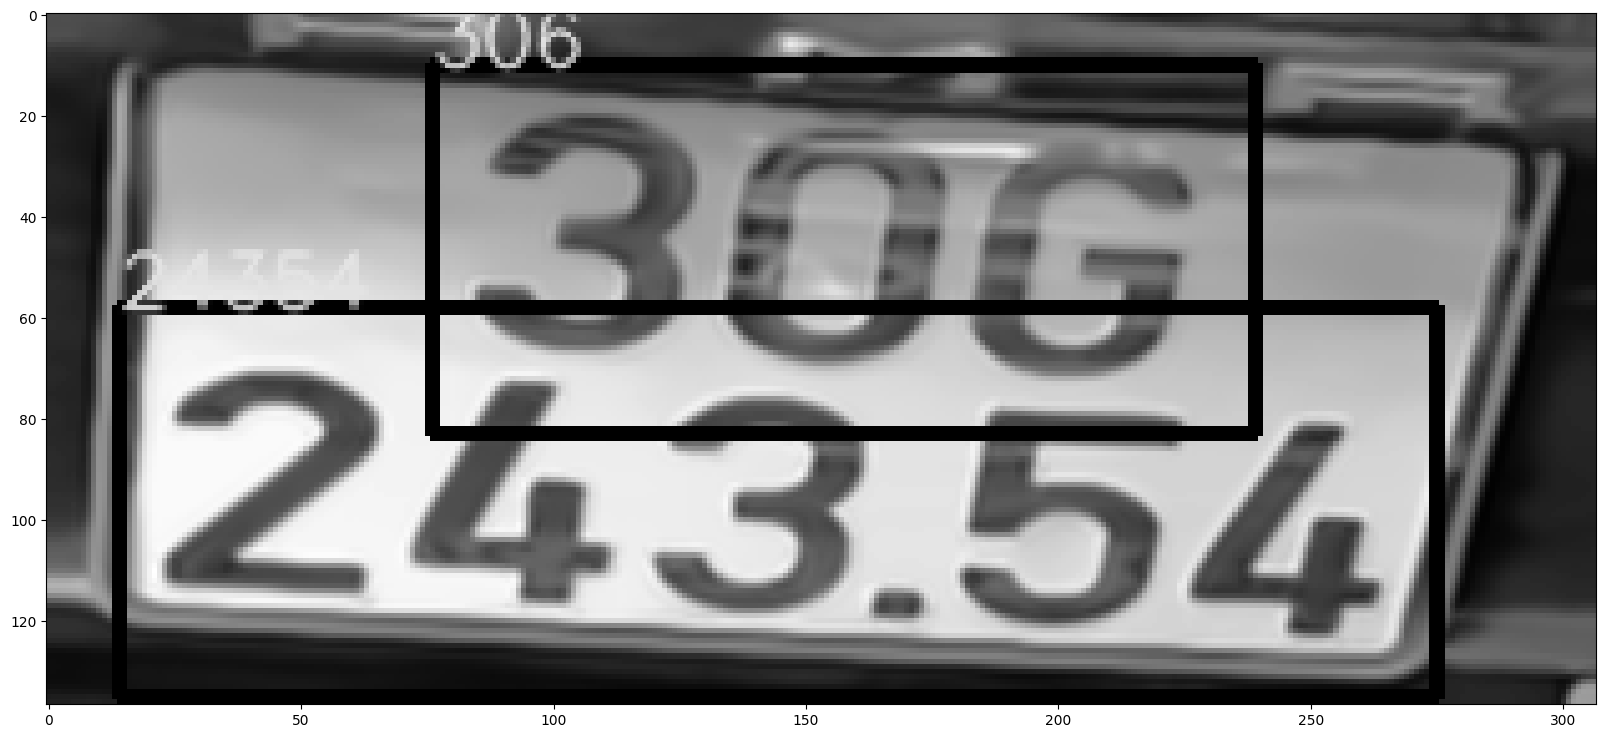

Using CPU. Note: This module is much faster with a GPU.


License plate number: J0H. 301.,46
Character Error Rate: 0.40
Accuracy: 0.60


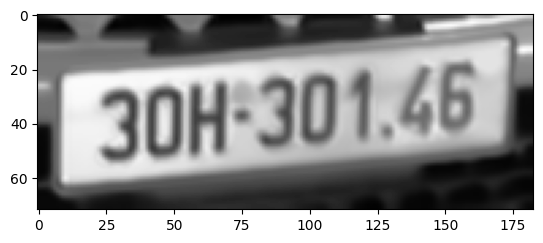

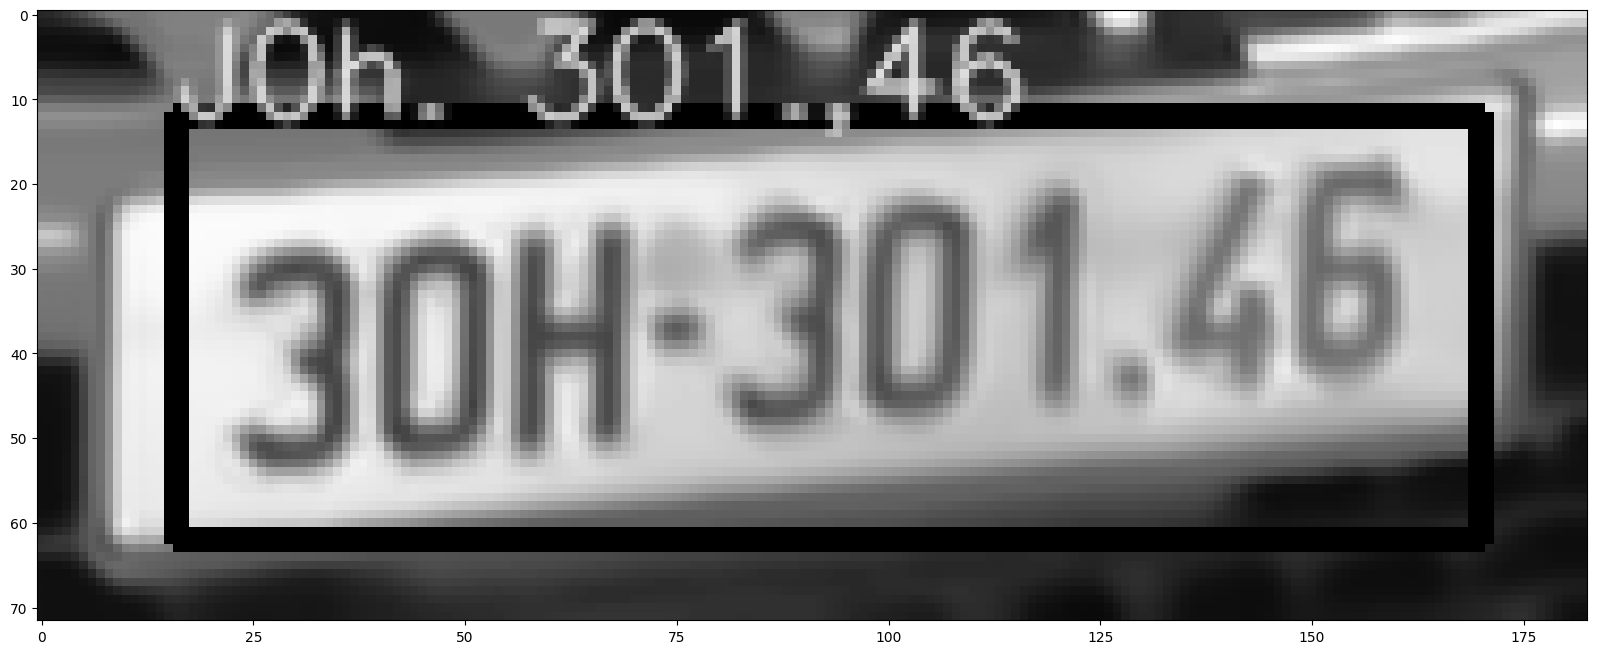

Using CPU. Note: This module is much faster with a GPU.


License plate number: 30A 098.83
Character Error Rate: 0.00
Accuracy: 1.00


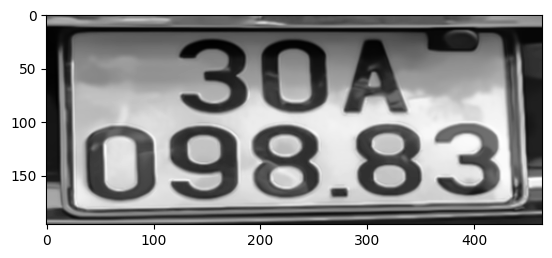

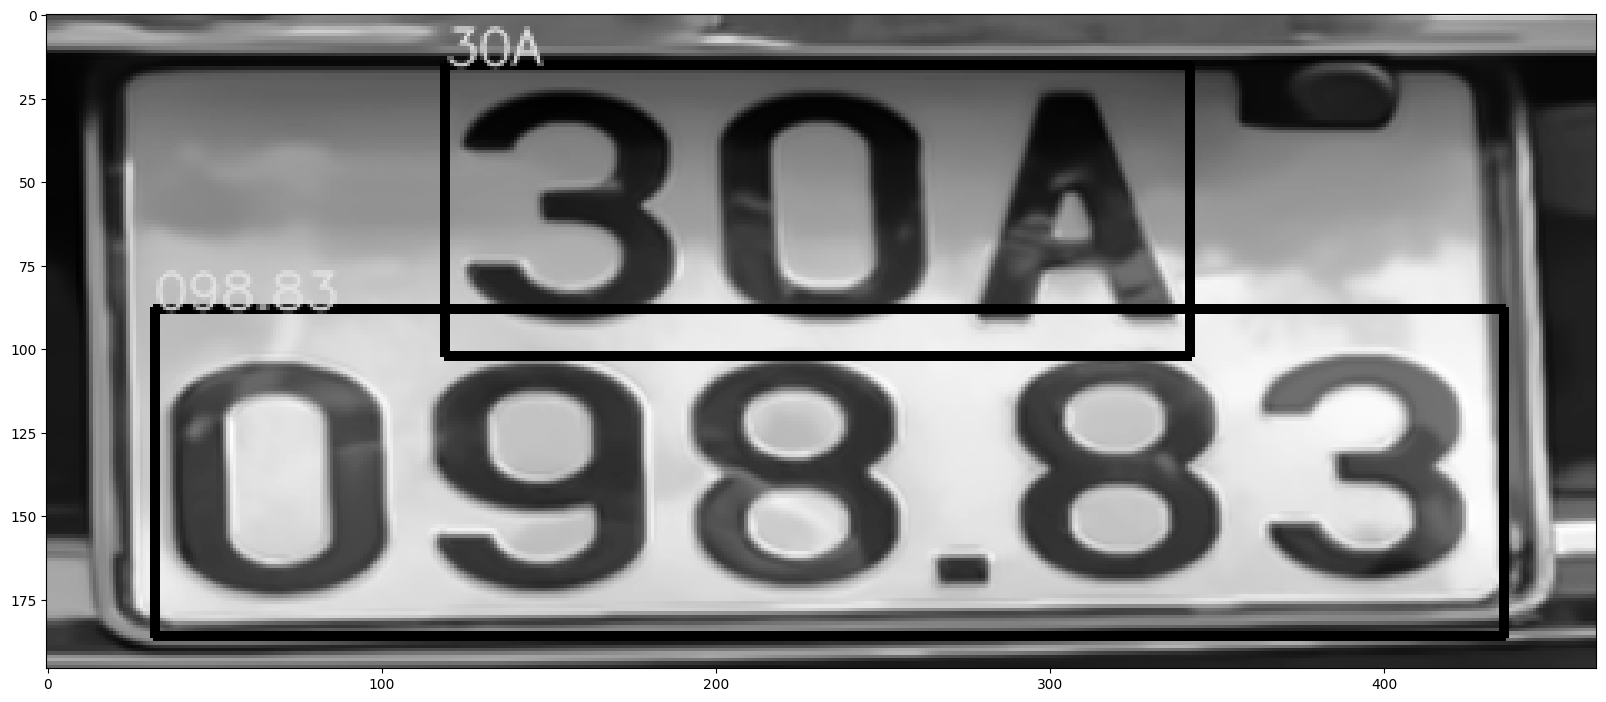

Using CPU. Note: This module is much faster with a GPU.


License plate number: 34-FT 631.59
Character Error Rate: 0.17
Accuracy: 0.83


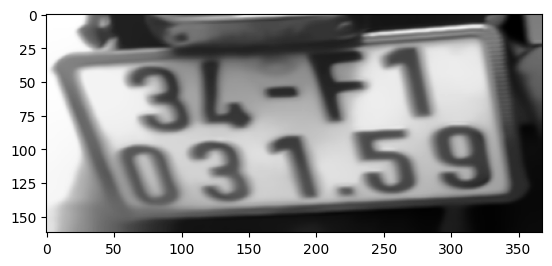

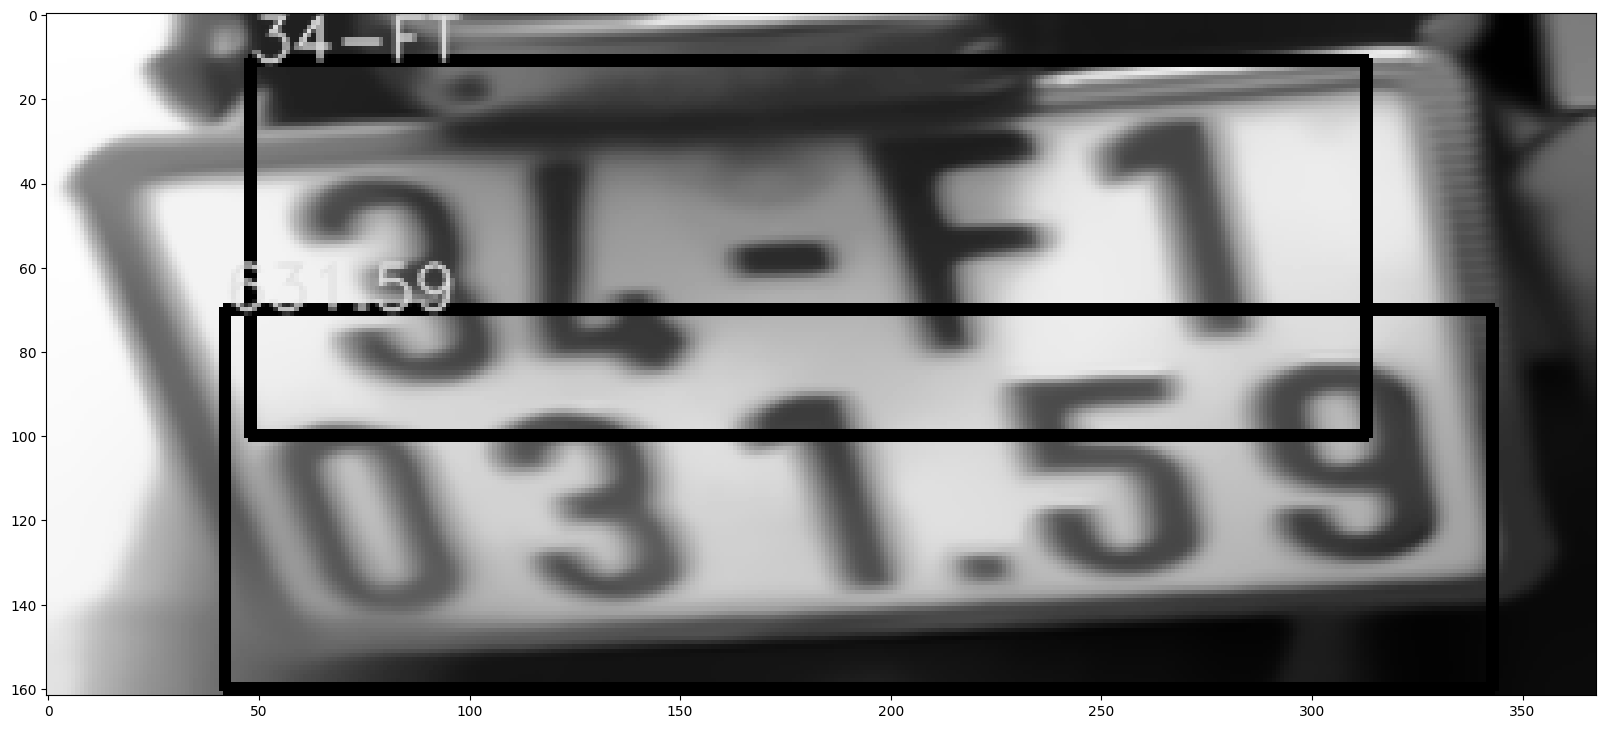

Using CPU. Note: This module is much faster with a GPU.


License plate number: 29-AB 027 70
Character Error Rate: 0.08
Accuracy: 0.92


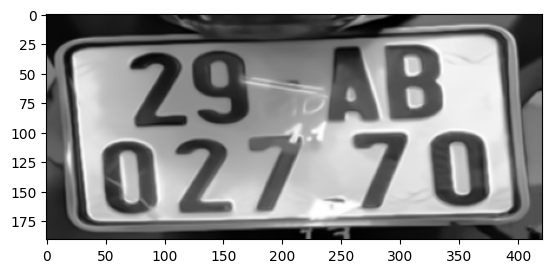

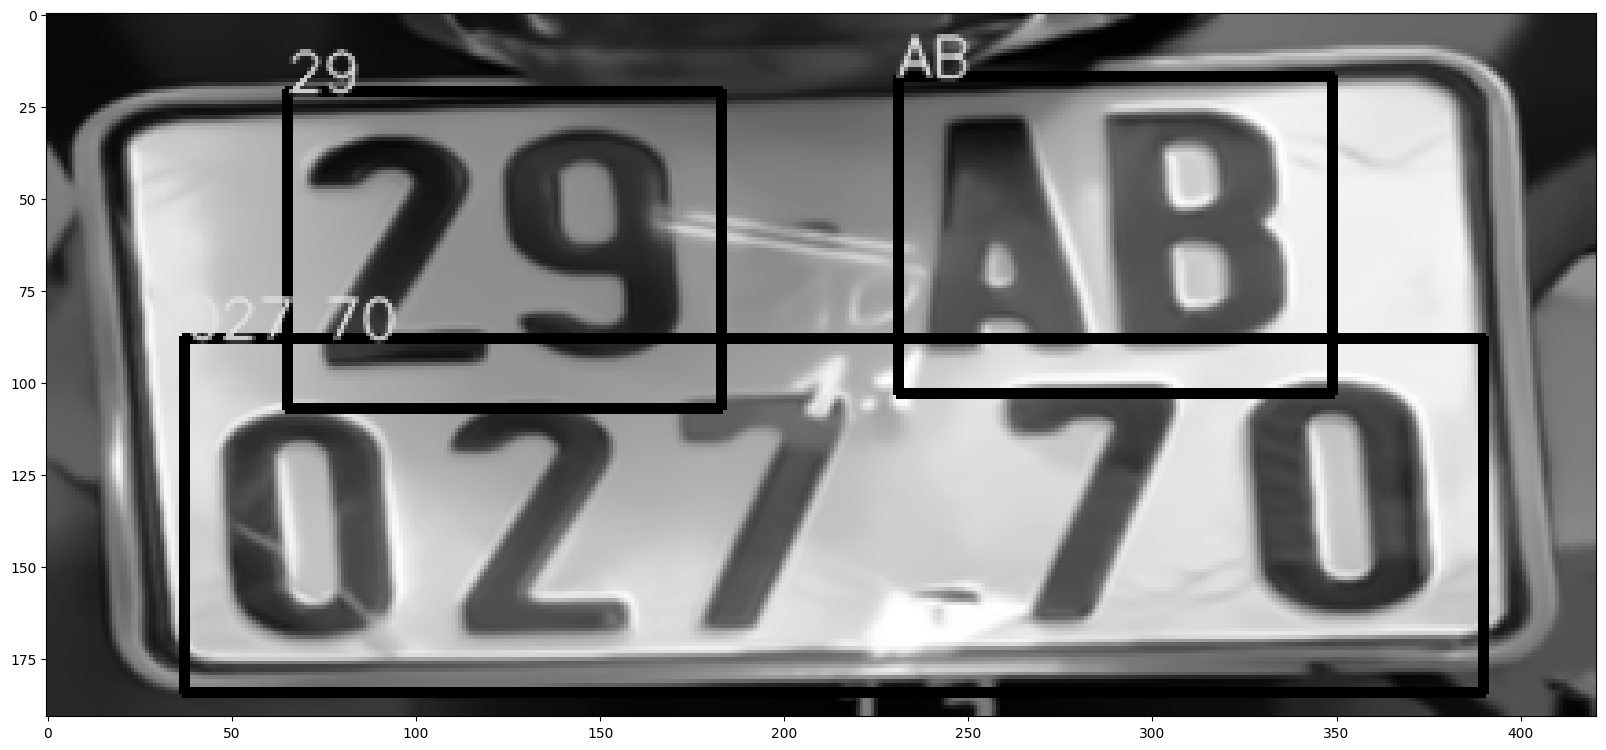

            plate
0     29-L5 61335
1    29-AB 020 01
2    23-N1 062.42
3      30-FZ 3499
4    29-EZ 627.23
5   29-L5_ 382,57
6    29-EZ 673.90
7    34-BL 387 0L
8      B0A 981.30
9       30K.20922
10      J0K 15262
11    B0F-987.25]
12     B0F-369.35
13  29-S6 036  1Z
14     304 475.05
15    B0E-465.222
16    B0F-057.36]
17     306 645.85
18     306 505.41
19     B0F.722.28
20     30H 692.30
21   [894-146.26]
22      306 12936
23    J0H-791.774
24     30F 42856 
25       20439486
26     306 791.83
27      30A 52385
28     291 26717 
29     30F 281.18
30     29A 015.19
31     306 125.82
32      J0.478.75
33     J0K 48B.16
34     30K-006.06
35     30G 997,34
36      J0K 04.69
37     B0F:930,02
38     30G-665.22
39      306 24354
40   J0H. 301.,46
41     30A 098.83
42   34-FT 631.59
43   29-AB 027 70
Overall character Error Rate: 0.16
Accuracy: 0.84


In [63]:
# create image path
crop_img_path = os.path.join(PROJECT_PATH, PROJECT_NAME, "crops","License")

# create dataframe to store the data
license_plate_df = pd.DataFrame({'plate': []})

ground_truth = {
    "img-106-_jpg.rf.jpg": "29-L5 613.35",
    "img-114-_jpg.rf.jpg": "29-AB 020.01",
    "img-119-_jpg.rf.jpg": "23-M1 062.42",
    "img-126-_jpg.rf.jpg": "30-F2 3499",
    "img-130-_jpg.rf.jpg": "29-E2 627.23",
    "img-137-_jpg.rf.jpg": "29-L5 382.57",
    "img-140-_jpg.rf.jpg": "29-E2 673.90",
    "img-18-_jpg.rf.jpg": "34-B4 387.04",
    "img-180-_jpg.rf.jpg": "30A-981.30",
    "img-198-_jpg.rf.jpg": "30K-209.22",
    "img-207-_jpg.rf.jpg": "30K 152.62",
    "img-210-_jpg.rf.jpg": "30F-987.25",
    "img-216-_jpg.rf.jpg": "30F-369.35",
    "img-22-_jpg.rf.jpg": "29-S6 036.17",
    "img-235-_jpg.rf.jpg": "30H 475.05",
    "img-244-_jpg.rf.jpg": "30E-466.22",
    "img-245-_jpg.rf.jpg": "30F-057.36",
    "img-246-_jpg.rf.jpg": "30G 645.85",
    "img-250-_jpg.rf.jpg": "30G 505.41",
    "img-251-_jpg.rf.jpg": "30F-722.28",
    "img-275-_jpg.rf.jpg": "30H 692.38",
    "img-277-_jpg.rf.jpg": "89A-146.26",
    "img-289-_jpg.rf.jpg": "30G 129.36",
    "img-302-_jpg.rf.jpg": "30H-791.74",
    "img-356-_jpg.rf.jpg": "30F 428.56",
    "img-364-_jpg.rf.jpg": "30A-394.86",
    "img-371-_jpg.rf.jpg": "30G 791.83",
    "img-387-_jpg.rf.jpg": "30A 523.85",
    "img-430-_jpg.rf.jpg": "29A 367.17",
    "img-434-_jpg.rf.jpg": "30F 281.18",
    "img-446-_jpg.rf.jpg": "29A 015.19",
    "img-484-_jpg.rf.jpg": "30G 125.82",
    "img-492-_jpg.rf.jpg": "30E-478.75",
    "img-493-_jpg.rf.jpg": "30K 488.16",
    "img-497-_jpg.rf.jpg": "30K-006.06",
    "img-51-_jpg.rf.jpg": "30G 997.94",
    "img-518-_jpg.rf.jpg": "30K 046.69",
    "img-523-_jpg.rf.jpg": "30F-930.02",
    "img-525-_jpg.rf.jpg": "30G-665.22",
    "img-53-_jpg.rf.jpg": "30G 243.54",
    "img-544-_jpg.rf.jpg": "30H-301.46",
    "img-63-_jpg.rf.jpg": "30A 098.83",
    "img-7-_jpg.rf.jpg": "34-F1 031.59",
    "img-99-_jpg.rf.jpg": "29-AB 027.70"
}

overall_accuracy = 0
overall_cer = 0
number_img = 0
# loop through the images in the folder and process them one by one
for images in os.listdir(crop_img_path):
    number_img += 1
    
    # check if the image are belong to these format
    if (images.endswith(".png") 
        or images.endswith(".jpg")
        or images.endswith(".jpeg")):

        # read the image
        img_path = os.path.join(crop_img_path, images)
        img = cv2.imread(img_path)
        #convert to grayscale image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #improve contrast
        img = cv2.equalizeHist(img)
        #remove blur
        img = cv2.GaussianBlur(img, (3, 3), 0)
        
        # remove noise
        img = cv2.fastNlMeansDenoising(img, None, 12, 7, 21)
        plt.imshow(img,cmap='gray')


        # use easyocr to read the text
        reader = easyocr.Reader(['en'], gpu = False)
        text = reader.readtext(img)        

        # extract text from the result output: list [bounding box, text, confidence]
        if len(text) > 2:
            license_text = (text[0][1] + "-" + text[1][1] + " " + text[2][1]).upper()
            license_text = license_text.replace('O','0')
            print(f"License plate number: {license_text}")
        elif len(text) > 1:
            license_text = (text[0][1] + " " + text[1][1]).upper()
            license_text = license_text.replace('O','0')
            print(f"License plate number: {license_text}")
        elif len(text) == 1:
            license_text = (text[0][1]).upper()
            license_text = license_text.replace('O','0')
            print(f"License plate number: {license_text}")
        else:
            print("No text detected")
        #use jiwer to calculate accuracy
        cer = jiwer.cer(ground_truth.get(images, ""), license_text)
        print(f"Character Error Rate: {cer:.2f}")
        
        accuracy = 1 - cer
        print(f"Accuracy: {accuracy:.2f}")

        overall_accuracy += accuracy
        overall_cer += cer


        # add new data into dataframe
        new_df = pd.DataFrame({'plate': [license_text]})
        license_plate_df = pd.concat([license_plate_df, new_df], ignore_index = True)

        #draw the bounding box and text
        for detection in text:
            top_left = tuple([int(val) for val in detection[0][0]])
            bottom_right = tuple([int(val) for val in detection[0][2]])
            text = detection[1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 2)
            img = cv2.putText(img, text, top_left, font, 0.5, (225,0,0), 1, cv2.LINE_AA)
        
        # plot the image 
        plt.figure(figsize = (20,20))
        plt.imshow(img,cmap='gray')
        plt.show()
# print out the dataframe
print(license_plate_df)
license_plate_df.to_csv("license_plate.csv", index = True)


#calculate overall cer
overall_cer = overall_cer/number_img
print(f"Overall character Error Rate: {overall_cer:.2f}")
#calculate overall accuracy
overall_accuracy = overall_accuracy/number_img
print(f"Accuracy: {overall_accuracy:.2f}")



* 3 main components of EasyOCR: feature extraction, sequence labeling, and decoding

* Feature extraction: analyze the text region and extract relevant featuress --> Using Resnet(Residual Network)

* Sequence Labeling: Using LSTM to predict the character

The LSTM network processes this sequence one by one, analyzing the features of each section along with the context of surrounding features.

By considering both individual features and their context, the LSTM network progressively assigns a label (predicted character) to each element in the sequence.

* Decoding: the sequence of labels (predicted characters) is decoded to give you the actual recognized text


# Image processing and PyTesseract

In [54]:

from PIL import Image, ImageEnhance
import PIL
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
import cv2

In [55]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [64]:
# create image path
crop_img_path = os.path.join(PROJECT_PATH, PROJECT_NAME, "crops","License")

# create dataframe to store the data
license_plate_df = pd.DataFrame({'plate': []})

ground_truth = {
    "img-106-_jpg.rf.jpg": "29-L5 613.35",
    "img-114-_jpg.rf.jpg": "29-AB 020.01",
    "img-119-_jpg.rf.jpg": "23-M1 062.42",
    "img-126-_jpg.rf.jpg": "30-F2 3499",
    "img-130-_jpg.rf.jpg": "29-E2 627.23",
    "img-137-_jpg.rf.jpg": "29-L5 382.57",
    "img-140-_jpg.rf.jpg": "29-E2 673.90",
    "img-18-_jpg.rf.jpg": "34-B4 387.04",
    "img-180-_jpg.rf.jpg": "30A-981.30",
    "img-198-_jpg.rf.jpg": "30K-209.22",
    "img-207-_jpg.rf.jpg": "30K 152.62",
    "img-210-_jpg.rf.jpg": "30F-987.25",
    "img-216-_jpg.rf.jpg": "30F-369.35",
    "img-22-_jpg.rf.jpg": "29-S6 036.17",
    "img-235-_jpg.rf.jpg": "30H 475.05",
    "img-244-_jpg.rf.jpg": "30E-466.22",
    "img-245-_jpg.rf.jpg": "30F-057.36",
    "img-246-_jpg.rf.jpg": "30G 645.85",
    "img-250-_jpg.rf.jpg": "30G 505.41",
    "img-251-_jpg.rf.jpg": "30F-722.28",
    "img-275-_jpg.rf.jpg": "30H 692.38",
    "img-277-_jpg.rf.jpg": "89A-146.26",
    "img-289-_jpg.rf.jpg": "30G 129.36",
    "img-302-_jpg.rf.jpg": "30H-791.74",
    "img-356-_jpg.rf.jpg": "30F 428.56",
    "img-364-_jpg.rf.jpg": "30A-394.86",
    "img-371-_jpg.rf.jpg": "30G 791.83",
    "img-387-_jpg.rf.jpg": "30A 523.85",
    "img-395-_jpg.rf.jpg": "30H-071.87",
    "img-430-_jpg.rf.jpg": "29A 367.17",
    "img-434-_jpg.rf.jpg": "30F 281.18",
    "img-446-_jpg.rf.jpg": "29A 015.19",
    "img-484-_jpg.rf.jpg": "30G 125.82",
    "img-492-_jpg.rf.jpg": "30E-478.75",
    "img-493-_jpg.rf.jpg": "30K 488.16",
    "img-497-_jpg.rf.jpg": "30K-006.06",
    "img-51-_jpg.rf.jpg": "30G 997.94",
    "img-518-_jpg.rf.jpg": "30K 046.69",
    "img-523-_jpg.rf.jpg": "30F-930.02",
    "img-525-_jpg.rf.jpg": "30G-665.22",
    "img-53-_jpg.rf.jpg": "30G 243.54",
    "img-544-_jpg.rf.jpg": "30H-301.46",
    "img-63-_jpg.rf.jpg": "30A 098.83",
    "img-7-_jpg.rf.jpg": "34-F1 031.59",
    "img-99-_jpg.rf.jpg": "29-AB 027.70"
}

overall_cer2 = 0
overall_accuracy2 = 0
number_img2 = 0

# Loop through images in the folder
for images in os.listdir(crop_img_path):
    number_img2 += 1

    # Check for image formats
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):

        # Read the image
        img_path = os.path.join(crop_img_path, images)
        img = cv2.imread(img_path)
        #convert to grayscale image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #improve contrast
        img = cv2.equalizeHist(img)
        
        #remove blur
        img = cv2.GaussianBlur(img, (3, 3), 0)
        # remove noise
        img = cv2.fastNlMeansDenoising(img, None, 14, 7, 21)
        # Use Tesseract for OCR
        text = pytesseract.image_to_string(img,config='--oem 3 --psm 6')  # Use PSM 6 for single line text

        # Extract text from result (assuming single line)
        license_text = text.strip()
        license_text = license_text.upper()
        license_text = license_text.replace('O','0')
        print(f"License plate number: {license_text}")

        #use jiwer to calculate cer and accuracy
        cer = jiwer.cer(ground_truth.get(images, ""), license_text)
        print(f"Character Error Rate: {cer:.2f}")
        accuracy = 1 - cer
        print(f"Accuracy: {accuracy:.2f}")

        overall_cer2 += cer
        overall_accuracy2 += accuracy

        # Add data to dataframe
        new_df = pd.DataFrame({'plate': [license_text]})
        license_plate_df = pd.concat([license_plate_df, new_df], ignore_index=True)

# Print and save dataframe
print(license_plate_df)
license_plate_df.to_csv("license_plate2.csv", index=True)

# calculate overal cer and accuracy
overall_cer2 = overall_cer2 / number_img2
print(f"Overall Character Error Rate: {overall_cer2:.2f}")
overall_accuracy2 = overall_accuracy2 / number_img2
print(f"Accuracy: {overall_accuracy2:.2f}")
      

License plate number: | 29-15 |
613.35
Character Error Rate: 0.42
Accuracy: 0.58
License plate number: { 29-AB |
1020.0 1)
Character Error Rate: 0.58
Accuracy: 0.42
License plate number: 3-N1 |
& 62.42
Character Error Rate: 0.50
Accuracy: 0.50
License plate number: WEN
Character Error Rate: 1.00
Accuracy: 0.00
License plate number: 
Character Error Rate: 1.00
Accuracy: 0.00
License plate number: 
Character Error Rate: 1.00
Accuracy: 0.00
License plate number: Q 79-€2
1673.90
Character Error Rate: 0.50
Accuracy: 0.50
License plate number: 3L-BL
387.04
Character Error Rate: 0.25
Accuracy: 0.75
License plate number: 1504-98 1.30)
Character Error Rate: 0.50
Accuracy: 0.50
License plate number: 
Character Error Rate: 1.00
Accuracy: 0.00
License plate number: F 20K 0N
152 62
Character Error Rate: 0.70
Accuracy: 0.30
License plate number: 30F -987.25]
Character Error Rate: 0.20
Accuracy: 0.80
License plate number: F30F 369.35)
Character Error Rate: 0.30
Accuracy: 0.70
License plate number: 29

# Model Evaluation

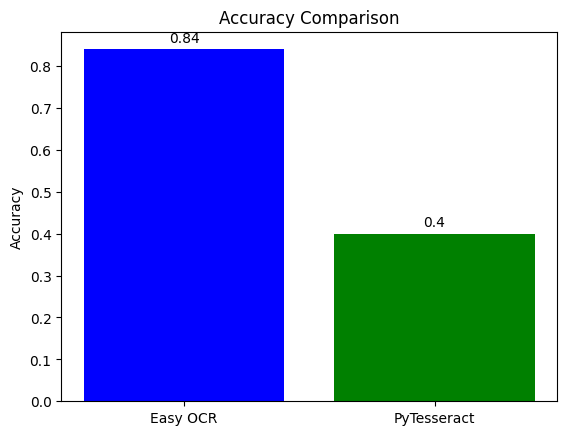

In [79]:
data = [0.84, 0.4]
categories = ['Easy OCR', 'PyTesseract']  # Adjust category labels if needed

# Create a bar chart
plt.bar(categories, data, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Add data values on top of each bar
for bar_index, value in enumerate(data):
    plt.text(bar_index, value + 0.01, str(value), ha='center', va='bottom')  # Adjust offset as needed

plt.grid(axis='y', linestyle='None', alpha=1)
plt.show()

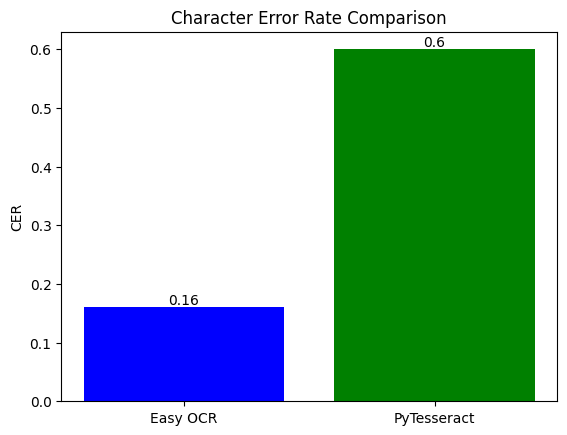

In [83]:
data = [0.16, 0.6]
categories = ['Easy OCR', 'PyTesseract']  # Adjust category labels if needed

# Create a bar chart
plt.bar(categories, data, color=['blue', 'green'])
plt.ylabel('CER')
plt.title('Character Error Rate Comparison')

# Add data values on top of each bar
for bar_index, value in enumerate(data):
    plt.text(bar_index, value, str(value), ha='center', va='bottom')  # Adjust offset as needed

plt.grid(axis='y', linestyle='None', alpha=1)
plt.show()

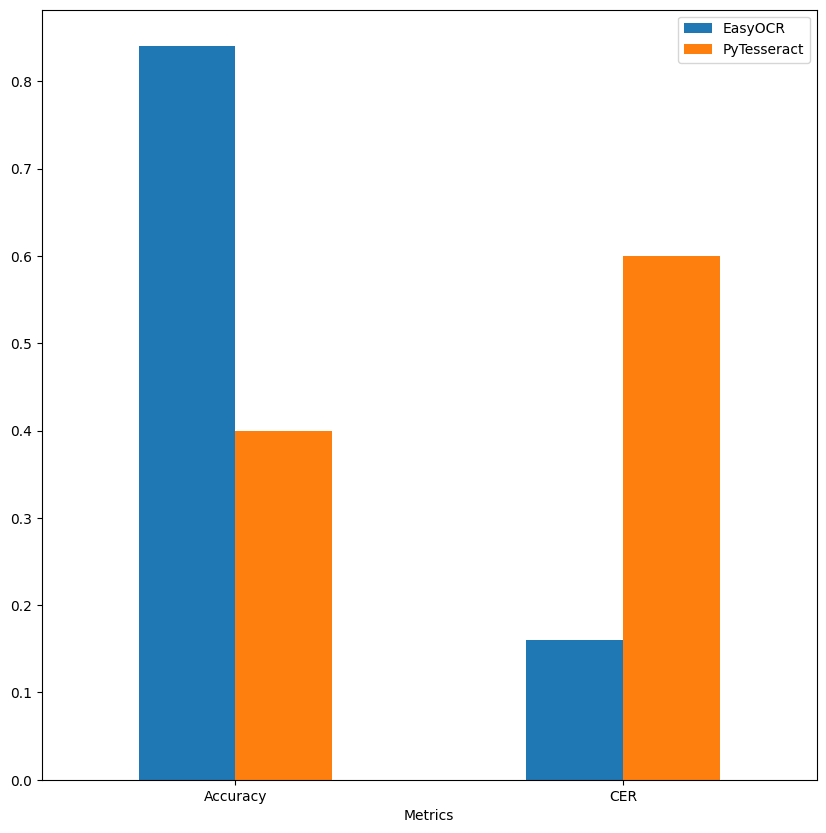

In [103]:

import pandas as pd
import matplotlib.pyplot as plt
 
# Data to be plotted
data = [["Accuracy", 0.84, 0.4],
        ["CER", 0.16, 0.6]]
 
# Form DataFrame from data
df = pd.DataFrame(data, columns=["Metrics", "EasyOCR", "PyTesseract"])
 
# Plot unstacked multiple columns such as population and year from DataFrame
df.plot(x="Metrics", y=["EasyOCR", "PyTesseract"],
        kind="bar", figsize=(10, 10))
# add data value on top of each bar


plt.xticks(rotation=0)
# Display plot
plt.show()
